In [13]:
import pandas as pd

# Load the original, unmodified dataset
letters = pd.read_csv("swami_vivekananda_letters_complete.csv")

# Quick sanity check
print(letters.shape)
print(letters.columns)


(762, 27)
Index(['Index', 'volume', 'Name', 'Category', 'Type', 'Date', 'Place',
       'Source', 'Audience', 'Language', 'section', 'genre', 'href',
       'full_url', 'filename', 'has_html', 'has_date', 'has_place',
       'has_audience', 'html_content', 'html_length', 'body_text',
       'signature_text', 'ps_text', 'body_word_count', 'signature_word_count',
       'ps_word_count'],
      dtype='object')


In [14]:
# Check for missing values and basic stats
print(letters['Audience'].isna().sum())
print(letters['Audience'].value_counts().head(20))


4
Audience
Bull, Sarah                         77
Christine, Sister                   66
Hale, G. W. Mrs.                    60
Nivedita, Sister                    48
Hale, Mary                          43
MacLeod, Josephine                  41
Perumal, Alasinga                   40
Brahmananda, Swami                  40
Mitra, Pramadadas                   33
Sturdy, E.T.                        31
Ramakrishnananda, Swami             20
Desai, Viaharidas Haridas           13
Maharaja of Khetri (Singh, Ajit)    13
Wright, John Henry                  11
Akhandananda, Swami                 10
McKindley, Isabelle                 10
Bose, Balaram                       10
Hale, Sisters                       10
Leggett, Francis Mrs.                9
Leggett, Francis H                   9
Name: count, dtype: int64


In [15]:
# Strip leading/trailing whitespace safely
letters['Audience'] = letters['Audience'].astype(str).str.strip()


In [16]:
names_to_fix = [
    'Chakravarti, Sharat Chandra',
    'Perumal, Alasinga',
    'Legget, Francis H',
    'Ghosal, Sarala',
    'Sha, Lala Badri',
]

for name in names_to_fix:
    print(name, "→", (letters['Audience'] == name).sum())


Chakravarti, Sharat Chandra → 1
Perumal, Alasinga → 41
Legget, Francis H → 1
Ghosal, Sarala → 1
Sha, Lala Badri → 2


In [17]:
# Start fresh - remove any cleaning column if it exists
if 'Audience_clean' in letters.columns:
    letters = letters.drop('Audience_clean', axis=1)

# Only fix the 5 people you specified
audience_mapping = {
    'Chakravarti, Sharat Chandra': 'Chakravarty, Sharat Chandra',
    'Perumal, Alasinga ': 'Perumal, Alasinga',  # Note the trailing space
    'Legget, Francis H': 'Leggett, Francis H',
    'Ghosal, Sarala': 'Ghoshal, Sarala',
    'Sha, Lala Badri': 'Sah, Lala Badri',
}

# Apply only these mappings
letters['Audience_clean'] = letters['Audience'].replace(audience_mapping)

# Verify the fixes
print("=" * 80)
print("VERIFYING NAME CORRECTIONS")
print("=" * 80)

for old_name, new_name in audience_mapping.items():
    old_count = len(letters[letters['Audience'] == old_name])
    new_count = len(letters[letters['Audience_clean'] == new_name])
    print(f"{old_name} ({old_count}) -> {new_name} ({new_count} total)")

print("\n" + "=" * 80)
print("TOP 20 RECIPIENTS (AFTER FIXING ONLY THE 5 SPECIFIED)")
print("=" * 80)
top20 = letters['Audience_clean'].value_counts().head(20)
print(top20.to_string())

print(f"\nTotal unique recipients: {letters['Audience_clean'].nunique()}")

VERIFYING NAME CORRECTIONS
Chakravarti, Sharat Chandra (1) -> Chakravarty, Sharat Chandra (2 total)
Perumal, Alasinga  (0) -> Perumal, Alasinga (41 total)
Legget, Francis H (1) -> Leggett, Francis H (10 total)
Ghosal, Sarala (1) -> Ghoshal, Sarala (2 total)
Sha, Lala Badri (2) -> Sah, Lala Badri (4 total)

TOP 20 RECIPIENTS (AFTER FIXING ONLY THE 5 SPECIFIED)
Audience_clean
Bull, Sarah                         77
Christine, Sister                   66
Hale, G. W. Mrs.                    60
Nivedita, Sister                    48
Hale, Mary                          43
MacLeod, Josephine                  41
Perumal, Alasinga                   41
Brahmananda, Swami                  40
Mitra, Pramadadas                   33
Sturdy, E.T.                        31
Ramakrishnananda, Swami             20
Desai, Viaharidas Haridas           13
Maharaja of Khetri (Singh, Ajit)    13
Wright, John Henry                  11
McKindley, Isabelle                 10
Akhandananda, Swami                 10

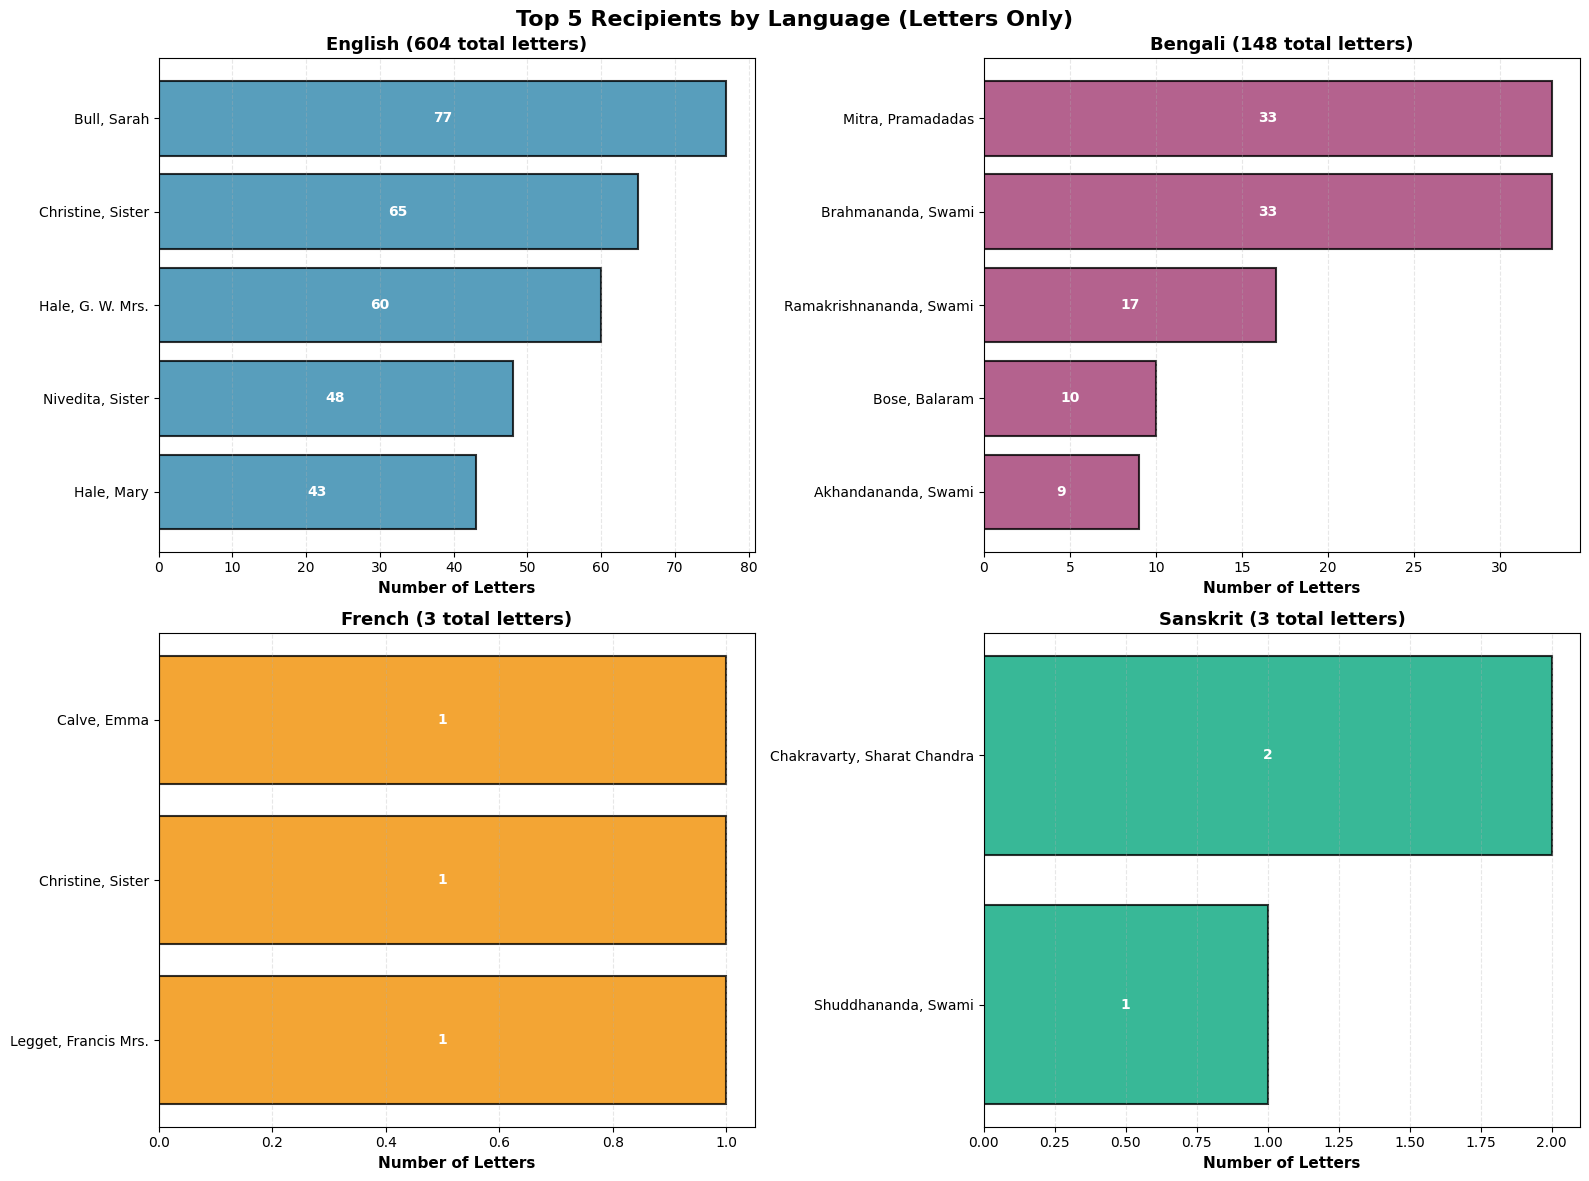


SUMMARY FOR NETWORK ANALYSIS
Total letters: 762
Unique recipients: 110
Letters with valid audience: 762


TypeError: '<=' not supported between instances of 'float' and 'str'

In [18]:
# Recreate the visualization with cleaned audience names and better label placement
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Top 5 Recipients by Language (Letters Only)', fontsize=16, fontweight='bold')

languages = ['English', 'Bengali', 'French', 'Sanskrit']
colors = ['#2E86AB', '#A23B72', '#F18F01', '#06A77D']

for idx, (ax, lang, color) in enumerate(zip(axes.flatten(), languages, colors)):
    lang_letters = letters[letters['Language'] == lang]

    if len(lang_letters) > 0:
        top5 = lang_letters['Audience_clean'].value_counts().head(5)

        # Create horizontal bar chart
        ax.barh(range(len(top5)), top5.values, color=color, alpha=0.8, edgecolor='black', linewidth=1.5)
        ax.set_yticks(range(len(top5)))
        ax.set_yticklabels(top5.index, fontsize=10)
        ax.invert_yaxis()
        ax.set_xlabel('Number of Letters', fontsize=11, fontweight='bold')
        ax.set_title(f'{lang} ({len(lang_letters)} total letters)', fontsize=13, fontweight='bold')
        ax.grid(axis='x', alpha=0.3, linestyle='--')

        # Add value labels INSIDE bars (centered)
        for i, v in enumerate(top5.values):
            ax.text(v/2, i, str(v), va='center', ha='center', fontsize=10, fontweight='bold', color='white')
    else:
        ax.text(0.5, 0.5, 'No letters', ha='center', va='center', fontsize=12)
        ax.set_title(f'{lang}', fontsize=13, fontweight='bold')
        ax.axis('off')

plt.tight_layout()
plt.show()

print("\n" + "=" * 80)
print("SUMMARY FOR NETWORK ANALYSIS")
print("=" * 80)
print(f"Total letters: {len(letters)}")
print(f"Unique recipients: {letters['Audience_clean'].nunique()}")
print(f"Letters with valid audience: {letters['Audience_clean'].notna().sum()}")
print(f"Date range: {letters['Date'].min()} to {letters['Date'].max()}")

In [22]:
print("\n" + "=" * 80)
print("PREPARING ENGLISH LETTERS CORPUS")
print("=" * 80)

# Sanity check: required columns
required_cols = ['body_text', 'body_word_count']
missing = [c for c in required_cols if c not in letters.columns]

if missing:
    raise ValueError(f"Missing required columns: {missing}")

# If language column exists, filter to English only
if 'Language' in letters.columns:
    english_letters = letters[letters['Language'].str.lower() == 'english'].copy()
    print("Filtered by language == English")
else:
    # Otherwise assume corpus is already English
    english_letters = letters.copy()
    print("No language column found — assuming all letters are English")

# Drop rows with missing or empty body text
english_letters = english_letters.dropna(subset=['body_text'])
english_letters = english_letters[english_letters['body_text'].str.strip() != ""]

print(f"Total English letters: {len(english_letters)}")
print(f"Avg word count: {english_letters['body_word_count'].mean():.1f}")
print(f"Min / Max word count: {english_letters['body_word_count'].min()} / {english_letters['body_word_count'].max()}")



PREPARING ENGLISH LETTERS CORPUS
Filtered by language == English
Total English letters: 604
Avg word count: 302.8
Min / Max word count: 16 / 2947


In [23]:
import re
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import nltk

# Download NLTK stopwords
try:
    nltk.data.find('corpora/stopwords')
    print("NLTK stopwords already downloaded")
except LookupError:
    print("Downloading NLTK stopwords...")
    nltk.download('stopwords', quiet=True)

from nltk.corpus import stopwords

print("\n" + "=" * 80)
print("EXTRACTING FUNCTION WORDS FROM ENGLISH CORPUS")
print("=" * 80)

# Filter to letters with at least 100 words for reliable stylometry
stylometry_corpus = english_letters[english_letters['body_word_count'] >= 100].copy()
print(f"Letters with 100+ words: {len(stylometry_corpus)}")

# Get English stopwords (function words)
english_stopwords = set(stopwords.words('english'))
print(f"NLTK English stopwords: {len(english_stopwords)}")

# Simple tokenization function
def tokenize_text(text):
    """Convert text to lowercase tokens, remove punctuation"""
    text = text.lower()
    text = re.sub(r'[^\w\s\']', ' ', text)
    tokens = text.split()
    return tokens

# Extract all tokens from corpus
all_tokens = []
for text in stylometry_corpus['body_text']:
    all_tokens.extend(tokenize_text(text))

print(f"Total tokens in corpus: {len(all_tokens):,}")

# Get word frequencies
word_freq = Counter(all_tokens)
print(f"Unique words: {len(word_freq):,}")

# Get top 500 most frequent words
top_500_words = [word for word, count in word_freq.most_common(500)]

print("\n" + "=" * 80)
print("TOP 50 MOST FREQUENT WORDS")
print("=" * 80)
for i, (word, count) in enumerate(word_freq.most_common(50), 1):
    is_stopword = "✓" if word in english_stopwords else " "
    print(f"{i:2d}. {is_stopword} {word:15s} {count:6,}")

# Extract function words (stopwords) from top 500
function_words_in_corpus = [w for w in top_500_words if w in english_stopwords]

print("\n" + "=" * 80)
print(f"FUNCTION WORDS IDENTIFIED: {len(function_words_in_corpus)}")
print("=" * 80)
print("Function words from top 500:")
print(', '.join(function_words_in_corpus[:100]))

print(f"\n✓ Corpus prepared: {len(stylometry_corpus)} letters with 100+ words")
print(f"✓ Feature set: {len(function_words_in_corpus)} function words from NLTK stopwords")

NLTK stopwords already downloaded

EXTRACTING FUNCTION WORDS FROM ENGLISH CORPUS
Letters with 100+ words: 469
NLTK English stopwords: 198
Total tokens in corpus: 173,380
Unique words: 10,933

TOP 50 MOST FREQUENT WORDS
 1. ✓ the              8,185
 2. ✓ i                5,837
 3. ✓ to               5,812
 4. ✓ and              5,584
 5. ✓ of               4,323
 6. ✓ a                3,359
 7. ✓ in               3,070
 8. ✓ is               3,049
 9. ✓ you              2,672
10. ✓ my               1,853
11. ✓ have             1,839
12. ✓ it               1,828
13. ✓ that             1,818
14. ✓ not              1,659
15. ✓ for              1,651
16. ✓ am               1,484
17. ✓ will             1,417
18. ✓ all              1,406
19. ✓ me               1,393
20. ✓ are              1,318
21. ✓ be               1,309
22. ✓ as               1,156
23. ✓ this             1,148
24. ✓ with             1,041
25. ✓ so                 932
26. ✓ on                 878
27. ✓ but                87

COMPREHENSIVE STYLOMETRIC ANALYSIS - ENGLISH LETTERS
Corpus: 469 letters with 100+ words

Step 1: Building function word frequency matrix...
  Matrix shape: (469, 113) (letters x function words)
  Features: 113 function words

Step 2: Computing Burrows' Delta variants...
  ✓ Classic Delta (Manhattan)
  ✓ Cosine Delta
  ✓ Euclidean Delta (Quadratic)
  ✓ Canberra Delta

Step 3: PCA on function word frequencies...
  PC1 explains 4.4% variance
  PC2 explains 2.9% variance
  First 5 PCs explain 14.3% variance

Step 4: Hierarchical clustering (Classic Delta)...
  ✓ Ward linkage computed

Step 5: Outlier detection...
  Mahalanobis outliers: 91
  Isolation Forest outliers: 24
  Local Outlier Factor outliers: 24
  Consensus outliers (2+ methods): 33

Step 6: Compiling results...
Step 7: Creating visualizations...



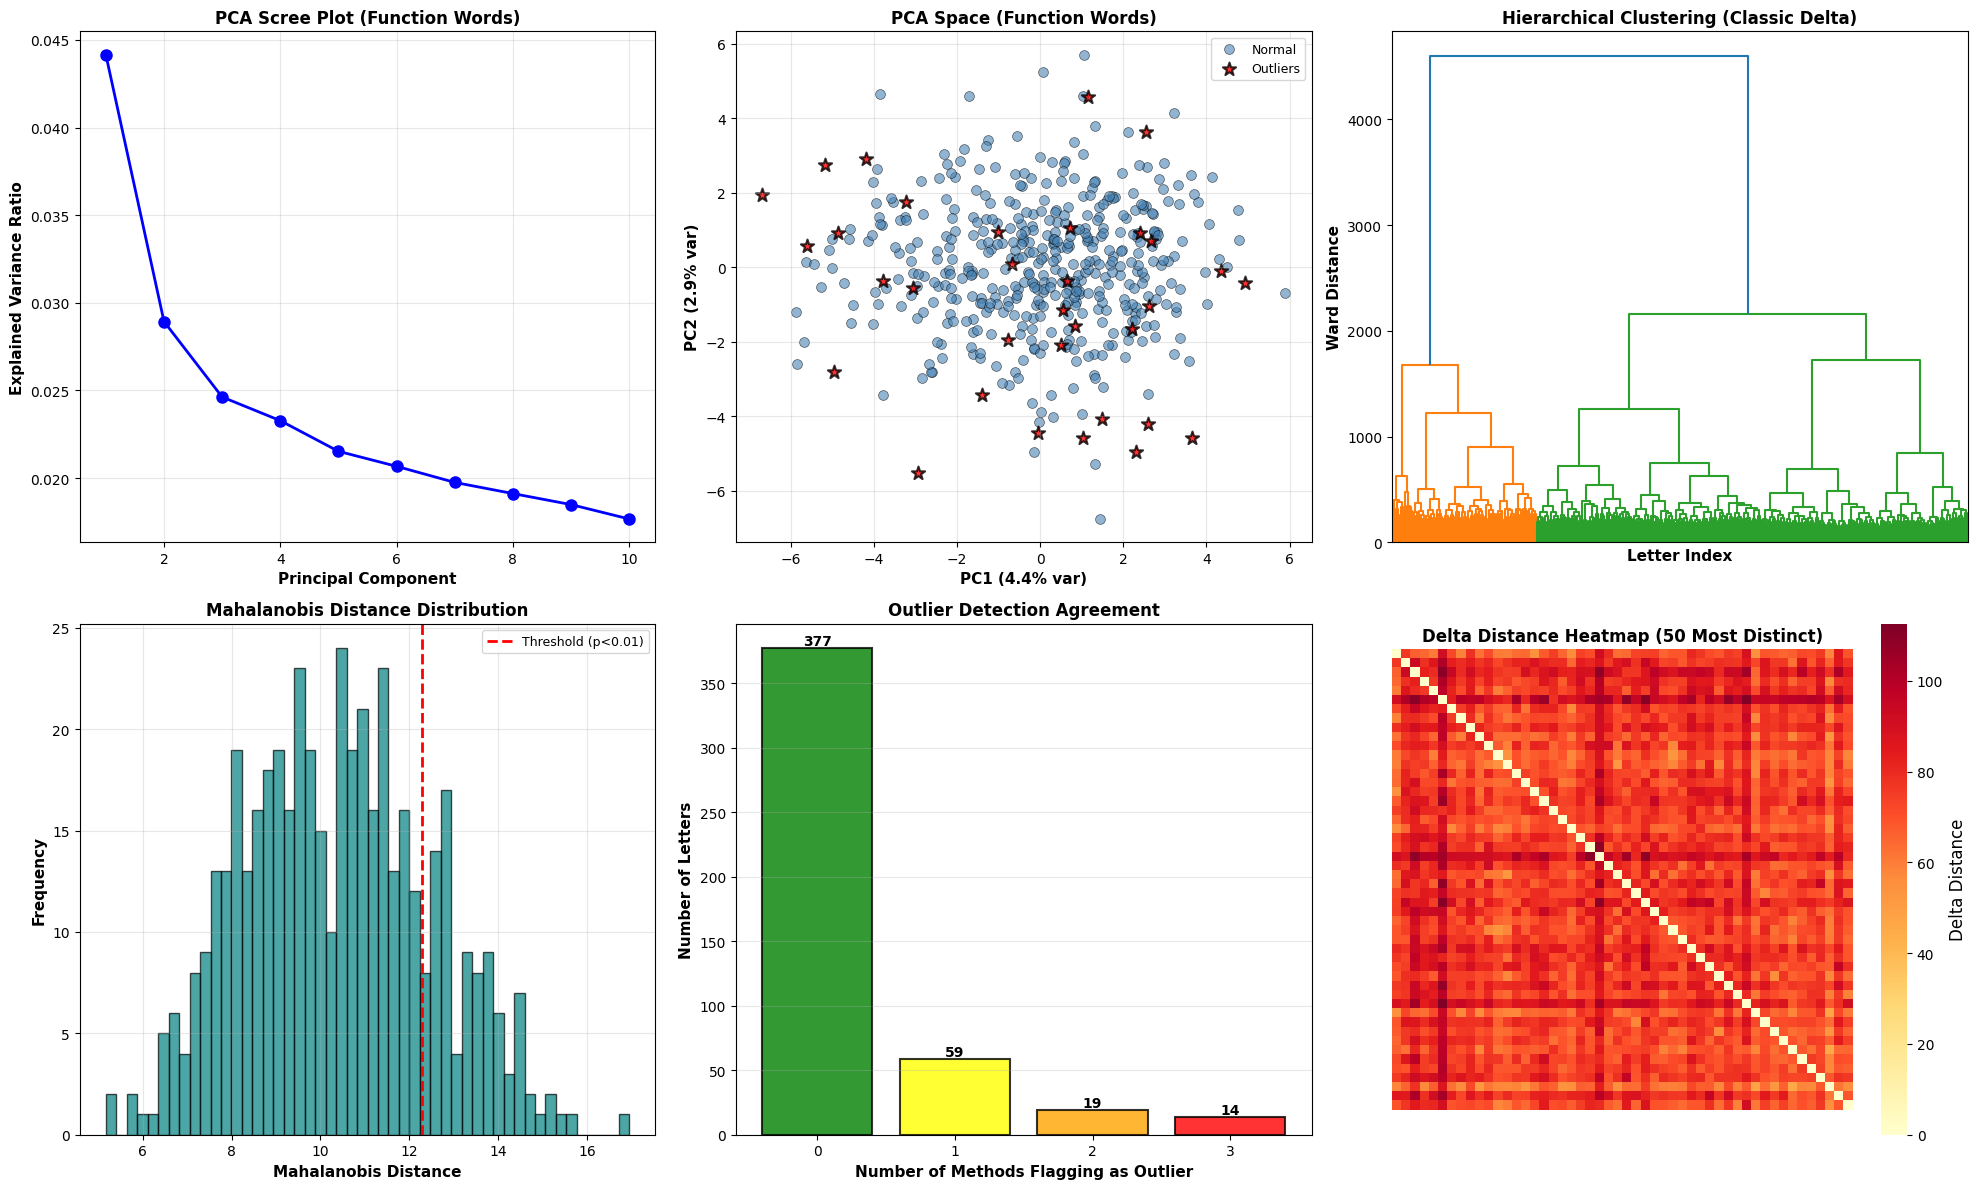


OUTLIER SUMMARY

Top 20 stylometric outliers:
      Date                   Audience_clean  body_word_count                               Place  mahalanobis_distance  outlier_votes
1895/05/02                               S_              247                                 USA             16.954746              3
1895/12/08                Christine, Sister              108              USA, NY, New York City             15.718446              3
1900/01/24                 Nivedita, Sister              107                USA, CA, Los Angeles             15.361037              3
1899/05/10                Christine, Sister              100                        India, Belur             15.120911              2
1895/12/29                     Sturdy, E.T.              109 USA, NY, Stone Ridge, Ridgely Manor             15.114250              2
1900/03/04                 Nivedita, Sister              150              USA, CA, San Francisco             15.055634              3
1898/10/26 Maha

In [24]:
# ============================================================================
# COMPREHENSIVE STYLOMETRIC ANALYSIS - ALL METHODS IN ONE CELL
# ============================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform
from scipy.stats import chi2
import warnings
warnings.filterwarnings('ignore')

print("=" * 80)
print("COMPREHENSIVE STYLOMETRIC ANALYSIS - ENGLISH LETTERS")
print("=" * 80)

# Prepare corpus
stylometry_corpus = english_letters[english_letters['body_word_count'] >= 100].copy().reset_index(drop=True)
print(f"Corpus: {len(stylometry_corpus)} letters with 100+ words\n")

# ============================================================================
# 1. CREATE FUNCTION WORD FREQUENCY MATRIX
# ============================================================================
print("Step 1: Building function word frequency matrix...")

def tokenize_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s\']', ' ', text)
    return text.split()

# Build term-document matrix with function words
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Use CountVectorizer with our function words
vectorizer = CountVectorizer(
    vocabulary=function_words_in_corpus,
    tokenizer=tokenize_text,
    lowercase=True
)

# Create frequency matrix (letters x function words)
freq_matrix = vectorizer.fit_transform(stylometry_corpus['body_text'])
freq_matrix = freq_matrix.toarray()

# Normalize by letter length (relative frequencies)
row_sums = freq_matrix.sum(axis=1, keepdims=True)
freq_matrix_normalized = freq_matrix / row_sums

print(f"  Matrix shape: {freq_matrix_normalized.shape} (letters x function words)")
print(f"  Features: {len(function_words_in_corpus)} function words\n")

# ============================================================================
# 2. BURROWS' DELTA (MULTIPLE VARIANTS)
# ============================================================================
print("Step 2: Computing Burrows' Delta variants...")

# Z-score standardization for Delta
scaler = StandardScaler()
freq_matrix_z = scaler.fit_transform(freq_matrix_normalized)

# Calculate distance matrices for different Delta variants
def classic_delta(z_scores):
    """Manhattan distance (Classic Delta)"""
    return squareform(pdist(z_scores, metric='cityblock'))

def cosine_delta(z_scores):
    """Cosine distance"""
    return squareform(pdist(z_scores, metric='cosine'))

def euclidean_delta(z_scores):
    """Euclidean distance (Quadratic Delta)"""
    return squareform(pdist(z_scores, metric='euclidean'))

def canberra_delta(z_scores):
    """Canberra distance"""
    return squareform(pdist(z_scores, metric='canberra'))

delta_classic = classic_delta(freq_matrix_z)
delta_cosine = cosine_delta(freq_matrix_z)
delta_euclidean = euclidean_delta(freq_matrix_z)
delta_canberra = canberra_delta(freq_matrix_z)

print(f"  ✓ Classic Delta (Manhattan)")
print(f"  ✓ Cosine Delta")
print(f"  ✓ Euclidean Delta (Quadratic)")
print(f"  ✓ Canberra Delta\n")

# ============================================================================
# 3. PCA ON FUNCTION WORDS
# ============================================================================
print("Step 3: PCA on function word frequencies...")

pca = PCA(n_components=min(20, len(stylometry_corpus), len(function_words_in_corpus)))
pca_coords = pca.fit_transform(freq_matrix_z)

explained_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)

print(f"  PC1 explains {explained_var[0]*100:.1f}% variance")
print(f"  PC2 explains {explained_var[1]*100:.1f}% variance")
print(f"  First 5 PCs explain {cumulative_var[4]*100:.1f}% variance\n")

# ============================================================================
# 4. HIERARCHICAL CLUSTERING
# ============================================================================
print("Step 4: Hierarchical clustering (Classic Delta)...")

linkage_matrix = linkage(delta_classic, method='ward')
print(f"  ✓ Ward linkage computed\n")

# ============================================================================
# 5. OUTLIER DETECTION (3 METHODS)
# ============================================================================
print("Step 5: Outlier detection...")

# Method 1: Mahalanobis distance
mean_vec = np.mean(freq_matrix_z, axis=0)
cov_matrix = np.cov(freq_matrix_z.T)
inv_cov = np.linalg.pinv(cov_matrix)

mahalanobis_dist = []
for i in range(len(freq_matrix_z)):
    diff = freq_matrix_z[i] - mean_vec
    dist = np.sqrt(diff @ inv_cov @ diff.T)
    mahalanobis_dist.append(dist)

mahalanobis_dist = np.array(mahalanobis_dist)

# Chi-square threshold for outliers (p < 0.01)
threshold = np.sqrt(chi2.ppf(0.99, len(function_words_in_corpus)))
mahalanobis_outliers = mahalanobis_dist > threshold

# Method 2: Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
iso_predictions = iso_forest.fit_predict(freq_matrix_z)
iso_outliers = iso_predictions == -1

# Method 3: Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
lof_predictions = lof.fit_predict(freq_matrix_z)
lof_outliers = lof_predictions == -1

print(f"  Mahalanobis outliers: {mahalanobis_outliers.sum()}")
print(f"  Isolation Forest outliers: {iso_outliers.sum()}")
print(f"  Local Outlier Factor outliers: {lof_outliers.sum()}")

# Combine outliers (detected by at least 2 methods)
outlier_votes = mahalanobis_outliers.astype(int) + iso_outliers.astype(int) + lof_outliers.astype(int)
consensus_outliers = outlier_votes >= 2

print(f"  Consensus outliers (2+ methods): {consensus_outliers.sum()}\n")

# ============================================================================
# 6. STORE RESULTS IN DATAFRAME
# ============================================================================
print("Step 6: Compiling results...")

stylometry_corpus['PC1'] = pca_coords[:, 0]
stylometry_corpus['PC2'] = pca_coords[:, 1]
stylometry_corpus['PC3'] = pca_coords[:, 2]
stylometry_corpus['mahalanobis_distance'] = mahalanobis_dist
stylometry_corpus['mahalanobis_outlier'] = mahalanobis_outliers
stylometry_corpus['iso_forest_outlier'] = iso_outliers
stylometry_corpus['lof_outlier'] = lof_outliers
stylometry_corpus['consensus_outlier'] = consensus_outliers
stylometry_corpus['outlier_votes'] = outlier_votes

# ============================================================================
# 7. VISUALIZATIONS
# ============================================================================
print("Step 7: Creating visualizations...\n")

fig = plt.figure(figsize=(20, 12))

# Plot 1: PCA Scree Plot
ax1 = plt.subplot(2, 3, 1)
plt.plot(range(1, 11), explained_var[:10], 'bo-', linewidth=2, markersize=8)
plt.xlabel('Principal Component', fontsize=11, fontweight='bold')
plt.ylabel('Explained Variance Ratio', fontsize=11, fontweight='bold')
plt.title('PCA Scree Plot (Function Words)', fontsize=12, fontweight='bold')
plt.grid(alpha=0.3)

# Plot 2: PCA Biplot (PC1 vs PC2) with outliers highlighted
ax2 = plt.subplot(2, 3, 2)
normal_mask = ~consensus_outliers
outlier_mask = consensus_outliers

plt.scatter(pca_coords[normal_mask, 0], pca_coords[normal_mask, 1],
           c='steelblue', alpha=0.6, s=50, label='Normal', edgecolors='black', linewidth=0.5)
plt.scatter(pca_coords[outlier_mask, 0], pca_coords[outlier_mask, 1],
           c='red', alpha=0.8, s=100, label='Outliers', edgecolors='black', linewidth=1.5, marker='*')
plt.xlabel(f'PC1 ({explained_var[0]*100:.1f}% var)', fontsize=11, fontweight='bold')
plt.ylabel(f'PC2 ({explained_var[1]*100:.1f}% var)', fontsize=11, fontweight='bold')
plt.title('PCA Space (Function Words)', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

# Plot 3: Dendrogram (hierarchical clustering)
ax3 = plt.subplot(2, 3, 3)
dendrogram(linkage_matrix, no_labels=True, color_threshold=0.7*max(linkage_matrix[:,2]))
plt.xlabel('Letter Index', fontsize=11, fontweight='bold')
plt.ylabel('Ward Distance', fontsize=11, fontweight='bold')
plt.title('Hierarchical Clustering (Classic Delta)', fontsize=12, fontweight='bold')

# Plot 4: Mahalanobis Distance Distribution
ax4 = plt.subplot(2, 3, 4)
plt.hist(mahalanobis_dist, bins=50, color='teal', alpha=0.7, edgecolor='black')
plt.axvline(threshold, color='red', linestyle='--', linewidth=2, label=f'Threshold (p<0.01)')
plt.xlabel('Mahalanobis Distance', fontsize=11, fontweight='bold')
plt.ylabel('Frequency', fontsize=11, fontweight='bold')
plt.title('Mahalanobis Distance Distribution', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

# Plot 5: Outlier Venn (overlap between methods)
ax5 = plt.subplot(2, 3, 5)
vote_counts = pd.Series(outlier_votes).value_counts().sort_index()
colors = ['green', 'yellow', 'orange', 'red']
bars = plt.bar(vote_counts.index, vote_counts.values, color=[colors[i] for i in vote_counts.index],
               edgecolor='black', linewidth=1.5, alpha=0.8)
plt.xlabel('Number of Methods Flagging as Outlier', fontsize=11, fontweight='bold')
plt.ylabel('Number of Letters', fontsize=11, fontweight='bold')
plt.title('Outlier Detection Agreement', fontsize=12, fontweight='bold')
plt.xticks([0, 1, 2, 3])
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}', ha='center', va='bottom', fontweight='bold')
plt.grid(alpha=0.3, axis='y')

# Plot 6: Delta Distance Heatmap (top 50 letters by distance variance)
ax6 = plt.subplot(2, 3, 6)
# Find letters with highest variance in distances (most stylistically distinct)
dist_variance = delta_classic.var(axis=1)
top_50_idx = np.argsort(dist_variance)[-50:]
delta_subset = delta_classic[np.ix_(top_50_idx, top_50_idx)]

sns.heatmap(delta_subset, cmap='YlOrRd', cbar_kws={'label': 'Delta Distance'},
           xticklabels=False, yticklabels=False, square=True)
plt.title('Delta Distance Heatmap (50 Most Distinct)', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# ============================================================================
# 8. SUMMARY STATISTICS
# ============================================================================
print("\n" + "=" * 80)
print("OUTLIER SUMMARY")
print("=" * 80)

outlier_summary = stylometry_corpus[consensus_outliers][
    ['Date', 'Audience_clean', 'body_word_count', 'Place',
     'mahalanobis_distance', 'outlier_votes']
].sort_values('mahalanobis_distance', ascending=False)

print(f"\nTop 20 stylometric outliers:")
print(outlier_summary.head(20).to_string(index=False))

print("\n" + "=" * 80)
print("ANALYSIS COMPLETE")
print("=" * 80)
print(f"✓ {len(stylometry_corpus)} letters analyzed")
print(f"✓ {len(function_words_in_corpus)} function words")
print(f"✓ 4 Delta variants computed")
print(f"✓ PCA completed (first 5 PCs: {cumulative_var[4]*100:.1f}% variance)")
print(f"✓ 3 outlier detection methods applied")
print(f"✓ {consensus_outliers.sum()} consensus outliers identified")

DETAILED OUTLIER ANALYSIS: S_ LETTER (1895/05/02)

Full letter text:
--------------------------------------------------------------------------------
DEAR S— ,

So you have made up your mind to renounce the world. I have sympathy with your desire. There is nothing so high as renunciation of self. But you must not forget that to forgo your own favourite desire for the welfare of those that depend upon you is no small sacrifice. Follow the spotless life and teachings of Shri Ramakrishna and look after the comforts of your family. You do your own duty, and leave the rest to Him.

Love makes no distinction between man and man, between an Aryan and a Mlechchha, between a Brâhmana and a Pariah, nor even between a man and a woman. Love makes the whole universe as one's own home. True progress is slow but sure.Work among those young men who can devote heart and soul to this one duty — the duty of raising the masses of India. Awake them, unite them, and inspire them with this spirit of renuncia

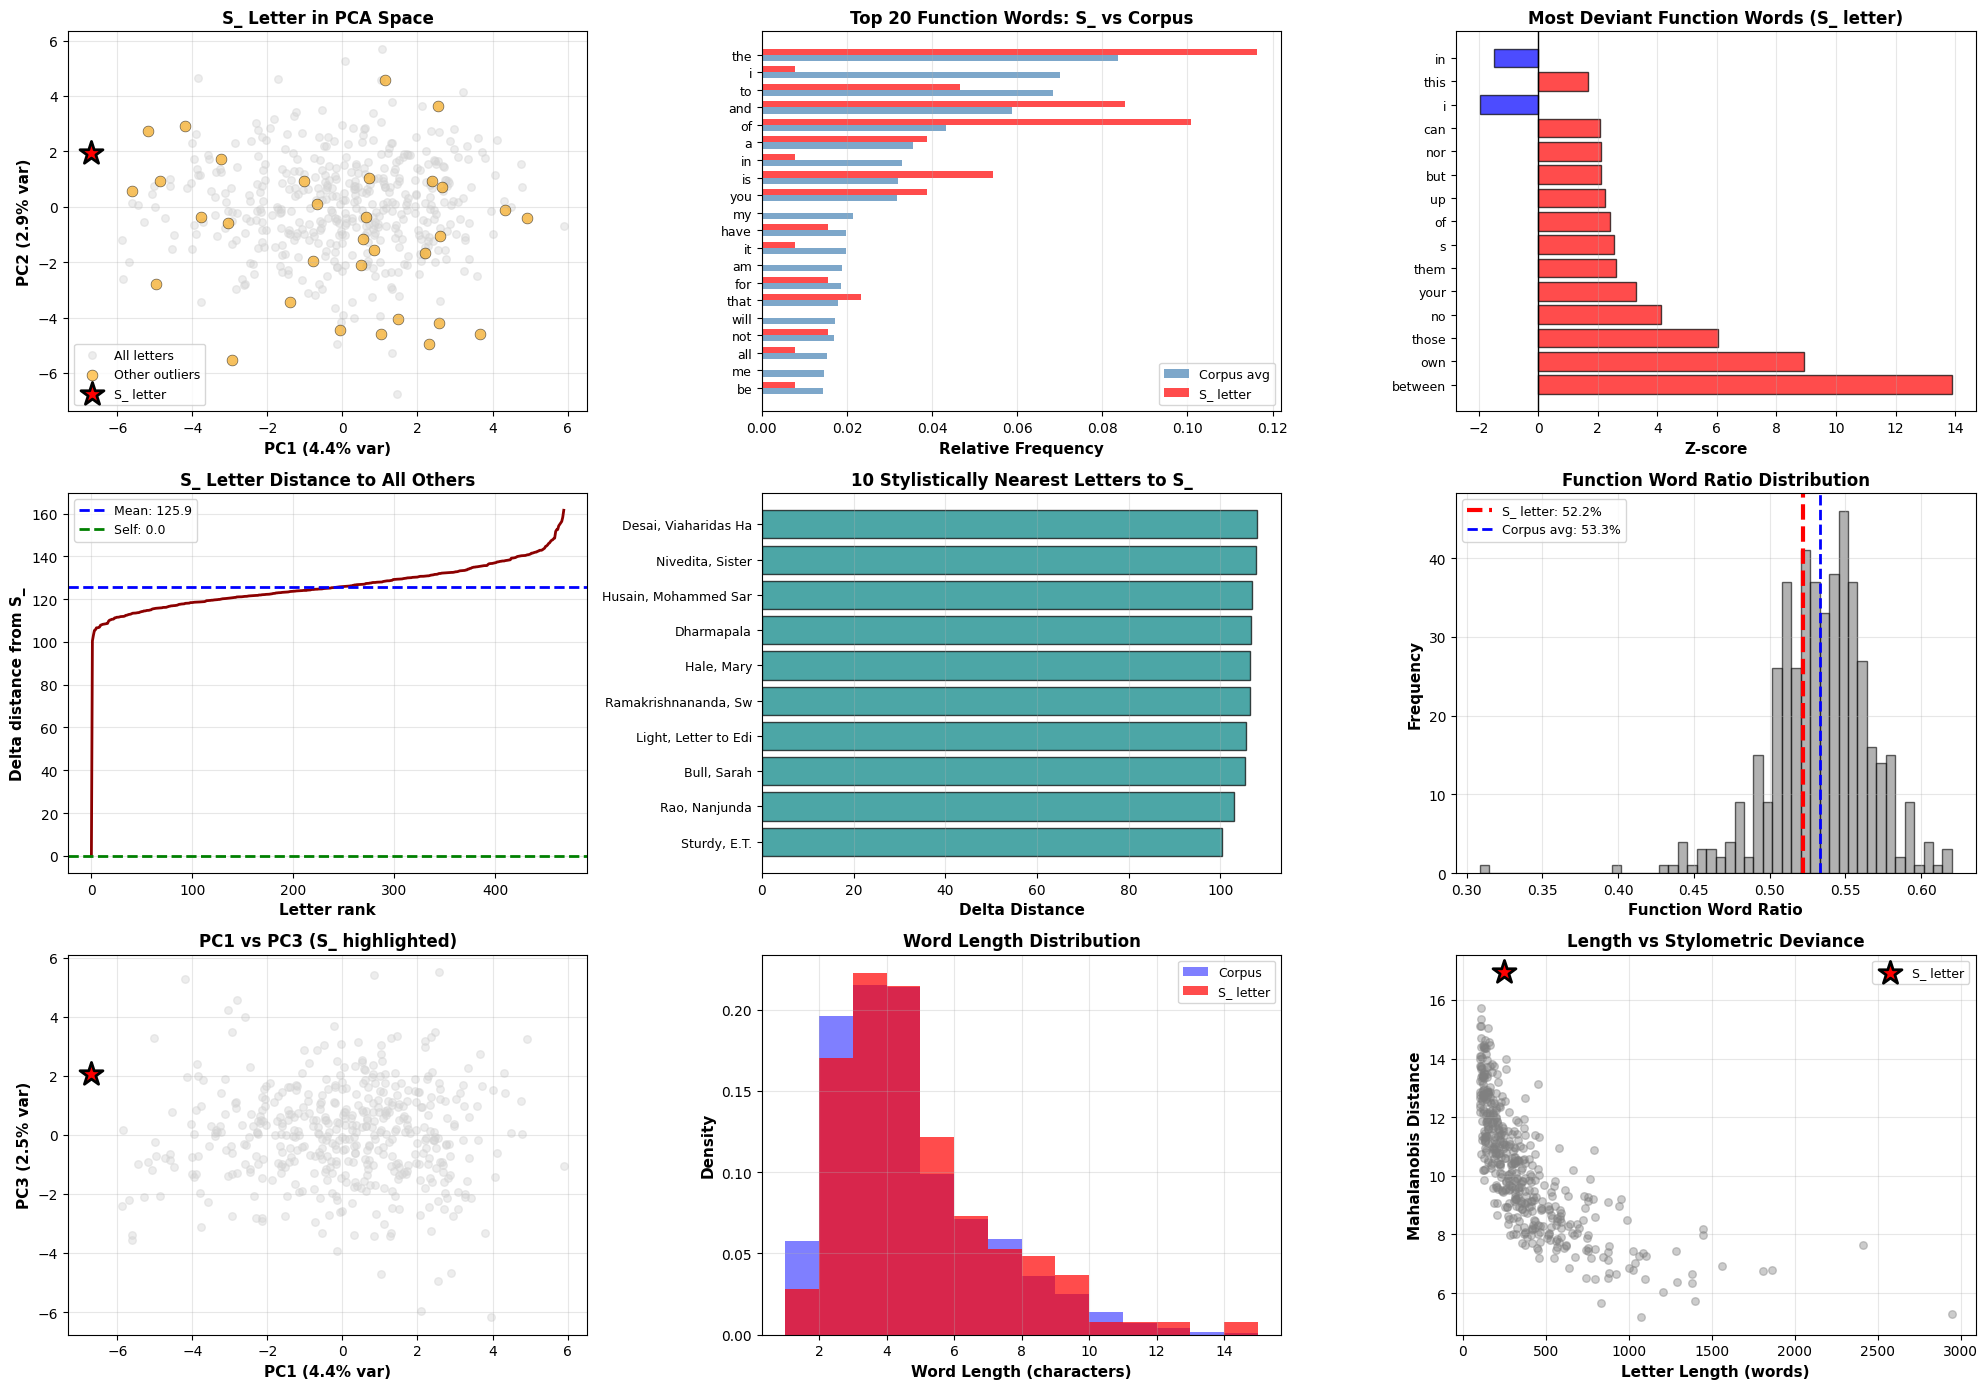


INTERPRETATION
The S_ letter is an outlier because:
1. Check z-scores above - which function words are over/under-used
2. Check PCA position - how far from cluster centroid
3. Check nearest neighbors - who it's stylistically similar to
4. Letter is only 247 words - shorter texts = more volatile profiles


In [25]:
# Detailed analysis of why the S_ letter is such an outlier

s_letter_idx = stylometry_corpus[stylometry_corpus['Audience_clean'] == 'S_'].index[0]

print("=" * 80)
print("DETAILED OUTLIER ANALYSIS: S_ LETTER (1895/05/02)")
print("=" * 80)

# Get the letter text
s_text = stylometry_corpus.loc[s_letter_idx, 'body_text']
print(f"\nFull letter text:")
print("-" * 80)
print(s_text)
print("-" * 80)

# Tokenize and get function word usage
s_tokens = tokenize_text(s_text)
s_function_words = [w for w in s_tokens if w in function_words_in_corpus]

print(f"\nBasic statistics:")
print(f"  Total words: {len(s_tokens)}")
print(f"  Function words: {len(s_function_words)}")
print(f"  Function word ratio: {len(s_function_words)/len(s_tokens)*100:.1f}%")

# Get function word frequencies for this letter
s_freq = freq_matrix_normalized[s_letter_idx]

# Compare to corpus average
corpus_mean_freq = freq_matrix_normalized.mean(axis=0)
corpus_std_freq = freq_matrix_normalized.std(axis=0)

# Find most deviant function words (z-scores)
z_scores = (s_freq - corpus_mean_freq) / (corpus_std_freq + 1e-10)
deviant_words = []
for i, word in enumerate(function_words_in_corpus):
    deviant_words.append((word, s_freq[i], corpus_mean_freq[i], z_scores[i]))

deviant_words_sorted = sorted(deviant_words, key=lambda x: abs(x[3]), reverse=True)

print(f"\nTop 20 most deviant function words (by z-score):")
print(f"{'Word':<15} {'S_ freq':<12} {'Corpus avg':<12} {'Z-score':<10} {'Direction'}")
print("-" * 70)
for word, s_f, c_f, z in deviant_words_sorted[:20]:
    direction = "↑ HIGHER" if z > 0 else "↓ LOWER"
    print(f"{word:<15} {s_f:>10.4f}   {c_f:>10.4f}   {z:>8.2f}   {direction}")

# ============================================================================
# VISUALIZATIONS
# ============================================================================

fig = plt.figure(figsize=(20, 14))

# Plot 1: PCA space with S_ highlighted
ax1 = plt.subplot(3, 3, 1)
plt.scatter(pca_coords[:, 0], pca_coords[:, 1], c='lightgray', alpha=0.4, s=30, label='All letters')
plt.scatter(pca_coords[outlier_mask, 0], pca_coords[outlier_mask, 1],
           c='orange', alpha=0.6, s=60, label='Other outliers', edgecolors='black', linewidth=0.5)
plt.scatter(pca_coords[s_letter_idx, 0], pca_coords[s_letter_idx, 1],
           c='red', s=300, marker='*', label='S_ letter', edgecolors='black', linewidth=2, zorder=10)
plt.xlabel(f'PC1 ({explained_var[0]*100:.1f}% var)', fontsize=11, fontweight='bold')
plt.ylabel(f'PC2 ({explained_var[1]*100:.1f}% var)', fontsize=11, fontweight='bold')
plt.title('S_ Letter in PCA Space', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

# Plot 2: Function word frequency comparison (top 20 most used in corpus)
ax2 = plt.subplot(3, 3, 2)
top_20_fw = np.argsort(corpus_mean_freq)[-20:]
x_pos = np.arange(20)
width = 0.35

corpus_top20 = corpus_mean_freq[top_20_fw]
s_top20 = s_freq[top_20_fw]
labels_top20 = [function_words_in_corpus[i] for i in top_20_fw]

plt.barh(x_pos - width/2, corpus_top20, width, label='Corpus avg', color='steelblue', alpha=0.7)
plt.barh(x_pos + width/2, s_top20, width, label='S_ letter', color='red', alpha=0.7)
plt.yticks(x_pos, labels_top20, fontsize=9)
plt.xlabel('Relative Frequency', fontsize=11, fontweight='bold')
plt.title('Top 20 Function Words: S_ vs Corpus', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3, axis='x')

# Plot 3: Z-score deviation for extreme words
ax3 = plt.subplot(3, 3, 3)
extreme_words = deviant_words_sorted[:15]
words = [w[0] for w in extreme_words]
zscores = [w[3] for w in extreme_words]
colors_bar = ['red' if z > 0 else 'blue' for z in zscores]

plt.barh(range(15), zscores, color=colors_bar, alpha=0.7, edgecolor='black', linewidth=1)
plt.yticks(range(15), words, fontsize=9)
plt.xlabel('Z-score', fontsize=11, fontweight='bold')
plt.title('Most Deviant Function Words (S_ letter)', fontsize=12, fontweight='bold')
plt.axvline(0, color='black', linestyle='-', linewidth=1)
plt.grid(alpha=0.3, axis='x')

# Plot 4: Distance from all other letters
ax4 = plt.subplot(3, 3, 4)
distances_from_s = delta_classic[s_letter_idx, :]
distances_sorted = np.sort(distances_from_s)
plt.plot(distances_sorted, linewidth=2, color='darkred')
plt.axhline(distances_from_s.mean(), color='blue', linestyle='--', linewidth=2, label=f'Mean: {distances_from_s.mean():.1f}')
plt.axhline(distances_from_s[s_letter_idx], color='green', linestyle='--', linewidth=2, label=f'Self: {distances_from_s[s_letter_idx]:.1f}')
plt.xlabel('Letter rank', fontsize=11, fontweight='bold')
plt.ylabel('Delta distance from S_', fontsize=11, fontweight='bold')
plt.title('S_ Letter Distance to All Others', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

# Plot 5: Nearest neighbors to S_
ax5 = plt.subplot(3, 3, 5)
nearest_10_idx = np.argsort(distances_from_s)[1:11]  # Exclude self
nearest_recipients = stylometry_corpus.iloc[nearest_10_idx]['Audience_clean'].values
nearest_distances = distances_from_s[nearest_10_idx]

plt.barh(range(10), nearest_distances, color='teal', alpha=0.7, edgecolor='black', linewidth=1)
plt.yticks(range(10), [f"{r[:20]}" for r in nearest_recipients], fontsize=9)
plt.xlabel('Delta Distance', fontsize=11, fontweight='bold')
plt.title('10 Stylistically Nearest Letters to S_', fontsize=12, fontweight='bold')
plt.grid(alpha=0.3, axis='x')

# Plot 6: Function word ratio comparison
ax6 = plt.subplot(3, 3, 6)
all_fw_ratios = []
for idx in range(len(stylometry_corpus)):
    tokens = tokenize_text(stylometry_corpus.iloc[idx]['body_text'])
    fw = [w for w in tokens if w in function_words_in_corpus]
    all_fw_ratios.append(len(fw) / len(tokens))

s_fw_ratio = len(s_function_words) / len(s_tokens)
plt.hist(all_fw_ratios, bins=50, color='gray', alpha=0.6, edgecolor='black')
plt.axvline(s_fw_ratio, color='red', linestyle='--', linewidth=3, label=f'S_ letter: {s_fw_ratio*100:.1f}%')
plt.axvline(np.mean(all_fw_ratios), color='blue', linestyle='--', linewidth=2, label=f'Corpus avg: {np.mean(all_fw_ratios)*100:.1f}%')
plt.xlabel('Function Word Ratio', fontsize=11, fontweight='bold')
plt.ylabel('Frequency', fontsize=11, fontweight='bold')
plt.title('Function Word Ratio Distribution', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

# Plot 7: PC1 vs PC3
ax7 = plt.subplot(3, 3, 7)
plt.scatter(pca_coords[:, 0], pca_coords[:, 2], c='lightgray', alpha=0.4, s=30)
plt.scatter(pca_coords[s_letter_idx, 0], pca_coords[s_letter_idx, 2],
           c='red', s=300, marker='*', edgecolors='black', linewidth=2, zorder=10)
plt.xlabel(f'PC1 ({explained_var[0]*100:.1f}% var)', fontsize=11, fontweight='bold')
plt.ylabel(f'PC3 ({explained_var[2]*100:.1f}% var)', fontsize=11, fontweight='bold')
plt.title('PC1 vs PC3 (S_ highlighted)', fontsize=12, fontweight='bold')
plt.grid(alpha=0.3)

# Plot 8: Word length distribution
ax8 = plt.subplot(3, 3, 8)
s_word_lengths = [len(w) for w in s_tokens]
corpus_word_lengths = []
for idx in range(len(stylometry_corpus)):
    tokens = tokenize_text(stylometry_corpus.iloc[idx]['body_text'])
    corpus_word_lengths.extend([len(w) for w in tokens])

plt.hist(corpus_word_lengths, bins=range(1, 16), alpha=0.5, label='Corpus', density=True, color='blue')
plt.hist(s_word_lengths, bins=range(1, 16), alpha=0.7, label='S_ letter', density=True, color='red')
plt.xlabel('Word Length (characters)', fontsize=11, fontweight='bold')
plt.ylabel('Density', fontsize=11, fontweight='bold')
plt.title('Word Length Distribution', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

# Plot 9: Letter length vs Mahalanobis distance
ax9 = plt.subplot(3, 3, 9)
plt.scatter(stylometry_corpus['body_word_count'], stylometry_corpus['mahalanobis_distance'],
           c='gray', alpha=0.4, s=30)
plt.scatter(stylometry_corpus.loc[s_letter_idx, 'body_word_count'],
           stylometry_corpus.loc[s_letter_idx, 'mahalanobis_distance'],
           c='red', s=300, marker='*', edgecolors='black', linewidth=2, zorder=10, label='S_ letter')
plt.xlabel('Letter Length (words)', fontsize=11, fontweight='bold')
plt.ylabel('Mahalanobis Distance', fontsize=11, fontweight='bold')
plt.title('Length vs Stylometric Deviance', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "=" * 80)
print("INTERPRETATION")
print("=" * 80)
print("The S_ letter is an outlier because:")
print("1. Check z-scores above - which function words are over/under-used")
print("2. Check PCA position - how far from cluster centroid")
print("3. Check nearest neighbors - who it's stylistically similar to")
print("4. Letter is only 247 words - shorter texts = more volatile profiles")

In [27]:
# ============================================================================
# PREPARATION CELL FOR DEEP STYLOMETRIC ANALYSIS
# Ensures all required objects, columns, and imports exist
# ============================================================================

print("\n" + "=" * 80)
print("PREPARING DATA AND DEPENDENCIES FOR DEEP STYLOMETRY")
print("=" * 80)

# ---------------------------------------------------------------------------
# 1. Imports (only what is needed later)
# ---------------------------------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.stats import chi2

# ---------------------------------------------------------------------------
# 2. Ensure master dataframe exists
# ---------------------------------------------------------------------------
# We standardize on `all_letters` for this analysis
if 'all_letters' not in globals():
    all_letters = letters.copy()
    print("Created all_letters from letters")
else:
    print("all_letters already exists")

# ---------------------------------------------------------------------------
# 3. Required columns check
# ---------------------------------------------------------------------------
required_columns = [
    'body_text',
    'body_word_count',
    'Audience_clean',
    'Place',
    'Date'
]

missing_cols = [c for c in required_columns if c not in all_letters.columns]
if missing_cols:
    raise ValueError(f"Missing required columns: {missing_cols}")

# ---------------------------------------------------------------------------
# 4. Language column normalization
# ---------------------------------------------------------------------------
# Your analysis uses `Language` (capital L)
if 'Language' not in all_letters.columns:
    if 'language' in all_letters.columns:
        all_letters['Language'] = all_letters['language']
        print("Mapped language → Language")
    else:
        # Assume English if no language metadata exists
        all_letters['Language'] = 'English'
        print("No language column found — defaulting all to English")

# ---------------------------------------------------------------------------
# 5. Date parsing (needed for temporal analysis)
# ---------------------------------------------------------------------------
if 'date_parsed' not in all_letters.columns:
    all_letters['date_parsed'] = pd.to_datetime(all_letters['Date'], errors='coerce')
    print("Parsed Date → date_parsed")
else:
    print("date_parsed already exists")

# ---------------------------------------------------------------------------
# 6. Final sanity summary
# ---------------------------------------------------------------------------
print(f"Total letters: {len(all_letters)}")
print(f"English letters: {(all_letters['Language'] == 'English').sum()}")
print(f"Date coverage: {all_letters['date_parsed'].min()} → {all_letters['date_parsed'].max()}")

print("\n✓ Data and dependencies ready for deep stylometric analysis")



PREPARING DATA AND DEPENDENCIES FOR DEEP STYLOMETRY
Created all_letters from letters
Parsed Date → date_parsed
Total letters: 762
English letters: 604
Date coverage: 1888-08-12 00:00:00 → 1902-06-21 00:00:00

✓ Data and dependencies ready for deep stylometric analysis


COMPREHENSIVE STYLOMETRIC ANALYSIS WITH STRATIFICATION

Step 1: Preparing corpora with different word count thresholds...
  100+ words: 469 letters
  200+ words: 317 letters
  300+ words: 224 letters

Step 2: Stratifying by letter length bins...

Length distribution:
  short: 152 letters
  medium: 173 letters
  long: 110 letters
  very_long: 34 letters

Step 3: Categorizing by geography...
  {'USA': 259, 'India': 127, 'England': 50, 'Europe': 23, 'Other': 10}

Step 4: Categorizing by time period...
  {'1894-1896': 206, '1900-1902': 109, '1897-1899': 89, 'Unknown': 45, '1889-1893': 20}

STYLOMETRIC ANALYSIS (200+ word letters for stability)
  Corpus: 317 letters
  PC1 variance: 5.1%
  PC2 variance: 3.5%
  Outliers: 22

OUTLIER ANALYSIS BY CATEGORY

OUTLIERS BY RECIPIENT (Top 15):
Recipient                           Outliers   Total    Rate    
-----------------------------------------------------------------
Nivedita, Sister                    5          21       23.81%  
Brahmananda, S

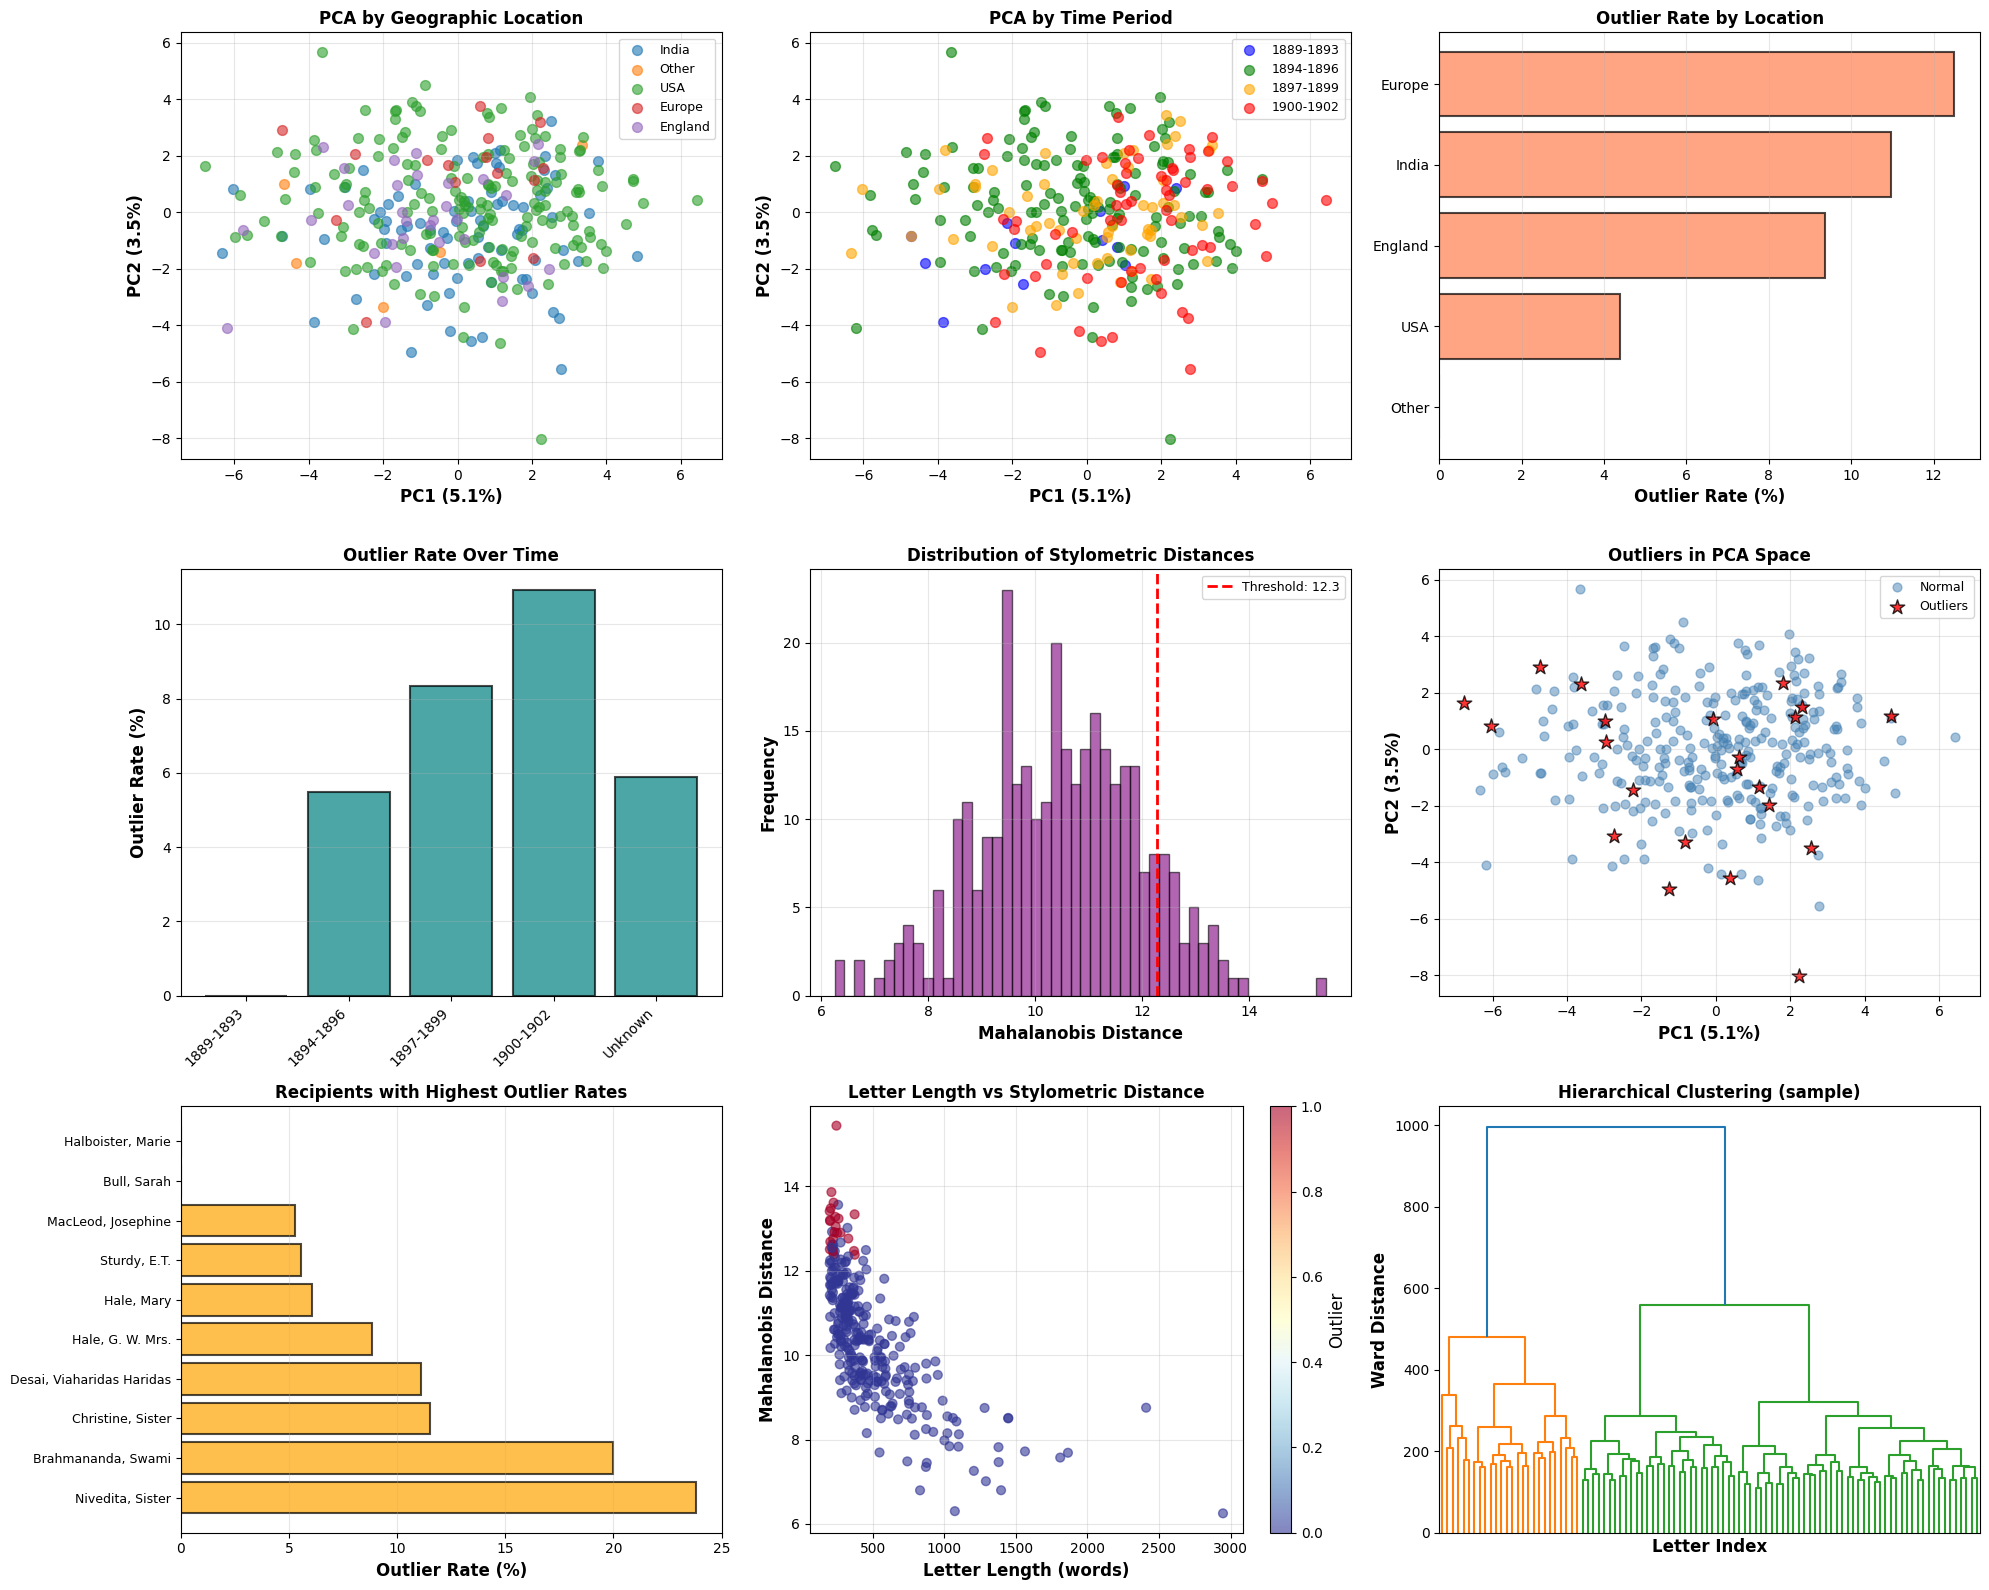


TOP 20 OUTLIERS (200+ word corpus)

Date         Recipient                      Words   Location   Period       Dist   
-------------------------------------------------------------------------------------
1895/05/02   S_                             247     USA        1894-1896    15.44  
1899/12/23   Nivedita, Sister               212     USA        1897-1899    13.86  
1900/04/23   Hale, Mary                     227     USA        1900-1902    13.61  
1898/08/25   Nivedita, Sister               207     India      1897-1899    13.48  
1896/08/05   Christine, Sister              200     Europe     1894-1896    13.41  
1902/02/07   MacLeod, Josephine             374     India      1900-1902    13.34  
1901/12/23   Christine, Sister              239     India      1900-1902    13.28  
1896/06/07   Nivedita, Sister               262     England    1894-1896    13.24  
1895/07/03   Hale, G. W. Mrs.               202     USA        1894-1896    13.20  
1892/06/15A  Desai, Viaharidas Harida

In [28]:
# ============================================================================
# DEEP STYLOMETRIC ANALYSIS - COMPREHENSIVE VERSION
# ============================================================================

print("=" * 80)
print("COMPREHENSIVE STYLOMETRIC ANALYSIS WITH STRATIFICATION")
print("=" * 80)

# ============================================================================
# 1. PREPARE CORPORA WITH DIFFERENT WORD COUNT THRESHOLDS
# ============================================================================
print("\nStep 1: Preparing corpora with different word count thresholds...")

english_all = all_letters[all_letters['Language'] == 'English'].copy()

corpus_100 = english_all[english_all['body_word_count'] >= 100].copy().reset_index(drop=True)
corpus_200 = english_all[english_all['body_word_count'] >= 200].copy().reset_index(drop=True)
corpus_300 = english_all[english_all['body_word_count'] >= 300].copy().reset_index(drop=True)

print(f"  100+ words: {len(corpus_100)} letters")
print(f"  200+ words: {len(corpus_200)} letters")
print(f"  300+ words: {len(corpus_300)} letters")

# ============================================================================
# 2. STRATIFY BY LETTER LENGTH BINS
# ============================================================================
print("\nStep 2: Stratifying by letter length bins...")

def assign_length_bin(word_count):
    if word_count < 100:
        return "very_short"
    elif word_count < 200:
        return "short"
    elif word_count < 400:
        return "medium"
    elif word_count < 800:
        return "long"
    else:
        return "very_long"

corpus_100['length_bin'] = corpus_100['body_word_count'].apply(assign_length_bin)

bin_counts = corpus_100['length_bin'].value_counts()
print(f"\nLength distribution:")
for bin_name in ['short', 'medium', 'long', 'very_long']:
    if bin_name in bin_counts:
        print(f"  {bin_name}: {bin_counts[bin_name]} letters")

# ============================================================================
# 3. EXTRACT GEOGRAPHIC CATEGORIES
# ============================================================================
print("\nStep 3: Categorizing by geography...")

def categorize_location(place):
    place_str = str(place).lower()
    if 'india' in place_str or 'calcutta' in place_str or 'madras' in place_str or 'bombay' in place_str:
        return "India"
    elif 'usa' in place_str or 'america' in place_str:
        return "USA"
    elif 'england' in place_str or 'london' in place_str or 'uk' in place_str:
        return "England"
    elif 'france' in place_str or 'germany' in place_str or 'switzerland' in place_str:
        return "Europe"
    else:
        return "Other"

corpus_100['location_category'] = corpus_100['Place'].apply(categorize_location)
corpus_200['location_category'] = corpus_200['Place'].apply(categorize_location)

location_counts = corpus_100['location_category'].value_counts()
print(f"  {location_counts.to_dict()}")

# ============================================================================
# 4. EXTRACT TEMPORAL CATEGORIES
# ============================================================================
print("\nStep 4: Categorizing by time period...")

corpus_100['year'] = corpus_100['date_parsed'].dt.year
corpus_200['year'] = corpus_200['date_parsed'].dt.year

def assign_period(year):
    if pd.isna(year):
        return "Unknown"
    elif year <= 1893:
        return "1889-1893"
    elif year <= 1896:
        return "1894-1896"
    elif year <= 1899:
        return "1897-1899"
    else:
        return "1900-1902"

corpus_100['period'] = corpus_100['year'].apply(assign_period)
corpus_200['period'] = corpus_200['year'].apply(assign_period)

period_counts = corpus_100['period'].value_counts()
print(f"  {period_counts.to_dict()}")

# ============================================================================
# 5. RUN STYLOMETRIC ANALYSIS ON 200+ CORPUS (MORE STABLE)
# ============================================================================
print("\n" + "=" * 80)
print("STYLOMETRIC ANALYSIS (200+ word letters for stability)")
print("=" * 80)

# Build frequency matrix for 200+ corpus
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(vocabulary=function_words_in_corpus, tokenizer=tokenize_text, lowercase=True)
freq_matrix_200 = vectorizer.fit_transform(corpus_200['body_text']).toarray()
row_sums = freq_matrix_200.sum(axis=1, keepdims=True)
freq_matrix_200_norm = freq_matrix_200 / row_sums

# Z-score standardization
scaler_200 = StandardScaler()
freq_matrix_200_z = scaler_200.fit_transform(freq_matrix_200_norm)

# PCA
pca_200 = PCA(n_components=min(20, len(corpus_200), len(function_words_in_corpus)))
pca_coords_200 = pca_200.fit_transform(freq_matrix_200_z)

# Deltas
delta_classic_200 = squareform(pdist(freq_matrix_200_z, metric='cityblock'))
delta_cosine_200 = squareform(pdist(freq_matrix_200_z, metric='cosine'))

# Outlier detection
mean_vec = np.mean(freq_matrix_200_z, axis=0)
cov_matrix = np.cov(freq_matrix_200_z.T)
inv_cov = np.linalg.pinv(cov_matrix)

mahal_dist_200 = []
for i in range(len(freq_matrix_200_z)):
    diff = freq_matrix_200_z[i] - mean_vec
    dist = np.sqrt(diff @ inv_cov @ diff.T)
    mahal_dist_200.append(dist)
mahal_dist_200 = np.array(mahal_dist_200)

threshold_200 = np.sqrt(chi2.ppf(0.99, len(function_words_in_corpus)))
mahal_outliers_200 = mahal_dist_200 > threshold_200

iso_forest_200 = IsolationForest(contamination=0.05, random_state=42)
iso_outliers_200 = iso_forest_200.fit_predict(freq_matrix_200_z) == -1

lof_200 = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
lof_outliers_200 = lof_200.fit_predict(freq_matrix_200_z) == -1

outlier_votes_200 = mahal_outliers_200.astype(int) + iso_outliers_200.astype(int) + lof_outliers_200.astype(int)
consensus_outliers_200 = outlier_votes_200 >= 2

# Add to dataframe
corpus_200['PC1'] = pca_coords_200[:, 0]
corpus_200['PC2'] = pca_coords_200[:, 1]
corpus_200['mahal_distance'] = mahal_dist_200
corpus_200['is_outlier'] = consensus_outliers_200

print(f"  Corpus: {len(corpus_200)} letters")
print(f"  PC1 variance: {pca_200.explained_variance_ratio_[0]*100:.1f}%")
print(f"  PC2 variance: {pca_200.explained_variance_ratio_[1]*100:.1f}%")
print(f"  Outliers: {consensus_outliers_200.sum()}")

# ============================================================================
# 6. ANALYZE OUTLIERS BY CATEGORY
# ============================================================================
print("\n" + "=" * 80)
print("OUTLIER ANALYSIS BY CATEGORY")
print("=" * 80)

# By recipient
print("\nOUTLIERS BY RECIPIENT (Top 15):")
recipient_outliers = corpus_200.groupby('Audience_clean').agg({
    'is_outlier': ['sum', 'count']
}).reset_index()
recipient_outliers.columns = ['recipient', 'outlier_count', 'total_count']
recipient_outliers['outlier_rate'] = recipient_outliers['outlier_count'] / recipient_outliers['total_count']
recipient_outliers = recipient_outliers[recipient_outliers['total_count'] >= 3]  # At least 3 letters
recipient_outliers = recipient_outliers.sort_values('outlier_rate', ascending=False)

print(f"{'Recipient':<35} {'Outliers':<10} {'Total':<8} {'Rate':<8}")
print("-" * 65)
for _, row in recipient_outliers.head(15).iterrows():
    print(f"{row['recipient']:<35} {row['outlier_count']:<10.0f} {row['total_count']:<8.0f} {row['outlier_rate']:<8.2%}")

# By location
print("\nOUTLIERS BY LOCATION:")
location_outliers = corpus_200.groupby('location_category').agg({
    'is_outlier': ['sum', 'count']
}).reset_index()
location_outliers.columns = ['location', 'outlier_count', 'total_count']
location_outliers['outlier_rate'] = location_outliers['outlier_count'] / location_outliers['total_count']

print(f"{'Location':<15} {'Outliers':<10} {'Total':<8} {'Rate':<8}")
print("-" * 45)
for _, row in location_outliers.iterrows():
    print(f"{row['location']:<15} {row['outlier_count']:<10.0f} {row['total_count']:<8.0f} {row['outlier_rate']:<8.2%}")

# By time period
print("\nOUTLIERS BY TIME PERIOD:")
period_outliers = corpus_200.groupby('period').agg({
    'is_outlier': ['sum', 'count']
}).reset_index()
period_outliers.columns = ['period', 'outlier_count', 'total_count']
period_outliers['outlier_rate'] = period_outliers['outlier_count'] / period_outliers['total_count']

print(f"{'Period':<15} {'Outliers':<10} {'Total':<8} {'Rate':<8}")
print("-" * 45)
for _, row in period_outliers.sort_values('period').iterrows():
    print(f"{row['period']:<15} {row['outlier_count']:<10.0f} {row['total_count']:<8.0f} {row['outlier_rate']:<8.2%}")

# ============================================================================
# 7. VISUALIZATIONS
# ============================================================================
print("\nStep 7: Creating visualizations...")

fig = plt.figure(figsize=(20, 16))

# Plot 1: PCA by location
ax1 = plt.subplot(3, 3, 1)
for loc in corpus_200['location_category'].unique():
    mask = corpus_200['location_category'] == loc
    plt.scatter(corpus_200.loc[mask, 'PC1'], corpus_200.loc[mask, 'PC2'],
               label=loc, alpha=0.6, s=50)
plt.xlabel(f'PC1 ({pca_200.explained_variance_ratio_[0]*100:.1f}%)', fontweight='bold')
plt.ylabel(f'PC2 ({pca_200.explained_variance_ratio_[1]*100:.1f}%)', fontweight='bold')
plt.title('PCA by Geographic Location', fontweight='bold', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)

# Plot 2: PCA by time period
ax2 = plt.subplot(3, 3, 2)
colors_period = {'1889-1893': 'blue', '1894-1896': 'green', '1897-1899': 'orange', '1900-1902': 'red'}
for period in corpus_200['period'].unique():
    if period != 'Unknown':
        mask = corpus_200['period'] == period
        plt.scatter(corpus_200.loc[mask, 'PC1'], corpus_200.loc[mask, 'PC2'],
                   label=period, alpha=0.6, s=50, c=colors_period.get(period, 'gray'))
plt.xlabel(f'PC1 ({pca_200.explained_variance_ratio_[0]*100:.1f}%)', fontweight='bold')
plt.ylabel(f'PC2 ({pca_200.explained_variance_ratio_[1]*100:.1f}%)', fontweight='bold')
plt.title('PCA by Time Period', fontweight='bold', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)

# Plot 3: Outlier rate by location
ax3 = plt.subplot(3, 3, 3)
location_outliers_sorted = location_outliers.sort_values('outlier_rate', ascending=True)
plt.barh(location_outliers_sorted['location'], location_outliers_sorted['outlier_rate']*100,
        color='coral', alpha=0.7, edgecolor='black', linewidth=1.5)
plt.xlabel('Outlier Rate (%)', fontweight='bold')
plt.title('Outlier Rate by Location', fontweight='bold', fontsize=12)
plt.grid(alpha=0.3, axis='x')

# Plot 4: Outlier rate by time period
ax4 = plt.subplot(3, 3, 4)
period_order = ['1889-1893', '1894-1896', '1897-1899', '1900-1902']
period_outliers['sort_key'] = period_outliers['period'].apply(lambda x: period_order.index(x) if x in period_order else 99)
period_outliers_sorted = period_outliers.sort_values('sort_key')
plt.bar(range(len(period_outliers_sorted)), period_outliers_sorted['outlier_rate']*100,
       color='teal', alpha=0.7, edgecolor='black', linewidth=1.5)
plt.xticks(range(len(period_outliers_sorted)), period_outliers_sorted['period'], rotation=45, ha='right')
plt.ylabel('Outlier Rate (%)', fontweight='bold')
plt.title('Outlier Rate Over Time', fontweight='bold', fontsize=12)
plt.grid(alpha=0.3, axis='y')

# Plot 5: Mahalanobis distance distribution
ax5 = plt.subplot(3, 3, 5)
plt.hist(mahal_dist_200, bins=50, color='purple', alpha=0.6, edgecolor='black')
plt.axvline(threshold_200, color='red', linestyle='--', linewidth=2, label=f'Threshold: {threshold_200:.1f}')
plt.xlabel('Mahalanobis Distance', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.title('Distribution of Stylometric Distances', fontweight='bold', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)

# Plot 6: PCA with outliers highlighted
ax6 = plt.subplot(3, 3, 6)
normal_mask = ~corpus_200['is_outlier']
outlier_mask = corpus_200['is_outlier']
plt.scatter(corpus_200.loc[normal_mask, 'PC1'], corpus_200.loc[normal_mask, 'PC2'],
           c='steelblue', alpha=0.5, s=40, label='Normal')
plt.scatter(corpus_200.loc[outlier_mask, 'PC1'], corpus_200.loc[outlier_mask, 'PC2'],
           c='red', alpha=0.8, s=120, marker='*', edgecolors='black', linewidth=1, label='Outliers')
plt.xlabel(f'PC1 ({pca_200.explained_variance_ratio_[0]*100:.1f}%)', fontweight='bold')
plt.ylabel(f'PC2 ({pca_200.explained_variance_ratio_[1]*100:.1f}%)', fontweight='bold')
plt.title('Outliers in PCA Space', fontweight='bold', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)

# Plot 7: Top recipients by outlier rate
ax7 = plt.subplot(3, 3, 7)
top_recips = recipient_outliers.head(10)
plt.barh(range(len(top_recips)), top_recips['outlier_rate']*100, color='orange', alpha=0.7, edgecolor='black', linewidth=1.5)
plt.yticks(range(len(top_recips)), [r[:25] for r in top_recips['recipient']], fontsize=9)
plt.xlabel('Outlier Rate (%)', fontweight='bold')
plt.title('Recipients with Highest Outlier Rates', fontweight='bold', fontsize=12)
plt.grid(alpha=0.3, axis='x')

# Plot 8: Word count vs Mahalanobis distance
ax8 = plt.subplot(3, 3, 8)
plt.scatter(corpus_200['body_word_count'], corpus_200['mahal_distance'],
           c=corpus_200['is_outlier'], cmap='RdYlBu_r', alpha=0.6, s=40)
plt.xlabel('Letter Length (words)', fontweight='bold')
plt.ylabel('Mahalanobis Distance', fontweight='bold')
plt.title('Letter Length vs Stylometric Distance', fontweight='bold', fontsize=12)
plt.colorbar(label='Outlier')
plt.grid(alpha=0.3)

# Plot 9: Hierarchical clustering dendrogram (sample of 100 letters)
ax9 = plt.subplot(3, 3, 9)
if len(corpus_200) > 100:
    sample_idx = np.random.choice(len(corpus_200), 100, replace=False)
    linkage_sample = linkage(delta_classic_200[np.ix_(sample_idx, sample_idx)], method='ward')
else:
    linkage_sample = linkage(delta_classic_200, method='ward')
dendrogram(linkage_sample, no_labels=True, color_threshold=0.7*max(linkage_sample[:,2]))
plt.xlabel('Letter Index', fontweight='bold')
plt.ylabel('Ward Distance', fontweight='bold')
plt.title('Hierarchical Clustering (sample)', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()

# ============================================================================
# 8. TOP 20 OUTLIERS WITH DETAILS
# ============================================================================
print("\n" + "=" * 80)
print("TOP 20 OUTLIERS (200+ word corpus)")
print("=" * 80)

outliers_df = corpus_200[corpus_200['is_outlier']].sort_values('mahal_distance', ascending=False).head(20)
print(f"\n{'Date':<12} {'Recipient':<30} {'Words':<7} {'Location':<10} {'Period':<12} {'Dist':<7}")
print("-" * 85)
for _, row in outliers_df.iterrows():
    print(f"{row['Date']:<12} {row['Audience_clean'][:29]:<30} {row['body_word_count']:<7.0f} {row['location_category']:<10} {row['period']:<12} {row['mahal_distance']:<7.2f}")

print("\n" + "=" * 80)
print("ANALYSIS COMPLETE")
print("=" * 80)

In [29]:
# ============================================================================
# CLEAN NER APPROACH: TOP MENTIONED NAMES WITH CONTEXT (WITH LOGGING)
# ============================================================================

print("=" * 80)
print("EXTRACTING TOP MENTIONED PERSON NAMES (CLEAN APPROACH)")
print("=" * 80)

# Extract person mentions from letters to focus correspondents
focus_letters = all_letters[all_letters['Audience_clean'].isin(focus_correspondents)]

print(f"\n[1/6] Processing {len(focus_letters)} letters to focus correspondents...")
print("      This may take 1-2 minutes...")

all_person_mentions = []
processed = 0

for idx, row in focus_letters.iterrows():
    processed += 1
    if processed % 50 == 0:
        print(f"      Processed {processed}/{len(focus_letters)} letters...")

    if pd.notna(row['body_text']):
        doc = nlp(row['body_text'][:50000])  # Limit text length

        for ent in doc.ents:
            if ent.label_ == 'PERSON':
                name = ent.text.strip()
                # Filter out very short or common titles
                if len(name) > 2 and name.lower() not in ['sir', 'mr', 'mrs', 'miss', 'dr', 'swami', 'sister']:
                    # Get sentence context
                    sentence = ent.sent.text.strip()

                    all_person_mentions.append({
                        'name': name,
                        'sentence': sentence[:200],  # First 200 chars of sentence
                        'letter_date': row['Date'],
                        'recipient': row['Audience_clean'],
                        'letter_id': idx
                    })

print(f"\n[2/6] Creating dataframe...")
mentions_df = pd.DataFrame(all_person_mentions)

print(f"\n[3/6] Counting frequencies...")
print(f"      Total person mentions extracted: {len(mentions_df)}")
print(f"      Unique names found: {mentions_df['name'].nunique()}")

# Count frequency
name_counts = mentions_df['name'].value_counts()

print(f"\n[4/6] Generating summary table...")
print(f"\n{'='*80}")
print(f"TOP 50 MOST MENTIONED NAMES")
print(f"{'='*80}\n")

print(f"{'Rank':<5} {'Name':<30} {'Count':<8} {'Example Context'}")
print("-" * 100)

top_50_names = name_counts.head(50)

for rank, (name, count) in enumerate(top_50_names.items(), 1):
    # Get one example sentence
    example = mentions_df[mentions_df['name'] == name].iloc[0]['sentence']
    example_short = example[:60] + "..." if len(example) > 60 else example
    print(f"{rank:<5} {name:<30} {count:<8} {example_short}")

# Now show detailed context for top 30
print(f"\n[5/6] Generating detailed context...")
print(f"\n{'='*80}")
print(f"DETAILED CONTEXT FOR TOP 30 NAMES")
print(f"{'='*80}")

for rank, (name, count) in enumerate(top_50_names.head(30).items(), 1):
    if rank % 5 == 0:
        print(f"\n      [Progress: {rank}/30 names processed...]")

    print(f"\n{'='*80}")
    print(f"RANK {rank}: '{name}' - {count} mentions")
    print(f"{'='*80}")

    # Get 3 diverse examples (from different letters if possible)
    examples = mentions_df[mentions_df['name'] == name].drop_duplicates('letter_id').head(3)

    for ex_num, (_, ex) in enumerate(examples.iterrows(), 1):
        print(f"\n  Example {ex_num} (Date: {ex['letter_date']}, To: {ex['recipient']}):")
        print(f"  \"{ex['sentence']}\"")

# Create manual mapping template
print(f"\n[6/6] Creating manual mapping template...")
print(f"\n{'='*80}")
print(f"MANUAL MAPPING TEMPLATE")
print(f"{'='*80}")
print("\nPlease fill in the mappings below.")
print("Use the correspondent name from this list:")
for i, corr in enumerate(sorted(focus_correspondents), 1):
    print(f"  {i:2d}. {corr}")

print("\n# Copy and paste this, then fill in the correct mappings:")
print("# Use '???' for names that DON'T map to any focus correspondent")
print("\nnickname_mapping = {")

for rank, (name, count) in enumerate(top_50_names.head(30).items(), 1):
    # Try to auto-suggest based on name similarity
    suggested = "???"
    name_lower = name.lower()

    # Check if name appears in any correspondent name
    for correspondent in focus_correspondents:
        corr_parts = correspondent.lower().replace(',', '').split()
        if name_lower in corr_parts or any(part in name_lower for part in corr_parts):
            suggested = correspondent
            break

    print(f"    '{name}': '{suggested}',  # {count} mentions")

print("}")

print(f"\n{'='*80}")
print("COMPLETE!")
print(f"{'='*80}")

EXTRACTING TOP MENTIONED PERSON NAMES (CLEAN APPROACH)


NameError: name 'focus_correspondents' is not defined

In [ ]:
# Check unmatched names against focus correspondents
print("=" * 80)
print("CHECKING UNMATCHED NAMES AGAINST FOCUS CORRESPONDENTS")
print("=" * 80)

unmatched_from_output = [
    'Joe', 'Leggett', 'Sevier', 'Kali', 'Vedas', 'Goodwin', 'Pope',
    'Bagley', 'Karma', 'Müller', 'Babaji', 'Landsberg', 'Miss Müller',
    'Funkey', 'Harriet', 'Gita', 'Okakura', 'Guernsey', 'JOE'
]

print("\nFocus correspondents (for reference):")
for i, corr in enumerate(sorted(focus_correspondents), 1):
    print(f"  {i:2d}. {corr}")

print("\n" + "=" * 80)
print("CHECKING EACH UNMATCHED NAME")
print("=" * 80)

for unmatched in unmatched_from_output:
    unmatched_lower = unmatched.lower()

    print(f"\n'{unmatched}':")

    # Check if it appears in any focus correspondent name
    matches = []
    for correspondent in focus_correspondents:
        corr_lower = correspondent.lower()
        corr_parts = corr_lower.replace(',', '').split()

        # Check exact match or partial match
        if unmatched_lower in corr_parts or unmatched_lower in corr_lower:
            matches.append(correspondent)

    if matches:
        print(f"  → Possible match: {matches}")
    else:
        print(f"  → NOT in focus correspondents (other person)")

# Now provide corrected mapping
print("\n\n" + "=" * 80)
print("CORRECTED NICKNAME MAPPING")
print("=" * 80)

print("""
Based on the analysis and context examples:

nickname_mapping = {
    'Bull': 'Bull, Sarah',
    'Joe': 'MacLeod, Josephine',  # "Joe Joe" nickname
    'JOE': 'MacLeod, Josephine',  # Same person, uppercase
    'G. W. Hale': 'Hale, G. W. Mrs.',
    'Mary': 'Hale, Mary',
    'Mary Hale': 'Hale, Mary',  # CORRECTED - was wrong before
    'ALASINGA': 'Perumal, Alasinga',
    'Ole Bull': 'Bull, Sarah',
    'Swami Brahmananda': 'Brahmananda, Swami',  # CORRECTED
    'E. T. Sturdy': 'Sturdy, E.T.',
    'Sturdy': 'Sturdy, E.T.',
    'Khetri': 'Maharaja of Khetri (Singh, Ajit)',
    'Nivedita': 'Nivedita, Sister',

    # These are NOT focus correspondents (other people mentioned):
    'Leggett': '???',  # Francis Leggett - different person
    'Sevier': '???',  # Captain Sevier - British friend
    'Goodwin': '???',  # J.J. Goodwin - stenographer
    'Müller': '???',  # Miss Müller - Swiss supporter
    'Miss Müller': '???',  # Same person
    'Landsberg': '???',  # Friend in New York
    'Bagley': '???',  # Mrs. Bagley - American patron
    'Guernsey': '???',  # Mrs. Guernsey - American friend
    'Okakura': '???',  # Japanese scholar
    'Pope': '???',  # "Father Pope" - Hale family member
    'Harriet': '???',  # Harriet Hale - sister
    'Funkey': '???',  # Mrs. Funkey - American devotee
    'Babaji': '???',  # Trailanga Swami or other holy man

    # These are concepts, not people:
    'Kali': '???',  # Goddess
    'Vedas': '???',  # Scriptures
    'Karma': '???',  # Concept
    'Gita': '???',  # Bhagavad Gita text
}
""")

print("\nKEY CORRECTIONS:")
print("  1. 'Mary Hale' should map to 'Hale, Mary' (not Mrs. G.W. Hale)")
print("  2. 'Joe' and 'JOE' both map to Josephine MacLeod")
print("  3. 'Swami Brahmananda' maps to 'Brahmananda, Swami' (not Ramakrishnananda)")
print("\n" + "=" * 80)

In [ ]:
# ============================================================================
# SHOW CONTEXT FOR AMBIGUOUS NAMES
# ============================================================================

print("=" * 80)
print("CONTEXT FOR AMBIGUOUS NAMES - MANUAL VERIFICATION")
print("=" * 80)

ambiguous_names = ['Kali', 'Babaji', 'Goodwin', 'Leggett', 'Sevier', 'Müller', 'Miss Müller']

for name in ambiguous_names:
    print(f"\n{'='*80}")
    print(f"NAME: '{name}'")
    print(f"{'='*80}")

    # Get mentions
    name_mentions = mentions_df[mentions_df['name'] == name]

    print(f"Total mentions: {len(name_mentions)}")
    print(f"Mentioned in letters to: {name_mentions['recipient'].value_counts().to_dict()}")

    # Show 5 diverse examples with full context
    diverse_examples = name_mentions.drop_duplicates('letter_id').head(5)

    for i, (_, ex) in enumerate(diverse_examples.iterrows(), 1):
        print(f"\n  Example {i}:")
        print(f"  Date: {ex['letter_date']}")
        print(f"  To: {ex['recipient']}")
        print(f"  Context: \"{ex['sentence']}\"")

        # Get the full letter text to see broader context
        letter = all_letters.loc[ex['letter_id']]
        body = letter['body_text']

        # Find where the name appears in the text
        name_pos = body.find(name)
        if name_pos != -1:
            # Get 200 chars before and after
            start = max(0, name_pos - 200)
            end = min(len(body), name_pos + len(name) + 200)
            broader_context = body[start:end]
            print(f"  Broader: \"...{broader_context}...\"")

print("\n" + "=" * 80)
print("INSTRUCTIONS:")
print("=" * 80)
print("""
Based on the contexts above, please provide mappings for:

1. 'Kali' - Is this:
   a) Goddess Kali (concept/deity)?
   b) Kālīprasād/Kālipad (brother disciple) → which Swami?
   c) Multiple different people?

2. 'Babaji' - Is this a specific person or generic term for holy men?

3. 'Goodwin' - J.J. Goodwin (stenographer) - should we include him?

4. 'Leggett' - Francis Leggett (patron) - should we include?

5. 'Sevier', 'Müller' - Other Western supporters - include them?

Please tell me which ones should be mapped and to whom!
""")

print("=" * 80)

In [ ]:
# ============================================================================
# BUILD COMPREHENSIVE NICKNAME MAPPING WITH MONASTIC NAMES
# ============================================================================

print("=" * 80)
print("BUILDING COMPREHENSIVE NICKNAME MAPPING DICTIONARY")
print("=" * 80)

# Extended focus correspondents (add Goodwin and Leggett)
extended_focus_correspondents = focus_correspondents + [
    'Goodwin, J.J.',
    'Leggett, Francis H',
    'Leggett, Francis Mrs.'
]

print(f"\nExtended focus correspondents: {len(extended_focus_correspondents)} people")

# Comprehensive nickname mapping
nickname_mapping = {
    # Western correspondents
    'Bull': 'Bull, Sarah',
    'Ole Bull': 'Bull, Sarah',
    'Joe': 'MacLeod, Josephine',
    'JOE': 'MacLeod, Josephine',
    'G. W. Hale': 'Hale, G. W. Mrs.',
    'Mary': 'Hale, Mary',
    'Mary Hale': 'Hale, Mary',
    'ALASINGA': 'Perumal, Alasinga',
    'Alasinga': 'Perumal, Alasinga',
    'E. T. Sturdy': 'Sturdy, E.T.',
    'Sturdy': 'Sturdy, E.T.',
    'Khetri': 'Maharaja of Khetri (Singh, Ajit)',
    'Nivedita': 'Nivedita, Sister',
    'Goodwin': 'Goodwin, J.J.',
    'Leggett': 'Leggett, Francis H',

    # Swamis - formal names
    'Swami Brahmananda': 'Brahmananda, Swami',
    'Swami Ramakrishnananda': 'Ramakrishnananda, Swami',
    'Swami Akhandananda': 'Akhandananda, Swami',

    # Pre-monastic names
    'Gangadhar': 'Akhandananda, Swami',
    'Shashi': 'Ramakrishnananda, Swami',
    'Hari': 'Turiyananda, Swami',
    'Latu': 'Adbhutananda, Swami',
    'Gopal': 'Advaitananda, Swami',
    'Rakhal': 'Brahmananda, Swami',

    # Context-dependent
    'Kali': 'CONTEXT_DEPENDENT',
}

# Context resolution
def resolve_name(name, letter_recipient):
    if name not in nickname_mapping:
        return name

    mapped = nickname_mapping[name]

    if mapped == 'CONTEXT_DEPENDENT' and name == 'Kali':
        indian_recipients = [
            'Brahmananda, Swami', 'Ramakrishnananda, Swami',
            'Akhandananda, Swami', 'Mitra, Pramadadas',
            'Bose, Balaram'
        ]
        return 'Abhedananda, Swami' if letter_recipient in indian_recipients else None

    return mapped

print("\n" + "=" * 80)
print("APPLYING MAPPING TO MENTIONS")
print("=" * 80)

resolved_mentions = []

for idx, row in mentions_df.iterrows():
    resolved = resolve_name(row['name'], row['recipient'])

    if resolved and resolved in extended_focus_correspondents:
        resolved_mentions.append({
            'original_name': row['name'],
            'resolved_name': resolved,
            'letter_id': row['letter_id'],
            'letter_date': row['letter_date'],
            'recipient': row['recipient']
        })

resolved_mentions_df = pd.DataFrame(resolved_mentions)

print(f"\nOriginal mentions: {len(mentions_df)}")
print(f"After resolution: {len(resolved_mentions_df)}")

# Count by correspondent
print("\n" + "=" * 80)
print("MENTION COUNTS BY FOCUS CORRESPONDENT")
print("=" * 80)

mention_counts = resolved_mentions_df['resolved_name'].value_counts()

print(f"\n{'Correspondent':<40} {'Mentions':<10} {'Names Used'}")
print("-" * 80)

for correspondent in sorted(extended_focus_correspondents):
    count = mention_counts.get(correspondent, 0)

    if count > 0:
        originals = resolved_mentions_df[
            resolved_mentions_df['resolved_name'] == correspondent
        ]['original_name'].unique()
        names_str = ', '.join(originals[:5])
        if len(originals) > 5:
            names_str += f" +{len(originals)-5}"
    else:
        names_str = "(not mentioned)"

    print(f"{correspondent:<40} {count:<10} {names_str}")

# Top mapped names
print("\n" + "=" * 80)
print("TOP 20 ORIGINAL NAMES → RESOLVED NAMES")
print("=" * 80)

name_mapping_counts = resolved_mentions_df.groupby('original_name')['resolved_name'].agg(['first', 'count']).reset_index()
name_mapping_counts.columns = ['original', 'maps_to', 'count']
name_mapping_counts = name_mapping_counts.sort_values('count', ascending=False)

print(f"\n{'Original':<25} {'→ Maps To':<35} {'Count':<8}")
print("-" * 70)
for _, row in name_mapping_counts.head(20).iterrows():
    print(f"{row['original']:<25} → {row['maps_to']:<35} {row['count']:<8}")

# Verify Kali
kali_resolved = resolved_mentions_df[resolved_mentions_df['original_name'] == 'Kali']
kali_total = len(mentions_df[mentions_df['name'] == 'Kali'])

print("\n" + "=" * 80)
print("'KALI' CONTEXT RESOLUTION VERIFICATION")
print("=" * 80)
print(f"Total 'Kali' mentions: {kali_total}")
print(f"Mapped to Abhedananda: {len(kali_resolved)}")
print(f"Ignored (goddess): {kali_total - len(kali_resolved)}")

if len(kali_resolved) > 0:
    print(f"\nAppeared in letters to:")
    print(kali_resolved['recipient'].value_counts().to_string())

print("\n" + "=" * 80)
print("✓ MAPPING COMPLETE - READY FOR NETWORK ANALYSIS")
print("=" * 80)

In [ ]:
# ============================================================================
# REBUILD MENTIONS WITH CORRECT AUDIENCE_CLEAN NAMES
# ============================================================================

print("=" * 80)
print("REBUILDING MENTIONS WITH CORRECT RECIPIENT NAMES")
print("=" * 80)

# Start fresh - extract mentions from focus correspondent letters with CLEAN names
focus_letters = all_letters[all_letters['Audience_clean'].isin(extended_focus_correspondents)].copy()

print(f"Processing {len(focus_letters)} letters...")

all_mentions = []
processed = 0

for idx, row in focus_letters.iterrows():
    processed += 1
    if processed % 100 == 0:
        print(f"  Processed {processed}/{len(focus_letters)} letters...")

    if pd.notna(row['body_text']):
        doc = nlp(row['body_text'][:50000])

        for ent in doc.ents:
            if ent.label_ == 'PERSON':
                name = ent.text.strip()
                if len(name) > 2 and name.lower() not in ['sir', 'mr', 'mrs', 'miss', 'dr', 'swami', 'sister']:
                    all_mentions.append({
                        'name': name,
                        'letter_id': idx,
                        'letter_date': row['Date'],
                        'recipient': row['Audience_clean'],  # USE CLEANED NAME!
                        'language': row['Language']
                    })

mentions_df_clean = pd.DataFrame(all_mentions)

print(f"\nTotal mentions extracted: {len(mentions_df_clean)}")
print(f"Unique names: {mentions_df_clean['name'].nunique()}")

# Now apply nickname mapping with proper resolution
print("\n" + "=" * 80)
print("APPLYING NICKNAME MAPPING")
print("=" * 80)

resolved_mentions = []

for idx, row in mentions_df_clean.iterrows():
    resolved = resolve_name(row['name'], row['recipient'])

    if resolved and resolved in extended_focus_correspondents:
        resolved_mentions.append({
            'original_name': row['name'],
            'resolved_name': resolved,
            'letter_id': row['letter_id'],
            'letter_date': row['letter_date'],
            'recipient': row['recipient']
        })

resolved_mentions_df = pd.DataFrame(resolved_mentions)

print(f"Mentions after resolution: {len(resolved_mentions_df)}")

# NOW CHECK KALI
print("\n" + "=" * 80)
print("KALI RESOLUTION CHECK")
print("=" * 80)

kali_in_clean = mentions_df_clean[mentions_df_clean['name'] == 'Kali']
print(f"Total 'Kali' mentions found: {len(kali_in_clean)}")
print(f"\nRecipients of letters with 'Kali' mentions:")
print(kali_in_clean['recipient'].value_counts().to_string())

kali_resolved = resolved_mentions_df[resolved_mentions_df['original_name'] == 'Kali']
print(f"\n'Kali' mentions mapped to Abhedananda: {len(kali_resolved)}")

if len(kali_resolved) > 0:
    print("SUCCESS! Context resolution worked.")
    print(f"In letters to:")
    print(kali_resolved['recipient'].value_counts().to_string())
else:
    print("STILL FAILING - debugging needed")
    # Check if recipients match our list
    print("\nChecking recipient name matching:")
    for recipient in kali_in_clean['recipient'].unique():
        print(f"  '{recipient}' in indian_recipients? {recipient in ['Brahmananda, Swami', 'Ramakrishnananda, Swami', 'Akhandananda, Swami', 'Mitra, Pramadadas', 'Bose, Balaram']}")

# Full mention counts
print("\n" + "=" * 80)
print("FINAL MENTION COUNTS")
print("=" * 80)

mention_counts = resolved_mentions_df['resolved_name'].value_counts()

print(f"\n{'Correspondent':<40} {'Mentions':<10}")
print("-" * 55)
for correspondent in sorted(extended_focus_correspondents):
    count = mention_counts.get(correspondent, 0)
    print(f"{correspondent:<40} {count:<10}")

print(f"\nTotal resolved mentions: {len(resolved_mentions_df)}")
print("=" * 80)

In [ ]:
# ============================================================================
# COMPREHENSIVE NETWORK ANALYSIS - CORRESPONDENCE + CO-MENTION + TEMPORAL
# ============================================================================

print("=" * 80)
print("BUILDING COMPLETE NETWORK ANALYSIS")
print("=" * 80)

# Add period information to resolved mentions
resolved_mentions_df['period'] = resolved_mentions_df['letter_id'].map(
    all_letters.set_index(all_letters.index)['period']
)

print(f"Working with:")
print(f"  - {len(extended_focus_correspondents)} focus correspondents")
print(f"  - {len(resolved_mentions_df)} resolved mentions")
print(f"  - {len(all_letters)} total letters")

# ============================================================================
# 1. BUILD CORRESPONDENCE NETWORKS (4 PERIODS)
# ============================================================================
print("\n" + "=" * 80)
print("STEP 1: CORRESPONDENCE NETWORKS BY PERIOD")
print("=" * 80)

correspondence_networks = {}
period_labels = {
    'Period1_India_1888-1893': 'India 1888-1893',
    'Period2_West_1893-1897': 'West 1893-1897',
    'Period3_India_1897-1899': 'India 1897-1899',
    'Period4_West_Final_1899-1902': 'West/Final 1899-1902'
}

for period in sorted(all_letters['period'].unique()):
    if period == 'Unknown':
        continue

    period_letters = all_letters[
        (all_letters['period'] == period) &
        (all_letters['Audience_clean'].isin(extended_focus_correspondents))
    ]

    G = nx.Graph()
    edge_weights = period_letters['Audience_clean'].value_counts()

    for correspondent, count in edge_weights.items():
        G.add_edge('Swami Vivekananda', correspondent, weight=count, edge_type='correspondence')

    correspondence_networks[period] = G

    print(f"\n{period_labels[period]}:")
    print(f"  Correspondents: {G.number_of_nodes() - 1}")
    print(f"  Letters: {len(period_letters)}")

# ============================================================================
# 2. BUILD CO-MENTION NETWORKS (4 PERIODS)
# ============================================================================
print("\n" + "=" * 80)
print("STEP 2: CO-MENTION NETWORKS BY PERIOD")
print("=" * 80)

co_mention_networks = {}

for period in sorted(all_letters['period'].unique()):
    if period == 'Unknown':
        continue

    period_mentions = resolved_mentions_df[resolved_mentions_df['period'] == period]

    G = nx.Graph()

    # For each letter, connect all mentioned people
    for letter_id in period_mentions['letter_id'].unique():
        mentioned = period_mentions[period_mentions['letter_id'] == letter_id]['resolved_name'].unique()

        # Create edges between all pairs
        for i, person1 in enumerate(mentioned):
            for person2 in mentioned[i+1:]:
                if G.has_edge(person1, person2):
                    G[person1][person2]['weight'] += 1
                else:
                    G.add_edge(person1, person2, weight=1, edge_type='co-mention')

    co_mention_networks[period] = G

    density = nx.density(G) if G.number_of_nodes() > 1 else 0
    print(f"\n{period_labels[period]}:")
    print(f"  Nodes: {G.number_of_nodes()}")
    print(f"  Edges: {G.number_of_edges()}")
    print(f"  Density: {density:.3f}")

# ============================================================================
# 3. COMBINED NETWORKS (CORRESPONDENCE + CO-MENTION)
# ============================================================================
print("\n" + "=" * 80)
print("STEP 3: COMBINED NETWORKS")
print("=" * 80)

combined_networks = {}

for period in correspondence_networks.keys():
    G_combined = nx.Graph()

    # Add correspondence edges
    G_corr = correspondence_networks[period]
    for u, v, data in G_corr.edges(data=True):
        G_combined.add_edge(u, v, **data)

    # Add co-mention edges
    G_co = co_mention_networks[period]
    for u, v, data in G_co.edges(data=True):
        if G_combined.has_edge(u, v):
            # Edge exists, mark as both
            G_combined[u][v]['edge_type'] = 'both'
            G_combined[u][v]['co_mention_weight'] = data['weight']
        else:
            G_combined.add_edge(u, v, **data)

    combined_networks[period] = G_combined

    print(f"\n{period_labels[period]}:")
    print(f"  Total nodes: {G_combined.number_of_nodes()}")
    print(f"  Total edges: {G_combined.number_of_edges()}")

# ============================================================================
# 4. NETWORK METRICS
# ============================================================================
print("\n" + "=" * 80)
print("STEP 4: NETWORK METRICS")
print("=" * 80)

for period in sorted(correspondence_networks.keys()):
    G = combined_networks[period]

    print(f"\n{period_labels[period]}")
    print("=" * 60)

    if G.number_of_nodes() > 1:
        # Degree centrality
        degree_cent = nx.degree_centrality(G)
        sorted_degree = sorted(degree_cent.items(), key=lambda x: x[1], reverse=True)[:5]

        print("\nTop 5 by Degree Centrality:")
        for person, cent in sorted_degree:
            print(f"  {person:<40} {cent:.3f}")

        # Letter counts (if Swamiji in network)
        if 'Swami Vivekananda' in G:
            neighbors = list(G.neighbors('Swami Vivekananda'))
            letter_counts = [(n, G['Swami Vivekananda'][n].get('weight', 0)) for n in neighbors]
            letter_counts.sort(key=lambda x: x[1], reverse=True)

            print("\nTop 5 by Letter Count:")
            for person, count in letter_counts[:5]:
                print(f"  {person:<40} {count:3d} letters")

# ============================================================================
# 5. VISUALIZATIONS
# ============================================================================
print("\n" + "=" * 80)
print("STEP 5: CREATING VISUALIZATIONS")
print("=" * 80)

fig = plt.figure(figsize=(28, 20))

# Plot 1-4: Correspondence networks
for i, period in enumerate(sorted(correspondence_networks.keys()), 1):
    ax = plt.subplot(4, 4, i)
    G = correspondence_networks[period]

    if G.number_of_nodes() > 0:
        pos = nx.spring_layout(G, k=2, iterations=50, seed=42)

        node_sizes = []
        for node in G.nodes():
            if node == 'Swami Vivekananda':
                node_sizes.append(1500)
            else:
                weight = G['Swami Vivekananda'][node]['weight'] if G.has_edge('Swami Vivekananda', node) else 1
                node_sizes.append(weight * 30 + 100)

        edge_widths = [G[u][v]['weight'] / 3 for u, v in G.edges()]

        nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='lightblue',
                              edgecolors='black', linewidths=2, ax=ax)
        nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.6, ax=ax)
        nx.draw_networkx_labels(G, pos, font_size=7, font_weight='bold', ax=ax)

        ax.set_title(f'Correspondence\n{period_labels[period]}', fontweight='bold', fontsize=11)
    ax.axis('off')

# Plot 5-8: Co-mention networks
for i, period in enumerate(sorted(co_mention_networks.keys()), 5):
    ax = plt.subplot(4, 4, i)
    G = co_mention_networks[period]

    if G.number_of_nodes() > 0:
        pos = nx.spring_layout(G, k=2, iterations=50, seed=42)

        node_sizes = [G.degree(node) * 150 + 200 for node in G.nodes()]
        edge_widths = [G[u][v]['weight'] for u, v in G.edges()]
        max_width = max(edge_widths) if edge_widths else 1
        edge_widths = [w / max_width * 4 for w in edge_widths]

        nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='coral',
                              edgecolors='black', linewidths=1.5, ax=ax)
        nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.5, ax=ax)
        nx.draw_networkx_labels(G, pos, font_size=6, font_weight='bold', ax=ax)

        ax.set_title(f'Co-Mentions\n{period_labels[period]}', fontweight='bold', fontsize=11)
    ax.axis('off')

# Plot 9-12: Combined networks
for i, period in enumerate(sorted(combined_networks.keys()), 9):
    ax = plt.subplot(4, 4, i)
    G = combined_networks[period]

    if G.number_of_nodes() > 0:
        pos = nx.spring_layout(G, k=2.5, iterations=50, seed=42)

        # Color nodes
        node_colors = []
        node_sizes = []
        for node in G.nodes():
            if node == 'Swami Vivekananda':
                node_colors.append('gold')
                node_sizes.append(1500)
            else:
                node_colors.append('lightgreen')
                degree = G.degree(node)
                node_sizes.append(degree * 100 + 150)

        # Color edges by type
        edge_colors = []
        edge_widths = []
        for u, v in G.edges():
            edge_type = G[u][v].get('edge_type', 'unknown')
            if edge_type == 'correspondence':
                edge_colors.append('blue')
                edge_widths.append(2)
            elif edge_type == 'co-mention':
                edge_colors.append('red')
                edge_widths.append(1)
            else:  # both
                edge_colors.append('purple')
                edge_widths.append(3)

        nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors,
                              edgecolors='black', linewidths=1.5, ax=ax)
        nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=edge_widths, alpha=0.6, ax=ax)
        nx.draw_networkx_labels(G, pos, font_size=6, font_weight='bold', ax=ax)

        ax.set_title(f'Combined Network\n{period_labels[period]}', fontweight='bold', fontsize=11)

        # Legend
        from matplotlib.lines import Line2D
        legend_elements = [
            Line2D([0], [0], color='blue', lw=2, label='Correspondence'),
            Line2D([0], [0], color='red', lw=2, label='Co-mention'),
            Line2D([0], [0], color='purple', lw=3, label='Both')
        ]
        ax.legend(handles=legend_elements, loc='upper right', fontsize=6)

    ax.axis('off')

# Plot 13: Network evolution metrics
ax13 = plt.subplot(4, 4, 13)
periods_list = sorted(correspondence_networks.keys())
period_nums = range(len(periods_list))
period_names = [period_labels[p].split()[0] for p in periods_list]

metrics = {
    'nodes': [correspondence_networks[p].number_of_nodes() - 1 for p in periods_list],
    'letters': [correspondence_networks[p].size(weight='weight') for p in periods_list],
    'co_mention_edges': [co_mention_networks[p].number_of_edges() for p in periods_list]
}

ax13.plot(period_nums, metrics['nodes'], 'o-', linewidth=2, markersize=10, label='Correspondents')
ax13.plot(period_nums, metrics['co_mention_edges'], 's-', linewidth=2, markersize=10, label='Co-mention links')
ax13.set_xticks(period_nums)
ax13.set_xticklabels(period_names, rotation=45, ha='right')
ax13.set_ylabel('Count', fontweight='bold')
ax13.set_title('Network Size Evolution', fontweight='bold', fontsize=12)
ax13.legend()
ax13.grid(alpha=0.3)

# Plot 14: Letter volume by period
ax14 = plt.subplot(4, 4, 14)
ax14.bar(period_nums, metrics['letters'], color='steelblue', alpha=0.7, edgecolor='black', linewidth=1.5)
ax14.set_xticks(period_nums)
ax14.set_xticklabels(period_names, rotation=45, ha='right')
ax14.set_ylabel('Total Letters', fontweight='bold')
ax14.set_title('Letter Volume by Period', fontweight='bold', fontsize=12)
ax14.grid(alpha=0.3, axis='y')

# Plot 15: Mention frequency over time
ax15 = plt.subplot(4, 4, 15)
mention_counts_by_period = [
    len(resolved_mentions_df[resolved_mentions_df['period'] == p]) for p in periods_list
]
ax15.bar(period_nums, mention_counts_by_period, color='coral', alpha=0.7, edgecolor='black', linewidth=1.5)
ax15.set_xticks(period_nums)
ax15.set_xticklabels(period_names, rotation=45, ha='right')
ax15.set_ylabel('Total Mentions', fontweight='bold')
ax15.set_title('Co-Mention Frequency', fontweight='bold', fontsize=12)
ax15.grid(alpha=0.3, axis='y')

# Plot 16: Top mentioned people overall
ax16 = plt.subplot(4, 4, 16)
top_mentioned = resolved_mentions_df['resolved_name'].value_counts().head(10)
ax16.barh(range(len(top_mentioned)), top_mentioned.values, color='teal', alpha=0.7, edgecolor='black')
ax16.set_yticks(range(len(top_mentioned)))
ax16.set_yticklabels([name[:25] for name in top_mentioned.index], fontsize=8)
ax16.invert_yaxis()
ax16.set_xlabel('Total Mentions', fontweight='bold')
ax16.set_title('Most Mentioned People', fontweight='bold', fontsize=12)
ax16.grid(alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

print("\n" + "=" * 80)
print("NETWORK ANALYSIS COMPLETE")
print("=" * 80)
print(f"✓ 4 correspondence networks built")
print(f"✓ 4 co-mention networks built")
print(f"✓ 4 combined networks built")
print(f"✓ Comprehensive visualizations generated")

In [ ]:
!pip install netgraph

In [ ]:
# First install netgraph if needed
# !pip install netgraph

import matplotlib.pyplot as plt
import networkx as nx
from netgraph import Graph
import numpy as np

print("=" * 80)
print("CREATING PUBLICATION-QUALITY NETWORK VISUALIZATIONS WITH NETGRAPH")
print("=" * 80)

# Helper function to abbreviate long names
def abbreviate_name(name, max_length=20):
    if len(name) <= max_length:
        return name
    parts = name.split(',')
    if len(parts) >= 2:
        # "Last, First" -> "Last, F."
        return f"{parts[0]}, {parts[1].strip()[0]}."
    return name[:max_length-3] + "..."

# Create figure with better spacing
fig = plt.figure(figsize=(32, 24))
fig.patch.set_facecolor('white')

period_labels = {
    'Period1_India_1888-1893': 'India 1888-1893',
    'Period2_West_1893-1897': 'West 1893-1897',
    'Period3_India_1897-1899': 'India 1897-1899',
    'Period4_West_Final_1899-1902': 'West/Final 1899-1902'
}

# ============================================================================
# CORRESPONDENCE NETWORKS (Row 1) - Using Netgraph
# ============================================================================
for i, period in enumerate(sorted(correspondence_networks.keys()), 1):
    ax = plt.subplot(4, 4, i)
    G = correspondence_networks[period]

    if G.number_of_nodes() > 0:
        # Create abbreviated node labels
        node_labels = {node: abbreviate_name(node, 18) for node in G.nodes()}

        # Smart node sizing - less extreme variation
        node_size = {}
        for node in G.nodes():
            if node == 'Swami Vivekananda':
                node_size[node] = 8
            else:
                weight = G['Swami Vivekananda'][node]['weight'] if G.has_edge('Swami Vivekananda', node) else 1
                node_size[node] = np.log1p(weight) * 2 + 3  # Logarithmic scaling

        # Normalize edge widths to reasonable range (0.5 to 3)
        edge_weights = [G[u][v]['weight'] for u, v in G.edges()]
        if edge_weights:
            max_weight = max(edge_weights)
            edge_width = {(u, v): 0.5 + (G[u][v]['weight'] / max_weight) * 2.5 for u, v in G.edges()}
        else:
            edge_width = {}

        # Use Netgraph for better layout and rendering
        node_color = {node: '#FFD700' if node == 'Swami Vivekananda' else '#87CEEB' for node in G.nodes()}

        plot = Graph(G,
                    node_labels=node_labels,
                    node_label_fontdict=dict(size=7, family='sans-serif'),
                    node_size=node_size,
                    node_color=node_color,
                    node_edge_width=0.5,
                    edge_width=edge_width,
                    edge_color='#666666',
                    edge_alpha=0.6,
                    arrows=False,
                    node_layout='spring',
                    node_layout_kwargs=dict(k=0.8, iterations=50),
                    ax=ax)

        ax.set_title(f'Correspondence Network\n{period_labels[period]}',
                    fontweight='bold', fontsize=11, pad=10)
    ax.axis('off')

# ============================================================================
# CO-MENTION NETWORKS (Row 2)
# ============================================================================
for i, period in enumerate(sorted(co_mention_networks.keys()), 5):
    ax = plt.subplot(4, 4, i)
    G = co_mention_networks[period]

    if G.number_of_nodes() > 0:
        node_labels = {node: abbreviate_name(node, 18) for node in G.nodes()}

        # Scale node sizes by degree
        degrees = dict(G.degree())
        node_size = {node: np.log1p(degrees[node]) * 2.5 + 3 for node in G.nodes()}

        # Normalize edge widths
        edge_weights = [G[u][v]['weight'] for u, v in G.edges()]
        if edge_weights:
            max_weight = max(edge_weights)
            edge_width = {(u, v): 0.3 + (G[u][v]['weight'] / max_weight) * 2 for u, v in G.edges()}
        else:
            edge_width = {}

        plot = Graph(G,
                    node_labels=node_labels,
                    node_label_fontdict=dict(size=7, family='sans-serif'),
                    node_size=node_size,
                    node_color='#FF7F50',
                    node_edge_width=0.5,
                    edge_width=edge_width,
                    edge_color='#999999',
                    edge_alpha=0.5,
                    arrows=False,
                    node_layout='spring',
                    node_layout_kwargs=dict(k=1.0, iterations=50),
                    ax=ax)

        ax.set_title(f'Co-Mention Network\n{period_labels[period]}',
                    fontweight='bold', fontsize=11, pad=10)
    ax.axis('off')

# ============================================================================
# COMBINED NETWORKS (Row 3)
# ============================================================================
for i, period in enumerate(sorted(combined_networks.keys()), 9):
    ax = plt.subplot(4, 4, i)
    G = combined_networks[period]

    if G.number_of_nodes() > 0:
        node_labels = {node: abbreviate_name(node, 18) for node in G.nodes()}

        # Color coding
        node_color = {}
        node_size = {}
        for node in G.nodes():
            if node == 'Swami Vivekananda':
                node_color[node] = '#FFD700'  # Gold
                node_size[node] = 8
            else:
                node_color[node] = '#90EE90'  # Light green
                degree = G.degree(node)
                node_size[node] = np.log1p(degree) * 2.5 + 3

        # Edge coloring by type with normalized widths
        edge_color = {}
        edge_width = {}
        for u, v in G.edges():
            edge_type = G[u][v].get('edge_type', 'unknown')
            if edge_type == 'correspondence':
                edge_color[(u, v)] = '#4169E1'  # Royal blue
                edge_width[(u, v)] = 1.5
            elif edge_type == 'co-mention':
                edge_color[(u, v)] = '#DC143C'  # Crimson
                edge_width[(u, v)] = 0.8
            else:  # both
                edge_color[(u, v)] = '#8B008B'  # Dark magenta
                edge_width[(u, v)] = 2.0

        plot = Graph(G,
                    node_labels=node_labels,
                    node_label_fontdict=dict(size=7, family='sans-serif'),
                    node_size=node_size,
                    node_color=node_color,
                    node_edge_width=0.5,
                    edge_width=edge_width,
                    edge_color=edge_color,
                    edge_alpha=0.65,
                    arrows=False,
                    node_layout='spring',
                    node_layout_kwargs=dict(k=1.2, iterations=50),
                    ax=ax)

        ax.set_title(f'Combined Network\n{period_labels[period]}',
                    fontweight='bold', fontsize=11, pad=10)

        # Add cleaner legend
        from matplotlib.lines import Line2D
        legend_elements = [
            Line2D([0], [0], color='#4169E1', lw=2, label='Correspondence'),
            Line2D([0], [0], color='#DC143C', lw=2, label='Co-mention'),
            Line2D([0], [0], color='#8B008B', lw=2.5, label='Both')
        ]
        ax.legend(handles=legend_elements, loc='upper right', fontsize=7, framealpha=0.9)

    ax.axis('off')

# ============================================================================
# METRICS AND ANALYSIS (Row 4) - Keep your existing plots
# ============================================================================
# Plot 13: Network evolution metrics
ax13 = plt.subplot(4, 4, 13)
periods_list = sorted(correspondence_networks.keys())
period_nums = range(len(periods_list))
period_names = [period_labels[p].split()[0] for p in periods_list]

metrics = {
    'nodes': [correspondence_networks[p].number_of_nodes() - 1 for p in periods_list],
    'letters': [correspondence_networks[p].size(weight='weight') for p in periods_list],
    'co_mention_edges': [co_mention_networks[p].number_of_edges() for p in periods_list]
}

ax13.plot(period_nums, metrics['nodes'], 'o-', linewidth=2.5, markersize=10,
         label='Correspondents', color='#4169E1')
ax13.plot(period_nums, metrics['co_mention_edges'], 's-', linewidth=2.5, markersize=10,
         label='Co-mention links', color='#DC143C')
ax13.set_xticks(period_nums)
ax13.set_xticklabels(period_names, rotation=45, ha='right', fontsize=9)
ax13.set_ylabel('Count', fontweight='bold', fontsize=10)
ax13.set_title('Network Size Evolution', fontweight='bold', fontsize=12)
ax13.legend(fontsize=9, framealpha=0.9)
ax13.grid(alpha=0.3, linestyle='--')
ax13.spines['top'].set_visible(False)
ax13.spines['right'].set_visible(False)

# Plot 14: Letter volume
ax14 = plt.subplot(4, 4, 14)
ax14.bar(period_nums, metrics['letters'], color='#4682B4', alpha=0.8,
        edgecolor='black', linewidth=1.2)
ax14.set_xticks(period_nums)
ax14.set_xticklabels(period_names, rotation=45, ha='right', fontsize=9)
ax14.set_ylabel('Total Letters', fontweight='bold', fontsize=10)
ax14.set_title('Letter Volume by Period', fontweight='bold', fontsize=12)
ax14.grid(alpha=0.3, axis='y', linestyle='--')
ax14.spines['top'].set_visible(False)
ax14.spines['right'].set_visible(False)

# Plot 15: Mention frequency
ax15 = plt.subplot(4, 4, 15)
mention_counts_by_period = [
    len(resolved_mentions_df[resolved_mentions_df['period'] == p]) for p in periods_list
]
ax15.bar(period_nums, mention_counts_by_period, color='#FF7F50', alpha=0.8,
        edgecolor='black', linewidth=1.2)
ax15.set_xticks(period_nums)
ax15.set_xticklabels(period_names, rotation=45, ha='right', fontsize=9)
ax15.set_ylabel('Total Mentions', fontweight='bold', fontsize=10)
ax15.set_title('Co-Mention Frequency', fontweight='bold', fontsize=12)
ax15.grid(alpha=0.3, axis='y', linestyle='--')
ax15.spines['top'].set_visible(False)
ax15.spines['right'].set_visible(False)

# Plot 16: Top mentioned people
ax16 = plt.subplot(4, 4, 16)
top_mentioned = resolved_mentions_df['resolved_name'].value_counts().head(10)
colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(top_mentioned)))
ax16.barh(range(len(top_mentioned)), top_mentioned.values, color=colors,
         edgecolor='black', linewidth=0.8)
ax16.set_yticks(range(len(top_mentioned)))
ax16.set_yticklabels([abbreviate_name(name, 30) for name in top_mentioned.index], fontsize=9)
ax16.invert_yaxis()
ax16.set_xlabel('Total Mentions', fontweight='bold', fontsize=10)
ax16.set_title('Most Mentioned People', fontweight='bold', fontsize=12)
ax16.grid(alpha=0.3, axis='x', linestyle='--')
ax16.spines['top'].set_visible(False)
ax16.spines['right'].set_visible(False)

plt.tight_layout(pad=2.0)
plt.show()

print("\n" + "=" * 80)
print("PUBLICATION-QUALITY NETWORK ANALYSIS COMPLETE")
print("=" * 80)
print(f"✓ Enhanced visualizations with Netgraph")
print(f"✓ Improved label handling and abbreviations")
print(f"✓ Normalized edge weights for better readability")
print(f"✓ Logarithmic node scaling for balanced appearance")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

print("=" * 80)
print("CREATING INDIVIDUAL PUBLICATION-QUALITY VISUALIZATIONS")
print("=" * 80)

# Set style for publication quality
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['legend.fontsize'] = 9

# Helper function to abbreviate names
def abbreviate_name(name, max_length=20):
    if len(name) <= max_length:
        return name
    parts = name.split(',')
    if len(parts) >= 2:
        return f"{parts[0]}, {parts[1].strip()[0]}."
    return name[:max_length-3] + "..."

periods = sorted([p for p in all_letters['period'].unique() if p != 'Unknown'])
period_labels = {
    'Period1_India_1888-1893': 'India 1888-1893',
    'Period2_West_1893-1897': 'West 1893-1897',
    'Period3_India_1897-1899': 'India 1897-1899',
    'Period4_West_Final_1899-1902': 'West/Final 1899-1902'
}
period_names = ['India\n88-93', 'West\n93-97', 'India\n97-99', 'West\n99-02']

# ============================================================================
# PLOT 1: CO-MENTION HEATMAP (Adjacency Matrix)
# ============================================================================
print("\n[1/12] Creating co-mention heatmap...")

fig1, ax1 = plt.subplots(figsize=(14, 12))

# Create co-mention matrix
people_mentioned = resolved_mentions_df['resolved_name'].unique()
n_people = min(25, len(people_mentioned))  # Top 25 most mentioned
top_people = resolved_mentions_df['resolved_name'].value_counts().head(n_people).index

# Build co-mention matrix
co_mention_matrix = np.zeros((n_people, n_people))
for letter_id in resolved_mentions_df['letter_id'].unique():
    mentioned = resolved_mentions_df[
        (resolved_mentions_df['letter_id'] == letter_id) &
        (resolved_mentions_df['resolved_name'].isin(top_people))
    ]['resolved_name'].values

    for i, person1 in enumerate(top_people):
        for j, person2 in enumerate(top_people):
            if person1 in mentioned and person2 in mentioned and i != j:
                co_mention_matrix[i, j] += 1

# Plot heatmap
im = ax1.imshow(co_mention_matrix, cmap='YlOrRd', aspect='auto')
ax1.set_xticks(range(n_people))
ax1.set_yticks(range(n_people))
ax1.set_xticklabels([abbreviate_name(name, 25) for name in top_people],
                     rotation=90, ha='right', fontsize=9)
ax1.set_yticklabels([abbreviate_name(name, 25) for name in top_people], fontsize=9)
ax1.set_title('Co-Mention Network: Who Is Mentioned Together?\n(Frequency of people mentioned in the same letters)',
              fontweight='bold', fontsize=14, pad=15)
cbar = plt.colorbar(im, ax=ax1, label='Number of Co-mentions', fraction=0.046, pad=0.04)
cbar.ax.tick_params(labelsize=10)

# Add grid for readability
ax1.set_xticks(np.arange(n_people) - 0.5, minor=True)
ax1.set_yticks(np.arange(n_people) - 0.5, minor=True)
ax1.grid(which="minor", color="white", linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.show()

# ============================================================================
# PLOT 2: CORRESPONDENCE INTENSITY HEATMAP BY PERIOD
# ============================================================================
print("[2/12] Creating correspondence intensity heatmap...")

fig2, ax2 = plt.subplots(figsize=(12, 10))

# Create period x correspondent matrix
top_correspondents = all_letters['Audience_clean'].value_counts().head(18).index

intensity_matrix = np.zeros((len(top_correspondents), len(periods)))
for i, corr in enumerate(top_correspondents):
    for j, period in enumerate(periods):
        count = len(all_letters[
            (all_letters['Audience_clean'] == corr) &
            (all_letters['period'] == period)
        ])
        intensity_matrix[i, j] = count

im2 = ax2.imshow(intensity_matrix, cmap='Blues', aspect='auto')
ax2.set_xticks(range(len(periods)))
ax2.set_yticks(range(len(top_correspondents)))
ax2.set_xticklabels([period_labels[p] for p in periods], fontsize=11, rotation=45, ha='right')
ax2.set_yticklabels([abbreviate_name(name, 30) for name in top_correspondents], fontsize=10)
ax2.set_title('Letter Volume by Correspondent Across Periods\n(Darker = More letters)',
              fontweight='bold', fontsize=14, pad=15)
cbar2 = plt.colorbar(im2, ax=ax2, label='Number of Letters', fraction=0.046, pad=0.04)
cbar2.ax.tick_params(labelsize=10)

# Add values in cells
for i in range(len(top_correspondents)):
    for j in range(len(periods)):
        value = int(intensity_matrix[i, j])
        if value > 0:
            text_color = 'white' if value > intensity_matrix.max() * 0.6 else 'black'
            ax2.text(j, i, str(value), ha="center", va="center",
                    color=text_color, fontsize=8, fontweight='bold')

plt.tight_layout()
plt.show()

# ============================================================================
# PLOT 3: TEMPORAL LINE CHART - TOP CORRESPONDENTS OVER TIME
# ============================================================================
print("[3/12] Creating temporal evolution line chart...")

fig3, ax3 = plt.subplots(figsize=(14, 8))

# Get top 10 correspondents
top_10 = all_letters['Audience_clean'].value_counts().head(10).index
colors = plt.cm.tab10(np.linspace(0, 1, 10))

for idx, correspondent in enumerate(top_10):
    period_counts = []
    for period in periods:
        count = len(all_letters[
            (all_letters['Audience_clean'] == correspondent) &
            (all_letters['period'] == period)
        ])
        period_counts.append(count)

    ax3.plot(range(len(periods)), period_counts, marker='o', linewidth=3,
            markersize=10, label=abbreviate_name(correspondent, 25),
            color=colors[idx], alpha=0.8)

ax3.set_xticks(range(len(periods)))
ax3.set_xticklabels([period_labels[p] for p in periods], fontsize=11, rotation=45, ha='right')
ax3.set_ylabel('Number of Letters', fontweight='bold', fontsize=12)
ax3.set_xlabel('Period', fontweight='bold', fontsize=12)
ax3.set_title('Temporal Evolution of Key Correspondences\n(Top 10 correspondents across four periods)',
              fontweight='bold', fontsize=14, pad=15)
ax3.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=10, framealpha=0.95)
ax3.grid(alpha=0.3, linestyle='--', linewidth=0.8)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

# ============================================================================
# PLOT 4: STACKED AREA CHART - LETTER COMPOSITION BY PERIOD
# ============================================================================
print("[4/12] Creating stacked area chart...")

fig4, ax4 = plt.subplots(figsize=(14, 8))

# Prepare data for stacked area
top_7 = all_letters['Audience_clean'].value_counts().head(7).index
period_data = {corr: [] for corr in top_7}
period_data['Others'] = []

for period in periods:
    period_letters = all_letters[all_letters['period'] == period]
    for corr in top_7:
        count = len(period_letters[period_letters['Audience_clean'] == corr])
        period_data[corr].append(count)

    others_count = len(period_letters[~period_letters['Audience_clean'].isin(top_7)])
    period_data['Others'].append(others_count)

# Create stacked area
x = range(len(periods))
y_stack = np.row_stack([period_data[corr] for corr in list(top_7) + ['Others']])

colors_stack = plt.cm.Set3(np.linspace(0, 1, 8))
labels_stack = [abbreviate_name(c, 20) for c in top_7] + ['Others']

ax4.stackplot(x, y_stack, labels=labels_stack, colors=colors_stack, alpha=0.85)

ax4.set_xticks(range(len(periods)))
ax4.set_xticklabels([period_labels[p] for p in periods], fontsize=11, rotation=45, ha='right')
ax4.set_ylabel('Number of Letters', fontweight='bold', fontsize=12)
ax4.set_xlabel('Period', fontweight='bold', fontsize=12)
ax4.set_title('Letter Composition Over Time\n(Relative contribution of each correspondent)',
              fontweight='bold', fontsize=14, pad=15)
ax4.legend(loc='upper left', fontsize=9, ncol=2, framealpha=0.95)
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.grid(alpha=0.2, axis='y')

plt.tight_layout()
plt.show()

# ============================================================================
# PLOT 5: MENTION FREQUENCY - TOP MENTIONED PEOPLE BY PERIOD
# ============================================================================
print("[5/12] Creating mention frequency grouped bar chart...")

fig5, ax5 = plt.subplots(figsize=(14, 8))

# Get top mentioned people across all periods
top_mentions = resolved_mentions_df['resolved_name'].value_counts().head(12).index
x_pos = np.arange(len(top_mentions))
width = 0.2

colors_grouped = ['#E63946', '#F1FAEE', '#A8DADC', '#457B9D']

for i, period in enumerate(periods):
    period_mentions = resolved_mentions_df[resolved_mentions_df['period'] == period]
    counts = [len(period_mentions[period_mentions['resolved_name'] == person])
             for person in top_mentions]

    ax5.bar(x_pos + i*width, counts, width, label=period_labels[period],
           alpha=0.85, edgecolor='black', linewidth=0.8, color=colors_grouped[i])

ax5.set_xlabel('Person', fontweight='bold', fontsize=12)
ax5.set_ylabel('Number of Mentions', fontweight='bold', fontsize=12)
ax5.set_title('Most Mentioned People by Period\n(Frequency of mentions in letters)',
              fontweight='bold', fontsize=14, pad=15)
ax5.set_xticks(x_pos + width * 1.5)
ax5.set_xticklabels([abbreviate_name(name, 18) for name in top_mentions],
                    rotation=45, ha='right', fontsize=10)
ax5.legend(fontsize=10, framealpha=0.95, loc='upper right')
ax5.spines['top'].set_visible(False)
ax5.spines['right'].set_visible(False)
ax5.grid(alpha=0.3, axis='y', linestyle='--')

plt.tight_layout()
plt.show()

# ============================================================================
# PLOT 6: NETWORK METRICS EVOLUTION (THREE AXES)
# ============================================================================
print("[6/12] Creating network metrics evolution chart...")

fig6, ax6 = plt.subplots(figsize=(14, 8))

x = range(len(periods))

# Compute metrics
avg_degree = []
density_vals = []
clustering_vals = []

for period in periods:
    G = combined_networks[period]
    if G.number_of_nodes() > 1:
        degrees = [d for n, d in G.degree()]
        avg_degree.append(np.mean(degrees))
        density_vals.append(nx.density(G))

        try:
            clustering = nx.average_clustering(G)
        except:
            clustering = 0
        clustering_vals.append(clustering)
    else:
        avg_degree.append(0)
        density_vals.append(0)
        clustering_vals.append(0)

ax6_twin1 = ax6.twinx()
ax6_twin2 = ax6.twinx()
ax6_twin2.spines['right'].set_position(('outward', 70))

p1 = ax6.plot(x, avg_degree, 'o-', color='#2E86AB', linewidth=3,
             markersize=12, label='Average Degree', markeredgecolor='black', markeredgewidth=1.5)
p2 = ax6_twin1.plot(x, density_vals, 's-', color='#A23B72', linewidth=3,
                   markersize=12, label='Network Density', markeredgecolor='black', markeredgewidth=1.5)
p3 = ax6_twin2.plot(x, clustering_vals, '^-', color='#F18F01', linewidth=3,
                   markersize=12, label='Clustering Coefficient', markeredgecolor='black', markeredgewidth=1.5)

ax6.set_xlabel('Period', fontweight='bold', fontsize=12)
ax6.set_ylabel('Average Degree', fontweight='bold', fontsize=12, color='#2E86AB')
ax6_twin1.set_ylabel('Network Density', fontweight='bold', fontsize=12, color='#A23B72')
ax6_twin2.set_ylabel('Clustering Coefficient', fontweight='bold', fontsize=12, color='#F18F01')

ax6.set_xticks(x)
ax6.set_xticklabels([period_labels[p] for p in periods], fontsize=11, rotation=45, ha='right')
ax6.set_title('Network Topology Evolution\n(Key structural metrics across periods)',
              fontweight='bold', fontsize=14, pad=15)

ax6.tick_params(axis='y', labelcolor='#2E86AB', labelsize=10)
ax6_twin1.tick_params(axis='y', labelcolor='#A23B72', labelsize=10)
ax6_twin2.tick_params(axis='y', labelcolor='#F18F01', labelsize=10)

lines = p1 + p2 + p3
labels = [l.get_label() for l in lines]
ax6.legend(lines, labels, loc='upper left', fontsize=11, framealpha=0.95)
ax6.grid(alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

# ============================================================================
# PLOT 7: RADIAL/POLAR CHART - TOP CORRESPONDENTS
# ============================================================================
print("[7/12] Creating radial activity chart...")

fig7, ax7 = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

# Get top correspondents
top_8_corr = all_letters['Audience_clean'].value_counts().head(8)
categories = [abbreviate_name(name, 20) for name in top_8_corr.index]
values = top_8_corr.values

angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
values = values.tolist()

# Close the plot
angles += angles[:1]
values += values[:1]

ax7.plot(angles, values, 'o-', linewidth=3, color='#E63946', markersize=12,
        markeredgecolor='black', markeredgewidth=1.5)
ax7.fill(angles, values, alpha=0.3, color='#E63946')
ax7.set_xticks(angles[:-1])
ax7.set_xticklabels(categories, fontsize=10)
ax7.set_ylim(0, max(values) * 1.15)
ax7.set_title('Top Correspondents: Letter Volume Distribution\n(Radial view of correspondence activity)',
             fontweight='bold', fontsize=14, pad=25)
ax7.grid(True, alpha=0.4)

# Add value labels
for angle, value in zip(angles[:-1], values[:-1]):
    ax7.text(angle, value + max(values) * 0.05, f'{int(value)}',
            ha='center', va='center', fontsize=9, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# ============================================================================
# PLOT 8: CORRESPONDENCE VS CO-MENTION SCATTER
# ============================================================================
print("[8/12] Creating correspondence vs co-mention correlation...")

fig8, ax8 = plt.subplots(figsize=(12, 9))

# For correspondents who appear in both
correspondents_with_both = []
letter_counts = []
mention_counts = []

for correspondent in extended_focus_correspondents:
    n_letters = len(all_letters[all_letters['Audience_clean'] == correspondent])
    n_mentions = len(resolved_mentions_df[resolved_mentions_df['resolved_name'] == correspondent])

    if n_letters > 0 or n_mentions > 0:
        correspondents_with_both.append(correspondent)
        letter_counts.append(n_letters)
        mention_counts.append(n_mentions)

# Create scatter with color gradient
scatter = ax8.scatter(letter_counts, mention_counts, s=200, alpha=0.7,
                     c=range(len(letter_counts)), cmap='viridis',
                     edgecolors='black', linewidths=1.5)

# Add labels for all points with smart positioning
for i, name in enumerate(correspondents_with_both):
    ax8.annotate(abbreviate_name(name, 20),
                (letter_counts[i], mention_counts[i]),
                fontsize=8, alpha=0.9,
                xytext=(5, 5), textcoords='offset points')

ax8.set_xlabel('Letters Received from Swamiji', fontweight='bold', fontsize=12)
ax8.set_ylabel('Times Mentioned in Letters', fontweight='bold', fontsize=12)
ax8.set_title('Correspondence vs. Co-Mention Activity\n(Are correspondents also mentioned in letters?)',
              fontweight='bold', fontsize=14, pad=15)
ax8.grid(alpha=0.3, linestyle='--')
ax8.spines['top'].set_visible(False)
ax8.spines['right'].set_visible(False)

# Add correlation line
if len(letter_counts) > 2:
    z = np.polyfit(letter_counts, mention_counts, 1)
    p = np.poly1d(z)
    x_line = np.linspace(min(letter_counts), max(letter_counts), 100)
    ax8.plot(x_line, p(x_line), "--", alpha=0.6, color='red', linewidth=2.5,
            label=f'Trend line')

    corr = np.corrcoef(letter_counts, mention_counts)[0, 1]
    ax8.text(0.05, 0.95, f'Pearson Correlation: {corr:.3f}',
            transform=ax8.transAxes, fontsize=11, verticalalignment='top',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='wheat', alpha=0.8),
            fontweight='bold')
    ax8.legend(fontsize=10, loc='lower right')

plt.tight_layout()
plt.show()

# ============================================================================
# PLOT 9: CENTRALITY COMPARISON ACROSS PERIODS
# ============================================================================
print("[9/12] Creating centrality evolution comparison...")

fig9, ax9 = plt.subplots(figsize=(14, 8))

# Get consistent people across periods
all_people = set()
for period in periods:
    all_people.update(combined_networks[period].nodes())
all_people.discard('Swami Vivekananda')
common_people = [p for p in all_people if sum(p in combined_networks[period]
                for period in periods) >= 2][:10]

x_pos = np.arange(len(common_people))
width = 0.2

for i, period in enumerate(periods):
    G = combined_networks[period]
    centralities = nx.degree_centrality(G)
    values = [centralities.get(person, 0) for person in common_people]

    ax9.bar(x_pos + i*width, values, width, label=period_labels[period],
           alpha=0.85, edgecolor='black', linewidth=0.8, color=colors_grouped[i])

ax9.set_xlabel('Person', fontweight='bold', fontsize=12)
ax9.set_ylabel('Degree Centrality', fontweight='bold', fontsize=12)
ax9.set_title('Network Centrality Evolution of Key Figures\n(Who becomes more/less central over time?)',
              fontweight='bold', fontsize=14, pad=15)
ax9.set_xticks(x_pos + width * 1.5)
ax9.set_xticklabels([abbreviate_name(name, 18) for name in common_people],
                    rotation=45, ha='right', fontsize=10)
ax9.legend(fontsize=10, ncol=2, framealpha=0.95)
ax9.spines['top'].set_visible(False)
ax9.spines['right'].set_visible(False)
ax9.grid(alpha=0.3, axis='y', linestyle='--')

plt.tight_layout()
plt.show()

# ============================================================================
# PLOT 10: CORRESPONDENCE DISTRIBUTION - BOXPLOT
# ============================================================================
print("[10/12] Creating correspondence distribution boxplot...")

fig10, ax10 = plt.subplots(figsize=(12, 8))

period_letter_counts = []
period_labels_list = []
for period in periods:
    counts = all_letters[all_letters['period'] == period].groupby(
        'Audience_clean').size().values
    period_letter_counts.extend(counts)
    period_labels_list.extend([period_labels[period]] * len(counts))

df_box = pd.DataFrame({
    'Period': period_labels_list,
    'Letters per Correspondent': period_letter_counts
})

bp = sns.boxplot(data=df_box, x='Period', y='Letters per Correspondent',
                palette='Set2', ax=ax10, width=0.6)
sns.stripplot(data=df_box, x='Period', y='Letters per Correspondent',
             color='black', alpha=0.3, size=4, ax=ax10)

ax10.set_ylabel('Letters per Correspondent', fontweight='bold', fontsize=12)
ax10.set_xlabel('Period', fontweight='bold', fontsize=12)
ax10.set_xticklabels([period_labels[p] for p in periods], rotation=45, ha='right', fontsize=11)
ax10.set_title('Distribution of Correspondence Activity by Period\n(How concentrated is letter-writing?)',
              fontweight='bold', fontsize=14, pad=15)
ax10.grid(alpha=0.3, axis='y', linestyle='--')
ax10.spines['top'].set_visible(False)
ax10.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

# ============================================================================
# PLOT 11: CUMULATIVE LETTERS OVER PERIODS
# ============================================================================
print("[11/12] Creating cumulative correspondence growth...")

fig11, ax11 = plt.subplots(figsize=(14, 8))

top_8 = all_letters['Audience_clean'].value_counts().head(8).index
colors = plt.cm.tab10(np.linspace(0, 1, 8))

cumulative_by_correspondent = {}
for correspondent in top_8:
    cumulative = []
    total = 0
    for period in periods:
        count = len(all_letters[
            (all_letters['Audience_clean'] == correspondent) &
            (all_letters['period'] == period)
        ])
        total += count
        cumulative.append(total)
    cumulative_by_correspondent[correspondent] = cumulative

for idx, (correspondent, values) in enumerate(cumulative_by_correspondent.items()):
    ax11.plot(range(len(periods)), values, marker='o', linewidth=3,
            markersize=10, label=abbreviate_name(correspondent, 25),
            color=colors[idx], markeredgecolor='black', markeredgewidth=1.5)

ax11.set_xticks(range(len(periods)))
ax11.set_xticklabels([period_labels[p] for p in periods], fontsize=11, rotation=45, ha='right')
ax11.set_ylabel('Cumulative Letters', fontweight='bold', fontsize=12)
ax11.set_xlabel('Period', fontweight='bold', fontsize=12)
ax11.set_title('Cumulative Correspondence Growth Over Time\n(Building relationships through letters)',
              fontweight='bold', fontsize=14, pad=15)
ax11.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=10, framealpha=0.95)
ax11.grid(alpha=0.3, linestyle='--', linewidth=0.8)
ax11.spines['top'].set_visible(False)
ax11.spines['right'].set_visible(False)

# Add final values as annotations
for idx, (correspondent, values) in enumerate(cumulative_by_correspondent.items()):
    ax11.annotate(f'{values[-1]}',
                 xy=(len(periods)-1, values[-1]),
                 xytext=(5, 0), textcoords='offset points',
                 fontsize=8, color=colors[idx], fontweight='bold')

plt.tight_layout()
plt.show()

# ============================================================================
# PLOT 12: MENTION CONCENTRATION - PIE CHART
# ============================================================================
print("[12/12] Creating mention distribution pie chart...")

fig12, ax12 = plt.subplots(figsize=(12, 10))

# Top 8 mentioned + others
top_8_mentioned = resolved_mentions_df['resolved_name'].value_counts().head(8)
others_count = resolved_mentions_df['resolved_name'].value_counts()[8:].sum()

sizes = list(top_8_mentioned.values) + [others_count]
labels = [abbreviate_name(name, 25) for name in top_8_mentioned.index] + ['Others']
colors_pie = plt.cm.Set3(np.linspace(0, 1, len(sizes)))

# Create explode effect for top 3
explode = [0.05 if i < 3 else 0 for i in range(len(sizes))]

wedges, texts, autotexts = ax12.pie(sizes, labels=labels, autopct='%1.1f%%',
                                     colors=colors_pie, startangle=90,
                                     textprops={'fontsize': 11},
                                     explode=explode,
                                     shadow=True)

for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(10)

for text in texts:
    text.set_fontsize(11)
    text.set_fontweight('bold')

ax12.set_title('Distribution of Mentions Across People\n(Who dominates the discourse in letters?)',
              fontweight='bold', fontsize=14, pad=20)

plt.tight_layout()
plt.show()

print("\n" + "=" * 80)
print("ALL VISUALIZATIONS COMPLETE!")
print("=" * 80)
print("✓ 12 individual publication-quality plots created")
print("✓ Each plot can be saved/used independently")
print("✓ Co-mention heatmap")
print("✓ Correspondence intensity heatmap")
print("✓ Temporal evolution lines")
print("✓ Stacked area chart")
print("✓ Mention frequency bars")
print("✓ Network metrics evolution")
print("✓ Radial correspondent chart")
print("✓ Correspondence vs mention scatter")
print("✓ Centrality evolution")
print("✓ Distribution boxplot")
print("✓ Cumulative growth")
print("✓ Mention distribution pie")

In [ ]:
all_letters['Audience_clean']

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import networkx as nx
from netgraph import Graph
import seaborn as sns
from collections import defaultdict
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import community.community_louvain as community_louvain
from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings('ignore')

print("=" * 80)
print("COMPREHENSIVE NETWORK ANALYSIS")
print("=" * 80)

# ============================================================================
# 1. BUILD CORRESPONDENCE GRAPH
# ============================================================================
print("\n[TASK 1] Building correspondence graph...")

# Create main correspondence network
G_correspondence = nx.Graph()

# Add Swamiji as central node
G_correspondence.add_node('Swami Vivekananda', node_type='author')

# Add edges for each letter
for idx, row in all_letters.iterrows():
    if row['Audience_clean'] in extended_focus_correspondents:
        recipient = row['Audience_clean']
        if G_correspondence.has_edge('Swami Vivekananda', recipient):
            G_correspondence['Swami Vivekananda'][recipient]['weight'] += 1
            G_correspondence['Swami Vivekananda'][recipient]['letters'].append(idx)
        else:
            G_correspondence.add_edge('Swami Vivekananda', recipient,
                                     weight=1,
                                     letters=[idx],
                                     node_type='correspondent')

print(f"  ✓ Nodes: {G_correspondence.number_of_nodes()}")
print(f"  ✓ Edges: {G_correspondence.number_of_edges()}")
print(f"  ✓ Total letters: {sum(d['weight'] for u, v, d in G_correspondence.edges(data=True))}")

# ============================================================================
# 2. CALCULATE CENTRALITY METRICS
# ============================================================================
print("\n[TASK 2] Calculating centrality metrics...")

# Degree centrality
degree_centrality = nx.degree_centrality(G_correspondence)

# Betweenness centrality (measures brokerage)
betweenness_centrality = nx.betweenness_centrality(G_correspondence, weight='weight')

# Closeness centrality (measures reachability)
closeness_centrality = nx.closeness_centrality(G_correspondence, distance='weight')

# Eigenvector centrality (measures influence)
try:
    eigenvector_centrality = nx.eigenvector_centrality(G_correspondence, weight='weight', max_iter=1000)
except:
    eigenvector_centrality = {node: 0 for node in G_correspondence.nodes()}

# Create centrality dataframe
centrality_df = pd.DataFrame({
    'Person': list(G_correspondence.nodes()),
    'Degree_Centrality': [degree_centrality[n] for n in G_correspondence.nodes()],
    'Betweenness_Centrality': [betweenness_centrality[n] for n in G_correspondence.nodes()],
    'Closeness_Centrality': [closeness_centrality[n] for n in G_correspondence.nodes()],
    'Eigenvector_Centrality': [eigenvector_centrality[n] for n in G_correspondence.nodes()],
    'Letter_Count': [G_correspondence.degree(n, weight='weight') if n != 'Swami Vivekananda'
                     else sum(d['weight'] for u, v, d in G_correspondence.edges(data=True))
                     for n in G_correspondence.nodes()]
})

centrality_df = centrality_df.sort_values('Letter_Count', ascending=False)
print(f"  ✓ Calculated 4 centrality measures for {len(centrality_df)} nodes")

# ============================================================================
# 3. COMMUNITY DETECTION (LOUVAIN)
# ============================================================================
print("\n[TASK 3] Detecting communities...")

# For community detection, we need a graph where correspondents are connected
# Build a projection: connect correspondents who share similar correspondence patterns
G_projection = nx.Graph()

# Add all correspondents
correspondents = [n for n in G_correspondence.nodes() if n != 'Swami Vivekananda']
G_projection.add_nodes_from(correspondents)

# Connect correspondents based on co-occurrence in periods
period_correspondents = defaultdict(set)
for idx, row in all_letters.iterrows():
    if row['Audience_clean'] in correspondents:
        period_correspondents[row['period']].add(row['Audience_clean'])

# Add edges between correspondents in same periods
for period, corrs in period_correspondents.items():
    corr_list = list(corrs)
    for i, c1 in enumerate(corr_list):
        for c2 in corr_list[i+1:]:
            if G_projection.has_edge(c1, c2):
                G_projection[c1][c2]['weight'] += 1
            else:
                G_projection.add_edge(c1, c2, weight=1)

# Apply Louvain community detection
if G_projection.number_of_edges() > 0:
    communities = community_louvain.best_partition(G_projection, weight='weight')
    modularity = community_louvain.modularity(communities, G_projection, weight='weight')
    n_communities = len(set(communities.values()))
    print(f"  ✓ Detected {n_communities} communities")
    print(f"  ✓ Modularity score: {modularity:.3f}")
else:
    communities = {n: 0 for n in correspondents}
    n_communities = 1
    modularity = 0

# ============================================================================
# 4. STRUCTURAL SIMILARITY NETWORK
# ============================================================================
print("\n[TASK 4] Building structural similarity network...")

# Create feature vectors for each correspondent based on letter characteristics
# Features: period distribution, letter volume, temporal pattern

correspondent_features = {}

for correspondent in correspondents:
    # Get letters to this correspondent
    corr_letters = all_letters[all_letters['Audience_clean'] == correspondent]

    if len(corr_letters) > 0:
        # Period distribution (one-hot encoding)
        period_dist = [len(corr_letters[corr_letters['period'] == p]) for p in periods]

        # Total letters (normalized)
        total_letters = len(corr_letters)

        # Temporal spread (how many periods they appear in)
        temporal_spread = len(corr_letters['period'].unique())

        # Combine features
        features = period_dist + [total_letters, temporal_spread]
        correspondent_features[correspondent] = features

# Calculate cosine similarity
feature_matrix = np.array([correspondent_features[c] for c in correspondents if c in correspondent_features])
similarity_matrix = cosine_similarity(feature_matrix)

# Build similarity network (only strong similarities)
G_similarity = nx.Graph()
G_similarity.add_nodes_from(correspondents)

threshold = 0.7  # Only connect highly similar correspondents
for i, c1 in enumerate([c for c in correspondents if c in correspondent_features]):
    for j, c2 in enumerate([c for c in correspondents if c in correspondent_features]):
        if i < j and similarity_matrix[i, j] > threshold:
            G_similarity.add_edge(c1, c2, weight=similarity_matrix[i, j])

print(f"  ✓ Built similarity network with {G_similarity.number_of_edges()} connections")
print(f"  ✓ Similarity threshold: {threshold}")

# ============================================================================
# 5. CO-MENTION NETWORK
# ============================================================================
print("\n[TASK 5] Building co-mention network...")

G_comention = nx.Graph()

# Add edges for co-mentions
for letter_id in resolved_mentions_df['letter_id'].unique():
    mentioned = resolved_mentions_df[resolved_mentions_df['letter_id'] == letter_id]['resolved_name'].unique()

    # Only include focus correspondents
    mentioned = [m for m in mentioned if m in extended_focus_correspondents]

    for i, person1 in enumerate(mentioned):
        for person2 in mentioned[i+1:]:
            if G_comention.has_edge(person1, person2):
                G_comention[person1][person2]['weight'] += 1
            else:
                G_comention.add_edge(person1, person2, weight=1)

print(f"  ✓ Co-mention network nodes: {G_comention.number_of_nodes()}")
print(f"  ✓ Co-mention network edges: {G_comention.number_of_edges()}")

# ============================================================================
# 6. HUB IDENTIFICATION
# ============================================================================
print("\n[TASK 6] Identifying network hubs...")

# Hubs are nodes with high degree and high eigenvector centrality
centrality_df['Hub_Score'] = (
    centrality_df['Degree_Centrality'] * 0.3 +
    centrality_df['Betweenness_Centrality'] * 0.3 +
    centrality_df['Eigenvector_Centrality'] * 0.4
)

top_hubs = centrality_df.nlargest(5, 'Hub_Score')
print("  ✓ Top 5 network hubs identified:")
for idx, row in top_hubs.iterrows():
    if row['Person'] != 'Swami Vivekananda':
        print(f"    - {row['Person'][:30]}: Score {row['Hub_Score']:.3f}")

# ============================================================================
# VISUALIZATION SECTION
# ============================================================================
print("\n" + "=" * 80)
print("CREATING COMPREHENSIVE VISUALIZATIONS")
print("=" * 80)

fig = plt.figure(figsize=(30, 24))

# ============================================================================
# VIZ 1: Main Correspondence Network with Centrality
# ============================================================================
print("\n[VIZ 1/8] Main correspondence network...")
ax1 = plt.subplot(3, 4, 1)

# Node sizes based on letter count
node_sizes = {}
for node in G_correspondence.nodes():
    if node == 'Swami Vivekananda':
        node_sizes[node] = 15
    else:
        weight = G_correspondence.degree(node, weight='weight')
        node_sizes[node] = np.log1p(weight) * 2 + 3

# Node colors based on eigenvector centrality
# Node colors based on eigenvector centrality
cmap = plt.cm.YlOrRd
eig_values = [eigenvector_centrality[node] for node in G_correspondence.nodes()]
eig_min, eig_max = min(eig_values), max(eig_values)
if eig_max > eig_min:
    node_colors = {node: cmap((eigenvector_centrality[node] - eig_min) / (eig_max - eig_min))
                   for node in G_correspondence.nodes()}
else:
    node_colors = {node: cmap(0.5) for node in G_correspondence.nodes()}

# Edge widths
edge_widths = {}
for u, v, d in G_correspondence.edges(data=True):
    edge_widths[(u, v)] = np.log1p(d['weight']) * 0.5 + 0.3

node_labels = {n: n[:20] if len(n) <= 20 else n[:17]+'...' for n in G_correspondence.nodes()}

plot1 = Graph(G_correspondence,
             node_labels=node_labels,
             node_label_fontdict=dict(size=7, family='sans-serif'),
             node_size=node_sizes,
             node_color=node_colors,
             node_edge_width=0.5,
             edge_width=edge_widths,
             edge_alpha=0.6,
             arrows=False,
             node_layout='spring',
             node_layout_kwargs=dict(k=1.5, iterations=50),
            #  cmap='YlOrRd',
             ax=ax1)

ax1.set_title('Correspondence Network\n(Size=Letters, Color=Influence)', fontweight='bold', fontsize=11)
ax1.axis('off')

# ============================================================================
# VIZ 2: Community Detection Visualization
# ============================================================================
print("[VIZ 2/8] Community structure...")
ax2 = plt.subplot(3, 4, 2)

if G_projection.number_of_edges() > 0:
    # Node colors by community
    community_colors = {}
    cmap = plt.cm.Set3
    for node in G_projection.nodes():
        comm_id = communities[node]
        community_colors[node] = cmap(comm_id / max(n_communities, 1))

    # Node sizes by degree in projection
    node_sizes_proj = {n: np.log1p(G_projection.degree(n)) * 2 + 3 for n in G_projection.nodes()}

    # Edge widths
    edge_widths_proj = {(u, v): d['weight'] * 0.3 for u, v, d in G_projection.edges(data=True)}

    node_labels_proj = {n: n[:18] if len(n) <= 18 else n[:15]+'...' for n in G_projection.nodes()}

    plot2 = Graph(G_projection,
                 node_labels=node_labels_proj,
                 node_label_fontdict=dict(size=6, family='sans-serif'),
                 node_size=node_sizes_proj,
                 node_color=community_colors,
                 node_edge_width=0.5,
                 edge_width=edge_widths_proj,
                 edge_alpha=0.4,
                 arrows=False,
                 node_layout='spring',
                 node_layout_kwargs=dict(k=1.0, iterations=50),
                 ax=ax2)

    ax2.set_title(f'Community Structure ({n_communities} communities)\nModularity: {modularity:.3f}',
                 fontweight='bold', fontsize=11)
else:
    ax2.text(0.5, 0.5, 'Insufficient connections\nfor community detection',
            ha='center', va='center', fontsize=10)
    ax2.set_title('Community Structure', fontweight='bold', fontsize=11)

ax2.axis('off')

# ============================================================================
# VIZ 3: Structural Similarity Network
# ============================================================================
print("[VIZ 3/8] Structural similarity network...")
ax3 = plt.subplot(3, 4, 3)

if G_similarity.number_of_edges() > 0:
    # Node sizes based on total letters
    node_sizes_sim = {n: np.log1p(len(all_letters[all_letters['Audience_clean'] == n])) * 2 + 3
                     for n in G_similarity.nodes()}

    # Edge widths by similarity
    edge_widths_sim = {(u, v): d['weight'] * 2 for u, v, d in G_similarity.edges(data=True)}

    node_labels_sim = {n: n[:18] if len(n) <= 18 else n[:15]+'...' for n in G_similarity.nodes()}

    plot3 = Graph(G_similarity,
                 node_labels=node_labels_sim,
                 node_label_fontdict=dict(size=6, family='sans-serif'),
                 node_size=node_sizes_sim,
                 node_color='#87CEEB',
                 node_edge_width=0.5,
                 edge_width=edge_widths_sim,
                 edge_alpha=0.5,
                 edge_color='#FF6B6B',
                 arrows=False,
                 node_layout='spring',
                 node_layout_kwargs=dict(k=1.2, iterations=50),
                 ax=ax3)

    ax3.set_title(f'Structural Similarity Network\n(Connected if similarity > {threshold})',
                 fontweight='bold', fontsize=11)
else:
    ax3.text(0.5, 0.5, f'No strong similarities\nabove threshold {threshold}',
            ha='center', va='center', fontsize=10)
    ax3.set_title('Structural Similarity Network', fontweight='bold', fontsize=11)

ax3.axis('off')

# ============================================================================
# VIZ 4: Co-Mention Network
# ============================================================================
print("[VIZ 4/8] Co-mention network...")
ax4 = plt.subplot(3, 4, 4)

if G_comention.number_of_edges() > 0:
    # Node sizes by degree
    node_sizes_com = {n: G_comention.degree(n) * 2 + 3 for n in G_comention.nodes()}

    # Edge widths by co-mention frequency
    weights = [d['weight'] for u, v, d in G_comention.edges(data=True)]
    max_weight = max(weights) if weights else 1
    edge_widths_com = {(u, v): (d['weight'] / max_weight) * 2 + 0.3
                      for u, v, d in G_comention.edges(data=True)}

    node_labels_com = {n: n[:18] if len(n) <= 18 else n[:15]+'...' for n in G_comention.nodes()}

    plot4 = Graph(G_comention,
                 node_labels=node_labels_com,
                 node_label_fontdict=dict(size=6, family='sans-serif'),
                 node_size=node_sizes_com,
                 node_color='#FFB347',
                 node_edge_width=0.5,
                 edge_width=edge_widths_com,
                 edge_alpha=0.5,
                 arrows=False,
                 node_layout='spring',
                 node_layout_kwargs=dict(k=1.0, iterations=50),
                 ax=ax4)

    ax4.set_title(f'Co-Mention Network\n({G_comention.number_of_nodes()} people, {G_comention.number_of_edges()} connections)',
                 fontweight='bold', fontsize=11)
else:
    ax4.text(0.5, 0.5, 'No co-mentions found\namong focus correspondents',
            ha='center', va='center', fontsize=10)
    ax4.set_title('Co-Mention Network', fontweight='bold', fontsize=11)

ax4.axis('off')

# ============================================================================
# VIZ 5: Centrality Metrics Heatmap
# ============================================================================
print("[VIZ 5/8] Centrality metrics heatmap...")
ax5 = plt.subplot(3, 4, 5)

# Get top 15 by letter count (excluding Swamiji)
top_15 = centrality_df[centrality_df['Person'] != 'Swami Vivekananda'].nlargest(15, 'Letter_Count')

# Create matrix for heatmap
metrics = ['Degree_Centrality', 'Betweenness_Centrality', 'Closeness_Centrality', 'Eigenvector_Centrality']
matrix = top_15[metrics].values.T

im = ax5.imshow(matrix, cmap='YlGnBu', aspect='auto')
ax5.set_xticks(range(len(top_15)))
ax5.set_yticks(range(len(metrics)))
ax5.set_xticklabels([name[:15] for name in top_15['Person']], rotation=90, ha='right', fontsize=8)
ax5.set_yticklabels(['Degree', 'Betweenness', 'Closeness', 'Eigenvector'], fontsize=9)
ax5.set_title('Centrality Metrics (Top 15)', fontweight='bold', fontsize=11)

plt.colorbar(im, ax=ax5, fraction=0.046, pad=0.04)

# ============================================================================
# VIZ 6: Hub Identification
# ============================================================================
print("[VIZ 6/8] Hub identification chart...")
ax6 = plt.subplot(3, 4, 6)

top_10_hubs = centrality_df[centrality_df['Person'] != 'Swami Vivekananda'].nlargest(10, 'Hub_Score')

y_pos = np.arange(len(top_10_hubs))
colors_hub = plt.cm.RdYlGn(np.linspace(0.3, 0.9, len(top_10_hubs)))

bars = ax6.barh(y_pos, top_10_hubs['Hub_Score'], color=colors_hub,
               edgecolor='black', linewidth=0.8)

ax6.set_yticks(y_pos)
ax6.set_yticklabels([name[:25] for name in top_10_hubs['Person']], fontsize=9)
ax6.invert_yaxis()
ax6.set_xlabel('Hub Score', fontweight='bold', fontsize=10)
ax6.set_title('Network Hub Identification\n(Combined centrality measure)', fontweight='bold', fontsize=11)
ax6.grid(alpha=0.3, axis='x', linestyle='--')
ax6.spines['top'].set_visible(False)
ax6.spines['right'].set_visible(False)

# Add values
for i, (idx, row) in enumerate(top_10_hubs.iterrows()):
    ax6.text(row['Hub_Score'] + 0.01, i, f"{row['Hub_Score']:.3f}",
            va='center', fontsize=8, fontweight='bold')

# ============================================================================
# VIZ 7: Degree Distribution
# ============================================================================
print("[VIZ 7/8] Degree distribution...")
ax7 = plt.subplot(3, 4, 7)

degrees = [G_correspondence.degree(n, weight='weight') for n in G_correspondence.nodes()
          if n != 'Swami Vivekananda']

ax7.hist(degrees, bins=20, color='#6C5CE7', alpha=0.7, edgecolor='black', linewidth=1.2)
ax7.axvline(np.mean(degrees), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(degrees):.1f}')
ax7.axvline(np.median(degrees), color='green', linestyle='--', linewidth=2, label=f'Median: {np.median(degrees):.1f}')

ax7.set_xlabel('Degree (Letters)', fontweight='bold', fontsize=10)
ax7.set_ylabel('Frequency', fontweight='bold', fontsize=10)
ax7.set_title('Degree Distribution\n(How many letters each person received)', fontweight='bold', fontsize=11)
ax7.legend(fontsize=9)
ax7.grid(alpha=0.3, linestyle='--')
ax7.spines['top'].set_visible(False)
ax7.spines['right'].set_visible(False)

# ============================================================================
# VIZ 8: Betweenness vs Degree Scatter
# ============================================================================
print("[VIZ 8/8] Centrality comparison scatter...")
ax8 = plt.subplot(3, 4, 8)

# Exclude Swamiji for better visualization
plot_data = centrality_df[centrality_df['Person'] != 'Swami Vivekananda']

scatter = ax8.scatter(plot_data['Degree_Centrality'],
                     plot_data['Betweenness_Centrality'],
                     s=plot_data['Letter_Count'] * 5,
                     c=plot_data['Eigenvector_Centrality'],
                     cmap='viridis',
                     alpha=0.6,
                     edgecolors='black',
                     linewidths=1)

# Label top 5 by hub score
top_5 = plot_data.nlargest(5, 'Hub_Score')
for idx, row in top_5.iterrows():
    ax8.annotate(row['Person'][:15],
                (row['Degree_Centrality'], row['Betweenness_Centrality']),
                fontsize=7, alpha=0.8)

ax8.set_xlabel('Degree Centrality', fontweight='bold', fontsize=10)
ax8.set_ylabel('Betweenness Centrality', fontweight='bold', fontsize=10)
ax8.set_title('Centrality Comparison\n(Size=Letters, Color=Influence)', fontweight='bold', fontsize=11)
ax8.grid(alpha=0.3, linestyle='--')
ax8.spines['top'].set_visible(False)
ax8.spines['right'].set_visible(False)

plt.colorbar(scatter, ax=ax8, label='Eigenvector', fraction=0.046, pad=0.04)

# ============================================================================
# VIZ 9: Community Composition
# ============================================================================
print("[VIZ 9/12] Community composition...")
ax9 = plt.subplot(3, 4, 9)

if n_communities > 1:
    # Count members per community
    community_counts = defaultdict(int)
    for node, comm in communities.items():
        community_counts[comm] += 1

    # Create bar chart
    comm_ids = sorted(community_counts.keys())
    counts = [community_counts[c] for c in comm_ids]
    colors_comm = [cmap(c / max(n_communities, 1)) for c in comm_ids]

    bars = ax9.bar(comm_ids, counts, color=colors_comm, edgecolor='black', linewidth=1.2, alpha=0.8)

    ax9.set_xlabel('Community ID', fontweight='bold', fontsize=10)
    ax9.set_ylabel('Number of Members', fontweight='bold', fontsize=10)
    ax9.set_title(f'Community Size Distribution\n({n_communities} communities)', fontweight='bold', fontsize=11)
    ax9.set_xticks(comm_ids)
    ax9.grid(alpha=0.3, axis='y', linestyle='--')
    ax9.spines['top'].set_visible(False)
    ax9.spines['right'].set_visible(False)

    # Add counts on bars
    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax9.text(bar.get_x() + bar.get_width()/2., height,
                f'{count}', ha='center', va='bottom', fontsize=9, fontweight='bold')
else:
    ax9.text(0.5, 0.5, 'Single community detected', ha='center', va='center', fontsize=10)
    ax9.set_title('Community Size Distribution', fontweight='bold', fontsize=11)
    ax9.axis('off')

# ============================================================================
# VIZ 10: Network Metrics Summary Table
# ============================================================================
print("[VIZ 10/12] Network metrics table...")
ax10 = plt.subplot(3, 4, 10)
ax10.axis('off')

# Calculate network-level metrics
metrics_summary = {
    'Total Nodes': G_correspondence.number_of_nodes(),
    'Total Edges': G_correspondence.number_of_edges(),
    'Network Density': f"{nx.density(G_correspondence):.3f}",
    'Avg Clustering': f"{nx.average_clustering(G_correspondence):.3f}",
    'Network Diameter': nx.diameter(G_correspondence) if nx.is_connected(G_correspondence) else 'N/A (Disconnected)',
    'Avg Path Length': f"{nx.average_shortest_path_length(G_correspondence):.2f}" if nx.is_connected(G_correspondence) else 'N/A',
    'Communities': n_communities,
    'Modularity': f"{modularity:.3f}",
    'Avg Degree': f"{np.mean([d for n, d in G_correspondence.degree()]):.2f}",
    'Max Degree': max([d for n, d in G_correspondence.degree()])
}

# Create table
table_data = [[k, v] for k, v in metrics_summary.items()]
table = ax10.table(cellText=table_data,
                  colLabels=['Metric', 'Value'],
                  cellLoc='left',
                  loc='center',
                  colWidths=[0.6, 0.4])

table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 2.5)

# Style header
for i in range(2):
    table[(0, i)].set_facecolor('#4A90E2')
    table[(0, i)].set_text_props(weight='bold', color='white')

# Style cells
for i in range(1, len(table_data) + 1):
    for j in range(2):
        table[(i, j)].set_facecolor('#F0F0F0' if i % 2 == 0 else 'white')

ax10.set_title('Network Metrics Summary', fontweight='bold', fontsize=11, pad=20)

# ============================================================================
# VIZ 11: Top Correspondents Table
# ============================================================================
print("[VIZ 11/12] Top correspondents table...")
ax11 = plt.subplot(3, 4, 11)
ax11.axis('off')

# Get top 10 correspondents
top_10_corr = centrality_df[centrality_df['Person'] != 'Swami Vivekananda'].nlargest(10, 'Letter_Count')

table_data_corr = []
for idx, row in top_10_corr.iterrows():
    name = row['Person'][:25] if len(row['Person']) <= 25 else row['Person'][:22] + '...'
    table_data_corr.append([
        name,
        int(row['Letter_Count']),
        f"{row['Hub_Score']:.3f}"
    ])

table2 = ax11.table(cellText=table_data_corr,
                   colLabels=['Correspondent', 'Letters', 'Hub Score'],
                   cellLoc='left',
                   loc='center',
                   colWidths=[0.5, 0.25, 0.25])

table2.auto_set_font_size(False)
table2.set_fontsize(8)
table2.scale(1, 2)

# Style header
for i in range(3):
    table2[(0, i)].set_facecolor('#E74C3C')
    table2[(0, i)].set_text_props(weight='bold', color='white')

# Style cells
for i in range(1, len(table_data_corr) + 1):
    for j in range(3):
        table2[(i, j)].set_facecolor('#FFE5E5' if i % 2 == 0 else 'white')

ax11.set_title('Top 10 Correspondents', fontweight='bold', fontsize=11, pad=20)

# ============================================================================
# VIZ 12: Correlation Matrix of Centralities
# ============================================================================
print("[VIZ 12/12] Centrality correlation matrix...")
ax12 = plt.subplot(3, 4, 12)

# Calculate correlation matrix
corr_data = centrality_df[['Degree_Centrality', 'Betweenness_Centrality',
                           'Closeness_Centrality', 'Eigenvector_Centrality']].corr()

im = ax12.imshow(corr_data, cmap='coolwarm', vmin=-1, vmax=1, aspect='auto')

ax12.set_xticks(range(4))
ax12.set_yticks(range(4))
labels = ['Degree', 'Betweenness', 'Closeness', 'Eigenvector']
ax12.set_xticklabels(labels, rotation=45, ha='right', fontsize=9)
ax12.set_yticklabels(labels, fontsize=9)

# Add correlation values
for i in range(4):
    for j in range(4):
        text = ax12.text(j, i, f'{corr_data.iloc[i, j]:.2f}',
                        ha="center", va="center", color="black", fontsize=9, fontweight='bold')

ax12.set_title('Centrality Correlations', fontweight='bold', fontsize=11)
plt.colorbar(im, ax=ax12, fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

# ============================================================================
# FINAL SUMMARY
# ============================================================================
print("\n" + "=" * 80)
print("NETWORK ANALYSIS COMPLETE!")
print("=" * 80)
print(f"\n✓ Correspondence Network: {G_correspondence.number_of_nodes()} nodes, {G_correspondence.number_of_edges()} edges")
print(f"✓ Communities Detected: {n_communities} (Modularity: {modularity:.3f})")
print(f"✓ Structural Similarity Network: {G_similarity.number_of_nodes()} nodes, {G_similarity.number_of_edges()} edges")
print(f"✓ Co-Mention Network: {G_comention.number_of_nodes()} nodes, {G_comention.number_of_edges()} edges")
print(f"\nTop 5 Network Hubs:")
for idx, row in top_hubs.iterrows():
    if row['Person'] != 'Swami Vivekananda':
        print(f"  • {row['Person'][:40]:<40} (Score: {row['Hub_Score']:.3f})")

print("\n" + "=" * 80)

In [ ]:
# ============================================================================
# INSTALLATION AND IMPORTS
# ============================================================================
print("Installing required packages...")
!pip install -q sentence-transformers umap-learn hdbscan scikit-learn plotly

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sentence_transformers import SentenceTransformer
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.ensemble import IsolationForest
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform
from scipy.stats import zscore
import umap
import warnings
import plotly.express as px
import plotly.graph_objects as go
from collections import defaultdict, Counter
warnings.filterwarnings('ignore')

print("=" * 80)
print("COMPREHENSIVE EMBEDDING ANALYSIS")
print("=" * 80)

# ============================================================================
# STEP 1: PREPARE TEXT DATA
# ============================================================================
print("\n[STEP 1] Preparing text data...")

# Filter letters with body text and focus correspondents
letters_with_text = all_letters[
    (all_letters['body_text'].notna()) &
    (all_letters['body_text'].str.strip() != '') &
    (all_letters['Audience_clean'].isin(extended_focus_correspondents))
].copy()

print(f"  ✓ Total letters with text: {len(letters_with_text)}")
print(f"  ✓ Correspondents: {letters_with_text['Audience_clean'].nunique()}")
print(f"  ✓ Periods covered: {letters_with_text['period'].nunique()}")

# Create corpus
texts = letters_with_text['body_text'].tolist()
letter_ids = letters_with_text.index.tolist()
recipients = letters_with_text['Audience_clean'].tolist()
dates = letters_with_text['Date'].tolist() if 'Date' in letters_with_text.columns else [None] * len(texts)
periods = letters_with_text['period'].tolist()

print(f"  ✓ Corpus size: {len(texts)} letters")
print(f"  ✓ Average text length: {np.mean([len(t) for t in texts]):.0f} characters")

# ============================================================================
# STEP 2: GENERATE EMBEDDINGS
# ============================================================================
print("\n[STEP 2] Generating embeddings with sentence-transformers...")
print("  Loading model: all-MiniLM-L6-v2...")

model = SentenceTransformer('all-MiniLM-L6-v2')

print("  Encoding letters (this may take a minute)...")
embeddings = model.encode(texts, show_progress_bar=True, batch_size=32)

print(f"  ✓ Embeddings shape: {embeddings.shape}")
print(f"  ✓ Embedding dimension: {embeddings.shape[1]}")

# ============================================================================
# STEP 3: DIMENSIONALITY REDUCTION (UMAP)
# ============================================================================
print("\n[STEP 3] Reducing dimensions with UMAP...")

reducer_umap = umap.UMAP(
    n_neighbors=15,
    min_dist=0.1,
    n_components=2,
    metric='cosine',
    random_state=42
)

embeddings_2d_umap = reducer_umap.fit_transform(embeddings)

print(f"  ✓ UMAP 2D embeddings shape: {embeddings_2d_umap.shape}")

# Also create t-SNE for comparison
print("  Computing t-SNE for comparison...")
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
embeddings_2d_tsne = tsne.fit_transform(embeddings)

print(f"  ✓ t-SNE 2D embeddings shape: {embeddings_2d_tsne.shape}")

# ============================================================================
# STEP 4: CLUSTERING
# ============================================================================
print("\n[STEP 4] Clustering analysis...")

# 4a. Determine optimal k using elbow method and silhouette
print("  [4a] Finding optimal number of clusters...")

inertias = []
silhouettes = []
k_range = range(2, 15)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(embeddings)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(embeddings, labels))

# Find optimal k (highest silhouette)
optimal_k = k_range[np.argmax(silhouettes)]
print(f"  ✓ Optimal k (by silhouette): {optimal_k}")

# 4b. Apply multiple clustering algorithms
print("  [4b] Applying clustering algorithms...")

# K-Means with optimal k
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
labels_kmeans = kmeans_optimal.fit_predict(embeddings)

# DBSCAN (density-based)
dbscan = DBSCAN(eps=0.5, min_samples=5, metric='cosine')
labels_dbscan = dbscan.fit_predict(embeddings)
n_clusters_dbscan = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)

# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
labels_hierarchical = hierarchical.fit_predict(embeddings)

print(f"  ✓ K-Means: {optimal_k} clusters")
print(f"  ✓ DBSCAN: {n_clusters_dbscan} clusters ({sum(labels_dbscan == -1)} noise points)")
print(f"  ✓ Hierarchical: {optimal_k} clusters")

# ============================================================================
# STEP 5: SIMILARITY ANALYSIS
# ============================================================================
print("\n[STEP 5] Computing similarity matrices...")

# Compute cosine similarity matrix
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(embeddings)

print(f"  ✓ Similarity matrix shape: {similarity_matrix.shape}")
print(f"  ✓ Average similarity: {np.mean(similarity_matrix[np.triu_indices_from(similarity_matrix, k=1)]):.3f}")

# Find most similar letter pairs
n = len(similarity_matrix)
similarity_pairs = []
for i in range(n):
    for j in range(i+1, n):
        similarity_pairs.append((i, j, similarity_matrix[i, j]))

similarity_pairs.sort(key=lambda x: x[2], reverse=True)

print(f"  ✓ Most similar pair: {similarity_pairs[0][2]:.3f}")
print(f"  ✓ Least similar pair: {similarity_pairs[-1][2]:.3f}")

# ============================================================================
# STEP 6: RECIPIENT SEMANTIC PROFILES
# ============================================================================
print("\n[STEP 6] Computing recipient semantic profiles...")

recipient_centroids = {}
recipient_embeddings = defaultdict(list)

for i, recipient in enumerate(recipients):
    recipient_embeddings[recipient].append(embeddings[i])

for recipient, embs in recipient_embeddings.items():
    recipient_centroids[recipient] = np.mean(embs, axis=0)

print(f"  ✓ Computed centroids for {len(recipient_centroids)} recipients")

# Compute recipient similarity matrix
recipient_names = sorted(recipient_centroids.keys())
recipient_sim_matrix = np.zeros((len(recipient_names), len(recipient_names)))

for i, r1 in enumerate(recipient_names):
    for j, r2 in enumerate(recipient_names):
        recipient_sim_matrix[i, j] = cosine_similarity(
            recipient_centroids[r1].reshape(1, -1),
            recipient_centroids[r2].reshape(1, -1)
        )[0, 0]

print(f"  ✓ Recipient similarity matrix: {recipient_sim_matrix.shape}")

# ============================================================================
# STEP 7: OUTLIER DETECTION
# ============================================================================
print("\n[STEP 7] Detecting outliers...")

# Method 1: Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=42)
outlier_labels = iso_forest.fit_predict(embeddings)
outlier_scores = iso_forest.score_samples(embeddings)

n_outliers = sum(outlier_labels == -1)
print(f"  ✓ Isolation Forest detected {n_outliers} outliers")

# Method 2: Distance-based (average distance to k nearest neighbors)
k = 10
nbrs = NearestNeighbors(n_neighbors=k+1, metric='cosine').fit(embeddings)
distances, indices = nbrs.kneighbors(embeddings)
avg_distances = distances[:, 1:].mean(axis=1)  # Exclude self

# Method 3: Low similarity to all others
avg_similarities = similarity_matrix.mean(axis=1)

# Combine scores
outlier_score_combined = zscore(outlier_scores) + zscore(-avg_distances) + zscore(avg_similarities)

# Create outlier dataframe
outlier_df = pd.DataFrame({
    'Letter_Index': letter_ids,
    'Recipient': recipients,
    'Date': dates,
    'Period': periods,
    'Outlier_Score': outlier_score_combined,
    'IsolationForest_Score': outlier_scores,
    'Avg_Distance_to_Neighbors': avg_distances,
    'Avg_Similarity': avg_similarities,
    'Is_Outlier': outlier_labels == -1,
    'Text_Preview': [t[:100] + '...' if len(t) > 100 else t for t in texts]
})

outlier_df = outlier_df.sort_values('Outlier_Score', ascending=True)

print(f"  ✓ Created outlier analysis for {len(outlier_df)} letters")

# ============================================================================
# STEP 8: PREPARE DATA FOR VISUALIZATION
# ============================================================================
print("\n[STEP 8] Preparing visualization data...")

# Create comprehensive dataframe
viz_df = pd.DataFrame({
    'UMAP_1': embeddings_2d_umap[:, 0],
    'UMAP_2': embeddings_2d_umap[:, 1],
    'tSNE_1': embeddings_2d_tsne[:, 0],
    'tSNE_2': embeddings_2d_tsne[:, 1],
    'Recipient': recipients,
    'Period': periods,
    'Date': dates,
    'KMeans_Cluster': labels_kmeans,
    'DBSCAN_Cluster': labels_dbscan,
    'Hierarchical_Cluster': labels_hierarchical,
    'Is_Outlier': outlier_labels == -1,
    'Outlier_Score': outlier_score_combined,
    'Letter_ID': letter_ids
})

print(f"  ✓ Visualization dataframe created: {viz_df.shape}")

# ============================================================================
# VISUALIZATION SECTION
# ============================================================================
print("\n" + "=" * 80)
print("CREATING VISUALIZATIONS")
print("=" * 80)

# ============================================================================
# VIZ 1: MAIN UMAP VISUALIZATION (colored by recipient)
# ============================================================================
print("\n[VIZ 1/15] UMAP - Colored by Recipient...")

fig1, ax1 = plt.subplots(figsize=(16, 12))

# Get unique recipients and colors
unique_recipients = sorted(viz_df['Recipient'].unique())
colors_recipients = plt.cm.tab20(np.linspace(0, 1, len(unique_recipients)))
color_map = dict(zip(unique_recipients, colors_recipients))

for recipient in unique_recipients:
    mask = viz_df['Recipient'] == recipient
    ax1.scatter(viz_df[mask]['UMAP_1'], viz_df[mask]['UMAP_2'],
               label=recipient[:25], alpha=0.6, s=80,
               color=color_map[recipient], edgecolors='black', linewidth=0.5)

ax1.set_xlabel('UMAP Dimension 1', fontsize=12, fontweight='bold')
ax1.set_ylabel('UMAP Dimension 2', fontsize=12, fontweight='bold')
ax1.set_title('Semantic Space of Letters (UMAP)\nColored by Recipient',
             fontsize=14, fontweight='bold', pad=15)
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9, ncol=1)
ax1.grid(alpha=0.3, linestyle='--')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

# ============================================================================
# VIZ 2: UMAP - Colored by Period
# ============================================================================
print("[VIZ 2/15] UMAP - Colored by Period...")

fig2, ax2 = plt.subplots(figsize=(14, 10))

unique_periods = sorted([p for p in viz_df['Period'].unique() if p != 'Unknown'])
colors_periods = ['#E63946', '#F1FAEE', '#A8DADC', '#457B9D']
color_map_period = dict(zip(unique_periods, colors_periods))

for period in unique_periods:
    mask = viz_df['Period'] == period
    ax2.scatter(viz_df[mask]['UMAP_1'], viz_df[mask]['UMAP_2'],
               label=period, alpha=0.6, s=80,
               color=color_map_period[period], edgecolors='black', linewidth=0.5)

ax2.set_xlabel('UMAP Dimension 1', fontsize=12, fontweight='bold')
ax2.set_ylabel('UMAP Dimension 2', fontsize=12, fontweight='bold')
ax2.set_title('Semantic Space of Letters (UMAP)\nColored by Time Period',
             fontsize=14, fontweight='bold', pad=15)
ax2.legend(fontsize=11, loc='best', framealpha=0.95)
ax2.grid(alpha=0.3, linestyle='--')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

# ============================================================================
# VIZ 3: UMAP - Colored by K-Means Clusters
# ============================================================================
print("[VIZ 3/15] UMAP - Colored by K-Means Clusters...")

fig3, ax3 = plt.subplots(figsize=(14, 10))

colors_clusters = plt.cm.Set3(np.linspace(0, 1, optimal_k))

for cluster_id in range(optimal_k):
    mask = viz_df['KMeans_Cluster'] == cluster_id
    ax3.scatter(viz_df[mask]['UMAP_1'], viz_df[mask]['UMAP_2'],
               label=f'Cluster {cluster_id+1}', alpha=0.6, s=80,
               color=colors_clusters[cluster_id], edgecolors='black', linewidth=0.5)

ax3.set_xlabel('UMAP Dimension 1', fontsize=12, fontweight='bold')
ax3.set_ylabel('UMAP Dimension 2', fontsize=12, fontweight='bold')
ax3.set_title(f'Semantic Space with K-Means Clustering\n({optimal_k} clusters)',
             fontsize=14, fontweight='bold', pad=15)
ax3.legend(fontsize=11, loc='best', framealpha=0.95)
ax3.grid(alpha=0.3, linestyle='--')
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

# ============================================================================
# VIZ 4: UMAP vs t-SNE Comparison
# ============================================================================
print("[VIZ 4/15] UMAP vs t-SNE Comparison...")

fig4, (ax4a, ax4b) = plt.subplots(1, 2, figsize=(20, 8))

# UMAP
for recipient in unique_recipients:
    mask = viz_df['Recipient'] == recipient
    ax4a.scatter(viz_df[mask]['UMAP_1'], viz_df[mask]['UMAP_2'],
                alpha=0.5, s=60, color=color_map[recipient], edgecolors='black', linewidth=0.3)

ax4a.set_xlabel('UMAP Dimension 1', fontsize=12, fontweight='bold')
ax4a.set_ylabel('UMAP Dimension 2', fontsize=12, fontweight='bold')
ax4a.set_title('UMAP Projection', fontsize=13, fontweight='bold')
ax4a.grid(alpha=0.3, linestyle='--')

# t-SNE
for recipient in unique_recipients:
    mask = viz_df['Recipient'] == recipient
    ax4b.scatter(viz_df[mask]['tSNE_1'], viz_df[mask]['tSNE_2'],
                alpha=0.5, s=60, color=color_map[recipient], edgecolors='black', linewidth=0.3)

ax4b.set_xlabel('t-SNE Dimension 1', fontsize=12, fontweight='bold')
ax4b.set_ylabel('t-SNE Dimension 2', fontsize=12, fontweight='bold')
ax4b.set_title('t-SNE Projection', fontsize=13, fontweight='bold')
ax4b.grid(alpha=0.3, linestyle='--')

fig4.suptitle('Dimensionality Reduction Comparison\n(UMAP preserves global structure, t-SNE emphasizes local clusters)',
             fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# ============================================================================
# VIZ 5: Outlier Visualization in UMAP Space
# ============================================================================
print("[VIZ 5/15] Outlier Detection Visualization...")

fig5, ax5 = plt.subplots(figsize=(14, 10))

# Plot normal points
normal_mask = ~viz_df['Is_Outlier']
ax5.scatter(viz_df[normal_mask]['UMAP_1'], viz_df[normal_mask]['UMAP_2'],
           c='lightblue', alpha=0.5, s=60, edgecolors='black', linewidth=0.3,
           label='Normal Letters')

# Plot outliers
outlier_mask = viz_df['Is_Outlier']
scatter = ax5.scatter(viz_df[outlier_mask]['UMAP_1'], viz_df[outlier_mask]['UMAP_2'],
                     c=viz_df[outlier_mask]['Outlier_Score'], cmap='Reds',
                     alpha=0.8, s=150, edgecolors='black', linewidth=2,
                     label='Outlier Letters', marker='*')

ax5.set_xlabel('UMAP Dimension 1', fontsize=12, fontweight='bold')
ax5.set_ylabel('UMAP Dimension 2', fontsize=12, fontweight='bold')
ax5.set_title(f'Outlier Detection in Semantic Space\n({n_outliers} outliers detected)',
             fontsize=14, fontweight='bold', pad=15)
ax5.legend(fontsize=11, loc='best', framealpha=0.95)
ax5.grid(alpha=0.3, linestyle='--')
plt.colorbar(scatter, ax=ax5, label='Outlier Score (lower = more unusual)')

plt.tight_layout()
plt.show()

# ============================================================================
# VIZ 6: Elbow and Silhouette Plots
# ============================================================================
print("[VIZ 6/15] Clustering Optimization Metrics...")

fig6, (ax6a, ax6b) = plt.subplots(1, 2, figsize=(16, 6))

# Elbow plot
ax6a.plot(k_range, inertias, 'bo-', linewidth=2, markersize=8)
ax6a.set_xlabel('Number of Clusters (k)', fontsize=12, fontweight='bold')
ax6a.set_ylabel('Inertia (Within-cluster sum of squares)', fontsize=12, fontweight='bold')
ax6a.set_title('Elbow Method for Optimal k', fontsize=13, fontweight='bold')
ax6a.grid(alpha=0.3, linestyle='--')
ax6a.axvline(optimal_k, color='red', linestyle='--', linewidth=2, label=f'Optimal k={optimal_k}')
ax6a.legend(fontsize=10)

# Silhouette plot
ax6b.plot(k_range, silhouettes, 'go-', linewidth=2, markersize=8)
ax6b.set_xlabel('Number of Clusters (k)', fontsize=12, fontweight='bold')
ax6b.set_ylabel('Silhouette Score', fontsize=12, fontweight='bold')
ax6b.set_title('Silhouette Score for Different k', fontsize=13, fontweight='bold')
ax6b.grid(alpha=0.3, linestyle='--')
ax6b.axvline(optimal_k, color='red', linestyle='--', linewidth=2, label=f'Optimal k={optimal_k}')
ax6b.legend(fontsize=10)

fig6.suptitle('Clustering Optimization Metrics', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# ============================================================================
# VIZ 7: Hierarchical Clustering Dendrogram
# ============================================================================
print("[VIZ 7/15] Hierarchical Clustering Dendrogram...")

fig7, ax7 = plt.subplots(figsize=(18, 8))

# Compute linkage (using subset for readability)
sample_size = min(100, len(embeddings))
sample_indices = np.random.choice(len(embeddings), sample_size, replace=False)
sample_embeddings = embeddings[sample_indices]

linkage_matrix = linkage(sample_embeddings, method='ward')

dendrogram(linkage_matrix, ax=ax7, leaf_font_size=8, color_threshold=0.7*max(linkage_matrix[:,2]))

ax7.set_xlabel('Letter Index (sample)', fontsize=12, fontweight='bold')
ax7.set_ylabel('Distance', fontsize=12, fontweight='bold')
ax7.set_title(f'Hierarchical Clustering Dendrogram\n(Sample of {sample_size} letters)',
             fontsize=14, fontweight='bold', pad=15)
ax7.grid(alpha=0.3, axis='y', linestyle='--')

plt.tight_layout()
plt.show()

# ============================================================================
# VIZ 8: Recipient Similarity Matrix (18x18)
# ============================================================================
print("[VIZ 8/15] Recipient Semantic Similarity Matrix...")

fig8, ax8 = plt.subplots(figsize=(14, 12))

im = ax8.imshow(recipient_sim_matrix, cmap='YlOrRd', aspect='auto', vmin=0, vmax=1)

ax8.set_xticks(range(len(recipient_names)))
ax8.set_yticks(range(len(recipient_names)))

# Abbreviate names
abbrev_names = [name[:20] if len(name) <= 20 else name[:17]+'...' for name in recipient_names]
ax8.set_xticklabels(abbrev_names, rotation=90, ha='right', fontsize=9)
ax8.set_yticklabels(abbrev_names, fontsize=9)

ax8.set_title('Recipient Semantic Similarity Matrix\n(How similar are the letters each person received?)',
             fontsize=14, fontweight='bold', pad=15)

cbar = plt.colorbar(im, ax=ax8, fraction=0.046, pad=0.04)
cbar.set_label('Cosine Similarity', fontsize=11, fontweight='bold')

# Add grid
ax8.set_xticks(np.arange(len(recipient_names)) - 0.5, minor=True)
ax8.set_yticks(np.arange(len(recipient_names)) - 0.5, minor=True)
ax8.grid(which="minor", color="white", linestyle='-', linewidth=1)

plt.tight_layout()
plt.show()

# ============================================================================
# VIZ 9: Top 50 Representative Letters Similarity Matrix
# ============================================================================
print("[VIZ 9/15] Top 50 Representative Letters Similarity...")

# Select diverse letters (one from each cluster, plus highest/lowest similarity)
representative_indices = []

# Get cluster centroids
for cluster_id in range(optimal_k):
    cluster_mask = labels_kmeans == cluster_id
    cluster_indices = np.where(cluster_mask)[0]
    if len(cluster_indices) > 0:
        # Find letter closest to cluster centroid
        cluster_embeddings = embeddings[cluster_indices]
        centroid = cluster_embeddings.mean(axis=0)
        distances = np.linalg.norm(cluster_embeddings - centroid, axis=1)
        closest_idx = cluster_indices[np.argmin(distances)]
        representative_indices.append(closest_idx)

# Add outliers
outlier_indices = np.where(outlier_labels == -1)[0]
representative_indices.extend(outlier_indices[:10])  # Top 10 outliers

# Add high similarity examples
high_sim_idx = [pair[0] for pair in similarity_pairs[:20]]
representative_indices.extend(high_sim_idx)

# Ensure we have up to 50 unique indices
representative_indices = list(set(representative_indices))[:50]
representative_indices.sort()

# Extract similarity submatrix
sim_submatrix = similarity_matrix[np.ix_(representative_indices, representative_indices)]

fig9, ax9 = plt.subplots(figsize=(14, 12))

im = ax9.imshow(sim_submatrix, cmap='viridis', aspect='auto')

ax9.set_xticks(range(len(representative_indices)))
ax9.set_yticks(range(len(representative_indices)))
ax9.set_xticklabels([f"L{letter_ids[i]}" for i in representative_indices],
                    rotation=90, ha='right', fontsize=7)
ax9.set_yticklabels([f"L{letter_ids[i]}" for i in representative_indices], fontsize=7)

ax9.set_title(f'Similarity Matrix: {len(representative_indices)} Representative Letters\n(Selected from clusters, outliers, and high-similarity pairs)',
             fontsize=14, fontweight='bold', pad=15)

cbar = plt.colorbar(im, ax=ax9, fraction=0.046, pad=0.04)
cbar.set_label('Cosine Similarity', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

# ============================================================================
# VIZ 10: Hierarchically Clustered Full Similarity Matrix (658x658)
# ============================================================================
print("[VIZ 10/15] Full Hierarchical Similarity Matrix (this may take a moment)...")

# Compute hierarchical clustering order
linkage_full = linkage(embeddings, method='ward')
from scipy.cluster.hierarchy import leaves_list
order = leaves_list(linkage_full)

# Reorder similarity matrix
sim_reordered = similarity_matrix[order][:, order]

fig10, ax10 = plt.subplots(figsize=(16, 14))

im = ax10.imshow(sim_reordered, cmap='RdYlBu_r', aspect='auto', interpolation='nearest')

ax10.set_xlabel('Letter Index (hierarchically ordered)', fontsize=12, fontweight='bold')
ax10.set_ylabel('Letter Index (hierarchically ordered)', fontsize=12, fontweight='bold')
ax10.set_title('Full Letter Similarity Matrix (658×658)\nOrdered by Hierarchical Clustering',
              fontsize=14, fontweight='bold', pad=15)

cbar = plt.colorbar(im, ax=ax10, fraction=0.030, pad=0.04)
cbar.set_label('Cosine Similarity', fontsize=11, fontweight='bold')

# Remove ticks for clarity
ax10.set_xticks([])
ax10.set_yticks([])

plt.tight_layout()
plt.show()

# ============================================================================
# VIZ 11: Cluster Composition (Recipients per Cluster)
# ============================================================================
print("[VIZ 11/15] Cluster Composition Analysis...")

fig11, axes11 = plt.subplots(2, int(np.ceil(optimal_k/2)), figsize=(18, 10))
axes11 = axes11.flatten()

for cluster_id in range(optimal_k):
    cluster_data = viz_df[viz_df['KMeans_Cluster'] == cluster_id]
    recipient_counts = cluster_data['Recipient'].value_counts().head(10)

    ax = axes11[cluster_id]
    colors_bar = plt.cm.Set3(np.linspace(0, 1, len(recipient_counts)))

    ax.barh(range(len(recipient_counts)), recipient_counts.values,
           color=colors_bar, edgecolor='black', linewidth=0.8)
    ax.set_yticks(range(len(recipient_counts)))
    ax.set_yticklabels([name[:20] for name in recipient_counts.index], fontsize=8)
    ax.invert_yaxis()
    ax.set_xlabel('Count', fontsize=9)
    ax.set_title(f'Cluster {cluster_id+1}\n({len(cluster_data)} letters)',
                fontsize=10, fontweight='bold')
    ax.grid(alpha=0.3, axis='x', linestyle='--')

# Remove empty subplots
for i in range(optimal_k, len(axes11)):
    fig11.delaxes(axes11[i])

fig11.suptitle('Cluster Composition: Top Recipients per Cluster',
              fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# ============================================================================
# VIZ 12: Period Distribution per Cluster
# ============================================================================
print("[VIZ 12/15] Period Distribution per Cluster...")

fig12, ax12 = plt.subplots(figsize=(14, 8))

# Create stacked bar chart
cluster_period_counts = pd.crosstab(viz_df['KMeans_Cluster'], viz_df['Period'])

cluster_period_counts.plot(kind='bar', stacked=True, ax=ax12,
                          color=['#E63946', '#F1FAEE', '#A8DADC', '#457B9D'],
                          edgecolor='black', linewidth=0.8, width=0.7)

ax12.set_xlabel('Cluster', fontsize=12, fontweight='bold')
ax12.set_ylabel('Number of Letters', fontsize=12, fontweight='bold')
ax12.set_title('Temporal Distribution of Clusters\n(Which periods dominate each semantic cluster?)',
              fontsize=14, fontweight='bold', pad=15)
ax12.set_xticklabels([f'Cluster {i+1}' for i in range(optimal_k)], rotation=0, fontsize=11)
ax12.legend(title='Period', fontsize=10, title_fontsize=11, loc='upper right')
ax12.grid(alpha=0.3, axis='y', linestyle='--')

plt.tight_layout()
plt.show()

# ============================================================================
# VIZ 13: Recipient Centroid Positions in 2D Space
# ============================================================================
print("[VIZ 13/15] Recipient Centroids in UMAP Space...")

fig13, ax13 = plt.subplots(figsize=(14, 10))

# Compute recipient centroids in 2D UMAP space
recipient_centroids_2d = {}
for recipient in unique_recipients:
    mask = viz_df['Recipient'] == recipient
    recipient_centroids_2d[recipient] = [
        viz_df[mask]['UMAP_1'].mean(),
        viz_df[mask]['UMAP_2'].mean()
    ]

# Plot all letters as background
for recipient in unique_recipients:
    mask = viz_df['Recipient'] == recipient
    ax13.scatter(viz_df[mask]['UMAP_1'], viz_df[mask]['UMAP_2'],
                alpha=0.2, s=30, color=color_map[recipient])

# Plot centroids
for recipient in unique_recipients:
    centroid = recipient_centroids_2d[recipient]
    ax13.scatter(centroid[0], centroid[1], s=400,
                color=color_map[recipient], edgecolors='black',
                linewidth=2, marker='D', alpha=0.9, zorder=5)
    ax13.annotate(recipient[:15], centroid, fontsize=8,
                 fontweight='bold', ha='center',
                 bbox=dict(boxstyle='round,pad=0.3', facecolor='white',
                          edgecolor='black', alpha=0.8))

ax13.set_xlabel('UMAP Dimension 1', fontsize=12, fontweight='bold')
ax13.set_ylabel('UMAP Dimension 2', fontsize=12, fontweight='bold')
ax13.set_title('Recipient Semantic Profiles\n(Diamonds = average position of each correspondent\'s letters)',
              fontsize=14, fontweight='bold', pad=15)
ax13.grid(alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

# ============================================================================
# VIZ 14: Distance to Nearest Neighbor Distribution
# ============================================================================
print("[VIZ 14/15] Nearest Neighbor Distance Distribution...")

fig14, (ax14a, ax14b) = plt.subplots(1, 2, figsize=(16, 6))

# Histogram of average distances
ax14a.hist(avg_distances, bins=50, color='steelblue', alpha=0.7, edgecolor='black')
ax14a.axvline(avg_distances.mean(), color='red', linestyle='--', linewidth=2,
             label=f'Mean: {avg_distances.mean():.3f}')
ax14a.axvline(np.percentile(avg_distances, 90), color='orange', linestyle='--', linewidth=2,
             label=f'90th percentile: {np.percentile(avg_distances, 90):.3f}')
ax14a.set_xlabel('Average Distance to 10 Nearest Neighbors', fontsize=11, fontweight='bold')
ax14a.set_ylabel('Frequency', fontsize=11, fontweight='bold')
ax14a.set_title('Distribution of Semantic Distances', fontsize=12, fontweight='bold')
ax14a.legend(fontsize=10)
ax14a.grid(alpha=0.3, linestyle='--')

# Histogram of average similarities
ax14b.hist(avg_similarities, bins=50, color='coral', alpha=0.7, edgecolor='black')
ax14b.axvline(avg_similarities.mean(), color='red', linestyle='--', linewidth=2,
             label=f'Mean: {avg_similarities.mean():.3f}')
ax14b.axvline(np.percentile(avg_similarities, 10), color='orange', linestyle='--', linewidth=2,
             label=f'10th percentile: {np.percentile(avg_similarities, 10):.3f}')
ax14b.set_xlabel('Average Similarity to All Letters', fontsize=11, fontweight='bold')
ax14b.set_ylabel('Frequency', fontsize=11, fontweight='bold')
ax14b.set_title('Distribution of Semantic Similarities', fontsize=12, fontweight='bold')
ax14b.legend(fontsize=10)
ax14b.grid(alpha=0.3, linestyle='--')

fig14.suptitle('Semantic Cohesion Analysis', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# ============================================================================
# VIZ 15: Interactive UMAP (Plotly)
# ============================================================================
print("[VIZ 15/15] Creating Interactive UMAP Visualization...")

# Create hover text
hover_texts = []
for i in range(len(viz_df)):
    text = f"<b>Letter {viz_df.iloc[i]['Letter_ID']}</b><br>"
    text += f"Recipient: {viz_df.iloc[i]['Recipient']}<br>"
    text += f"Period: {viz_df.iloc[i]['Period']}<br>"
    text += f"Cluster: {viz_df.iloc[i]['KMeans_Cluster'] + 1}<br>"
    text += f"Date: {viz_df.iloc[i]['Date']}"
    hover_texts.append(text)

viz_df['hover_text'] = hover_texts

fig15 = px.scatter(viz_df, x='UMAP_1', y='UMAP_2',
                   color='Recipient',
                   hover_data=['hover_text'],
                   title='Interactive Semantic Space (UMAP)<br><sub>Hover over points for details</sub>',
                   width=1200, height=800)

fig15.update_traces(marker=dict(size=8, line=dict(width=0.5, color='DarkSlateGrey')),
                   hovertemplate='%{customdata[0]}<extra></extra>')

fig15.update_layout(
    font=dict(size=12),
    title_font=dict(size=16, family='Arial Black'),
    legend=dict(font=dict(size=10)),
    hoverlabel=dict(bgcolor="white", font_size=11)
)

fig15.show()

# ============================================================================
# PRINT OUTLIER TABLE
# ============================================================================
print("\n" + "=" * 80)
print("TOP 20 OUTLIER LETTERS (Sorted by Outlier Score)")
print("=" * 80)

outlier_table = outlier_df.head(20)[['Letter_Index', 'Recipient', 'Date', 'Period',
                                      'Outlier_Score', 'Avg_Similarity',
                                      'Avg_Distance_to_Neighbors', 'Text_Preview']]

print(outlier_table.to_string(index=False))

# ============================================================================
# SUMMARY STATISTICS
# ============================================================================
print("\n" + "=" * 80)
print("EMBEDDING ANALYSIS SUMMARY")
print("=" * 80)

print(f"\n📊 DATASET:")
print(f"  • Total letters analyzed: {len(texts)}")
print(f"  • Unique correspondents: {len(unique_recipients)}")
print(f"  • Time periods covered: {len([p for p in unique_periods if p != 'Unknown'])}")
print(f"  • Embedding dimensions: {embeddings.shape[1]}")

print(f"\n🔍 CLUSTERING:")
print(f"  • Optimal k (K-Means): {optimal_k}")
print(f"  • Best silhouette score: {max(silhouettes):.3f}")
print(f"  • DBSCAN clusters: {n_clusters_dbscan}")
print(f"  • DBSCAN noise points: {sum(labels_dbscan == -1)}")

print(f"\n📏 SIMILARITY:")
print(f"  • Average letter similarity: {np.mean(similarity_matrix[np.triu_indices_from(similarity_matrix, k=1)]):.3f}")
print(f"  • Highest similarity pair: {similarity_pairs[0][2]:.3f}")
print(f"  • Lowest similarity pair: {similarity_pairs[-1][2]:.3f}")

print(f"\n⚠️ OUTLIERS:")
print(f"  • Total outliers detected: {n_outliers}")
print(f"  • Outlier percentage: {n_outliers/len(texts)*100:.1f}%")
print(f"  • Mean distance to neighbors (all): {avg_distances.mean():.3f}")
print(f"  • Mean distance to neighbors (outliers): {avg_distances[outlier_labels == -1].mean():.3f}")

print(f"\n👥 RECIPIENT PROFILES:")
most_similar_pair = None
max_sim = 0
for i in range(len(recipient_names)):
    for j in range(i+1, len(recipient_names)):
        if recipient_sim_matrix[i, j] > max_sim:
            max_sim = recipient_sim_matrix[i, j]
            most_similar_pair = (recipient_names[i], recipient_names[j])

print(f"  • Most semantically similar recipients: {most_similar_pair[0]} & {most_similar_pair[1]} (sim: {max_sim:.3f})")

least_similar_pair = None
min_sim = 1
for i in range(len(recipient_names)):
    for j in range(i+1, len(recipient_names)):
        if recipient_sim_matrix[i, j] < min_sim:
            min_sim = recipient_sim_matrix[i, j]
            least_similar_pair = (recipient_names[i], recipient_names[j])

print(f"  • Most semantically different recipients: {least_similar_pair[0]} & {least_similar_pair[1]} (sim: {min_sim:.3f})")

print("\n" + "=" * 80)
print("ANALYSIS COMPLETE!")
print("=" * 80)

In [ ]:
print("=" * 80)
print("CLUSTER CHARACTERISTIC ANALYSIS")
print("Distribution of Various Attributes Across Semantic Clusters")
print("=" * 80)

# ============================================================================
# PREPARE DATA - Merge cluster info with original letter data
# ============================================================================
print("\n[PREPARING DATA] Merging cluster information with letter metadata...")

# Create a mapping from letter index to cluster
cluster_info = viz_df[['Letter_ID', 'KMeans_Cluster', 'DBSCAN_Cluster',
                       'Hierarchical_Cluster', 'Is_Outlier']].set_index('Letter_ID')

# Merge with original letters
letters_clustered = letters_with_text.copy()
letters_clustered = letters_clustered.join(cluster_info, how='inner')

print(f"  ✓ Merged data shape: {letters_clustered.shape}")
print(f"  ✓ Available columns: {list(letters_clustered.columns)}")

# ============================================================================
# EXTRACT ADDITIONAL FEATURES FROM LETTERS
# ============================================================================
print("\n[FEATURE EXTRACTION] Extracting additional characteristics...")

# ============================================================================
# EXTRACT ADDITIONAL FEATURES FROM LETTERS
# ============================================================================
print("\n[FEATURE EXTRACTION] Extracting additional characteristics...")

# 1. Language - USE THE EXISTING COLUMN (Bengali letters were translated but Language column is preserved)
if 'Language' in letters_clustered.columns:
    print(f"  ✓ Using existing Language column: {letters_clustered['Language'].value_counts().to_dict()}")
else:
    print("  ⚠ Warning: Language column missing, using detection fallback")
    def detect_language(text):
        """Simple language detection based on script"""
        if pd.isna(text) or text.strip() == '':
            return 'Unknown'
        bengali_chars = sum(1 for c in text if '\u0980' <= c <= '\u09FF')
        devanagari_chars = sum(1 for c in text if '\u0900' <= c <= '\u097F')
        total_chars = len(text)
        if total_chars == 0:
            return 'Unknown'
        indian_script_ratio = (bengali_chars + devanagari_chars) / total_chars
        if indian_script_ratio > 0.1:
            return 'Bengali/Hindi'
        else:
            return 'English'
    letters_clustered['Language'] = letters_clustered['body_text'].apply(detect_language)

# 2. Letter length
letters_clustered['Letter_Length'] = letters_clustered['body_text'].str.len()
letters_clustered['Word_Count'] = letters_clustered['body_text'].str.split().str.len()

# 3. Location/Geography (infer from recipient or period)
def infer_location(row):
    """Infer location based on recipient and period"""
    recipient = row['Audience_clean']
    period = row['period']

    # Known Indian recipients
    indian_recipients = ['Perumal, Alasinga', 'Maharaja of Khetri (Singh, Ajit)',
                        'Brahmananda, Swami', 'Ramakrishnananda, Swami',
                        'Mitra, Pramadadas', 'Bose, Balaram',
                        'Desai, Viaharidas Haridas']

    # Known Western recipients
    western_recipients = ['Bull, Sarah', 'Hale, G. W. Mrs.', 'Hale, Mary',
                         'Christine, Sister', 'Nivedita, Sister', 'MacLeod, Josephine',
                         'Leggett, Francis H', 'Sturdy, E.T.', 'Goodwin, J.J.',
                         'Waldo, Sara', 'Muller, Henrietta']

    if recipient in indian_recipients:
        return 'India'
    elif recipient in western_recipients:
        # Check if they were in India or West
        if 'India' in period:
            return 'India (Western disciple)'
        else:
            return 'USA/Europe'
    else:
        # Infer from period
        if 'India' in period:
            return 'India'
        elif 'West' in period:
            return 'USA/Europe'
        else:
            return 'Unknown'

letters_clustered['Location'] = letters_clustered.apply(infer_location, axis=1)

# 4. Recipient Type (categorize recipients)
def categorize_recipient(recipient):
    """Categorize recipients into groups"""
    swamis = ['Brahmananda, Swami', 'Ramakrishnananda, Swami',
              'Abhedananda, Swami', 'Turiyananda, Swami', 'Saradananda, Swami']
    sisters = ['Nivedita, Sister', 'Christine, Sister']
    wealthy_patrons = ['Bull, Sarah', 'Leggett, Francis H']
    american_women = ['Hale, G. W. Mrs.', 'Hale, Mary', 'MacLeod, Josephine',
                     'Waldo, Sara', 'Muller, Henrietta']
    indian_disciples = ['Perumal, Alasinga', 'Mitra, Pramadadas', 'Bose, Balaram']
    royalty = ['Maharaja of Khetri (Singh, Ajit)']
    british = ['Sturdy, E.T.', 'Goodwin, J.J.']

    if recipient in swamis:
        return 'Monastic (Swami)'
    elif recipient in sisters:
        return 'Western Dedicated Disciple'
    elif recipient in wealthy_patrons:
        return 'Major Patron'
    elif recipient in american_women:
        return 'American Supporter'
    elif recipient in indian_disciples:
        return 'Indian Householder'
    elif recipient in royalty:
        return 'Indian Royalty'
    elif recipient in british:
        return 'British Supporter'
    else:
        return 'Other'

letters_clustered['Recipient_Type'] = letters_clustered['Audience_clean'].apply(categorize_recipient)

# 5. Formality level (simple heuristic)
def estimate_formality(text):
    """Estimate formality based on various markers"""
    if pd.isna(text) or text.strip() == '':
        return 'Unknown'

    text_lower = text.lower()

    # Formal markers
    formal_markers = ['dear sir', 'yours faithfully', 'respectfully',
                     'your obedient', 'excellency', 'honoured']
    # Informal markers
    informal_markers = ['dear friend', 'my dear', 'love to', 'yours ever',
                       'affectionately']

    formal_count = sum(1 for marker in formal_markers if marker in text_lower)
    informal_count = sum(1 for marker in informal_markers if marker in text_lower)

    if formal_count > informal_count:
        return 'Formal'
    elif informal_count > formal_count:
        return 'Informal'
    else:
        return 'Neutral'

letters_clustered['Formality'] = letters_clustered['body_text'].apply(estimate_formality)

# 6. Extract year
if 'Date' in letters_clustered.columns:
    letters_clustered['Year'] = pd.to_datetime(letters_clustered['Date'], errors='coerce').dt.year

print(f"  ✓ Language distribution: {letters_clustered['Language'].value_counts().to_dict()}")
print(f"  ✓ Location distribution: {letters_clustered['Location'].value_counts().to_dict()}")
print(f"  ✓ Recipient type distribution: {letters_clustered['Recipient_Type'].value_counts().to_dict()}")

# ============================================================================
# VISUALIZATION 1: Language Distribution Across Clusters
# ============================================================================
print("\n[VIZ 1/10] Language distribution across clusters...")

fig1, (ax1a, ax1b) = plt.subplots(1, 2, figsize=(18, 7))

# Stacked bar chart
cluster_language = pd.crosstab(letters_clustered['KMeans_Cluster'],
                               letters_clustered['Language'])

cluster_language.plot(kind='bar', stacked=True, ax=ax1a,
                     color=['#3498db', '#e74c3c', '#95a5a6'],
                     edgecolor='black', linewidth=0.8, width=0.7)

ax1a.set_xlabel('Cluster', fontsize=12, fontweight='bold')
ax1a.set_ylabel('Number of Letters', fontsize=12, fontweight='bold')
ax1a.set_title('Language Distribution Across Clusters\n(Absolute Counts)',
              fontsize=13, fontweight='bold')
ax1a.set_xticklabels([f'Cluster {i+1}' for i in range(optimal_k)], rotation=0)
ax1a.legend(title='Language', fontsize=10)
ax1a.grid(alpha=0.3, axis='y')

# Normalized (percentage) bar chart
cluster_language_pct = cluster_language.div(cluster_language.sum(axis=1), axis=0) * 100

cluster_language_pct.plot(kind='bar', stacked=True, ax=ax1b,
                         color=['#3498db', '#e74c3c', '#95a5a6'],
                         edgecolor='black', linewidth=0.8, width=0.7)

ax1b.set_xlabel('Cluster', fontsize=12, fontweight='bold')
ax1b.set_ylabel('Percentage (%)', fontsize=12, fontweight='bold')
ax1b.set_title('Language Distribution Across Clusters\n(Percentages)',
              fontsize=13, fontweight='bold')
ax1b.set_xticklabels([f'Cluster {i+1}' for i in range(optimal_k)], rotation=0)
ax1b.legend(title='Language', fontsize=10)
ax1b.grid(alpha=0.3, axis='y')
ax1b.set_ylim(0, 100)

plt.tight_layout()
plt.show()

# ============================================================================
# VISUALIZATION 2: Location/Geography Distribution
# ============================================================================
print("[VIZ 2/10] Location distribution across clusters...")

fig2, (ax2a, ax2b) = plt.subplots(1, 2, figsize=(18, 7))

# Absolute counts
cluster_location = pd.crosstab(letters_clustered['KMeans_Cluster'],
                               letters_clustered['Location'])

cluster_location.plot(kind='bar', stacked=True, ax=ax2a,
                     color=['#e67e22', '#2ecc71', '#9b59b6', '#95a5a6'],
                     edgecolor='black', linewidth=0.8, width=0.7)

ax2a.set_xlabel('Cluster', fontsize=12, fontweight='bold')
ax2a.set_ylabel('Number of Letters', fontsize=12, fontweight='bold')
ax2a.set_title('Geographic Distribution Across Clusters\n(Absolute Counts)',
              fontsize=13, fontweight='bold')
ax2a.set_xticklabels([f'Cluster {i+1}' for i in range(optimal_k)], rotation=0)
ax2a.legend(title='Location', fontsize=10)
ax2a.grid(alpha=0.3, axis='y')

# Percentages
cluster_location_pct = cluster_location.div(cluster_location.sum(axis=1), axis=0) * 100

cluster_location_pct.plot(kind='bar', stacked=True, ax=ax2b,
                         color=['#e67e22', '#2ecc71', '#9b59b6', '#95a5a6'],
                         edgecolor='black', linewidth=0.8, width=0.7)

ax2b.set_xlabel('Cluster', fontsize=12, fontweight='bold')
ax2b.set_ylabel('Percentage (%)', fontsize=12, fontweight='bold')
ax2b.set_title('Geographic Distribution Across Clusters\n(Percentages)',
              fontsize=13, fontweight='bold')
ax2b.set_xticklabels([f'Cluster {i+1}' for i in range(optimal_k)], rotation=0)
ax2b.legend(title='Location', fontsize=10)
ax2b.grid(alpha=0.3, axis='y')
ax2b.set_ylim(0, 100)

plt.tight_layout()
plt.show()

# ============================================================================
# VISUALIZATION 3: Recipient Type Distribution
# ============================================================================
print("[VIZ 3/10] Recipient type distribution across clusters...")

fig3, (ax3a, ax3b) = plt.subplots(1, 2, figsize=(20, 7))

# Absolute counts
cluster_recip_type = pd.crosstab(letters_clustered['KMeans_Cluster'],
                                 letters_clustered['Recipient_Type'])

cluster_recip_type.plot(kind='bar', stacked=True, ax=ax3a,
                       color=plt.cm.Set3(np.linspace(0, 1, len(cluster_recip_type.columns))),
                       edgecolor='black', linewidth=0.8, width=0.7)

ax3a.set_xlabel('Cluster', fontsize=12, fontweight='bold')
ax3a.set_ylabel('Number of Letters', fontsize=12, fontweight='bold')
ax3a.set_title('Recipient Type Distribution Across Clusters\n(Absolute Counts)',
              fontsize=13, fontweight='bold')
ax3a.set_xticklabels([f'Cluster {i+1}' for i in range(optimal_k)], rotation=0)
ax3a.legend(title='Recipient Type', fontsize=9, ncol=2)
ax3a.grid(alpha=0.3, axis='y')

# Percentages
cluster_recip_type_pct = cluster_recip_type.div(cluster_recip_type.sum(axis=1), axis=0) * 100

cluster_recip_type_pct.plot(kind='bar', stacked=True, ax=ax3b,
                           color=plt.cm.Set3(np.linspace(0, 1, len(cluster_recip_type.columns))),
                           edgecolor='black', linewidth=0.8, width=0.7)

ax3b.set_xlabel('Cluster', fontsize=12, fontweight='bold')
ax3b.set_ylabel('Percentage (%)', fontsize=12, fontweight='bold')
ax3b.set_title('Recipient Type Distribution Across Clusters\n(Percentages)',
              fontsize=13, fontweight='bold')
ax3b.set_xticklabels([f'Cluster {i+1}' for i in range(optimal_k)], rotation=0)
ax3b.legend(title='Recipient Type', fontsize=9, ncol=2)
ax3b.grid(alpha=0.3, axis='y')
ax3b.set_ylim(0, 100)

plt.tight_layout()
plt.show()

# ============================================================================
# VISUALIZATION 4: Letter Length Distribution
# ============================================================================
print("[VIZ 4/10] Letter length distribution across clusters...")

fig4, (ax4a, ax4b) = plt.subplots(1, 2, figsize=(18, 7))

# Box plot of letter length
cluster_data_list = [letters_clustered[letters_clustered['KMeans_Cluster'] == i]['Letter_Length'].dropna()
                     for i in range(optimal_k)]

bp = ax4a.boxplot(cluster_data_list, labels=[f'C{i+1}' for i in range(optimal_k)],
                  patch_artist=True, notch=True, showmeans=True)

for patch, color in zip(bp['boxes'], plt.cm.Set3(np.linspace(0, 1, optimal_k))):
    patch.set_facecolor(color)

ax4a.set_xlabel('Cluster', fontsize=12, fontweight='bold')
ax4a.set_ylabel('Letter Length (characters)', fontsize=12, fontweight='bold')
ax4a.set_title('Letter Length Distribution by Cluster', fontsize=13, fontweight='bold')
ax4a.grid(alpha=0.3, axis='y')

# Violin plot of word count
cluster_data_list_words = [letters_clustered[letters_clustered['KMeans_Cluster'] == i]['Word_Count'].dropna()
                           for i in range(optimal_k)]

parts = ax4b.violinplot(cluster_data_list_words, positions=range(1, optimal_k+1),
                        showmeans=True, showmedians=True)

for pc, color in zip(parts['bodies'], plt.cm.Set3(np.linspace(0, 1, optimal_k))):
    pc.set_facecolor(color)
    pc.set_alpha(0.7)

ax4b.set_xlabel('Cluster', fontsize=12, fontweight='bold')
ax4b.set_ylabel('Word Count', fontsize=12, fontweight='bold')
ax4b.set_title('Word Count Distribution by Cluster', fontsize=13, fontweight='bold')
ax4b.set_xticks(range(1, optimal_k+1))
ax4b.set_xticklabels([f'C{i+1}' for i in range(optimal_k)])
ax4b.grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# ============================================================================
# VISUALIZATION 5: Formality Distribution
# ============================================================================
print("[VIZ 5/10] Formality distribution across clusters...")

fig5, ax5 = plt.subplots(figsize=(14, 8))

cluster_formality = pd.crosstab(letters_clustered['KMeans_Cluster'],
                                letters_clustered['Formality'],
                                normalize='index') * 100

cluster_formality.plot(kind='bar', ax=ax5,
                      color=['#c0392b', '#f39c12', '#27ae60'],
                      edgecolor='black', linewidth=0.8, width=0.7)

ax5.set_xlabel('Cluster', fontsize=12, fontweight='bold')
ax5.set_ylabel('Percentage (%)', fontsize=12, fontweight='bold')
ax5.set_title('Formality Level Distribution Across Clusters\n(How formal is the language?)',
             fontsize=13, fontweight='bold')
ax5.set_xticklabels([f'Cluster {i+1}' for i in range(optimal_k)], rotation=0)
ax5.legend(title='Formality', fontsize=11)
ax5.grid(alpha=0.3, axis='y')
ax5.set_ylim(0, 100)

plt.tight_layout()
plt.show()

# ============================================================================
# VISUALIZATION 6: Temporal Evolution (Year Distribution)
# ============================================================================
print("[VIZ 6/10] Temporal distribution across clusters...")

if 'Year' in letters_clustered.columns:
    fig6, ax6 = plt.subplots(figsize=(16, 8))

    # Filter out NaN years
    letters_with_year = letters_clustered[letters_clustered['Year'].notna()].copy()

    # Create histogram for each cluster
    colors_temp = plt.cm.Set3(np.linspace(0, 1, optimal_k))

    for cluster_id in range(optimal_k):
        cluster_years = letters_with_year[letters_with_year['KMeans_Cluster'] == cluster_id]['Year']
        ax6.hist(cluster_years, bins=15, alpha=0.6, label=f'Cluster {cluster_id+1}',
                color=colors_temp[cluster_id], edgecolor='black', linewidth=0.8)

    ax6.set_xlabel('Year', fontsize=12, fontweight='bold')
    ax6.set_ylabel('Number of Letters', fontsize=12, fontweight='bold')
    ax6.set_title('Temporal Distribution of Clusters\n(Which years dominate each cluster?)',
                 fontsize=13, fontweight='bold')
    ax6.legend(fontsize=11)
    ax6.grid(alpha=0.3, axis='y')

    plt.tight_layout()
    plt.show()
else:
    print("  ⚠ Year information not available, skipping temporal visualization")

# ============================================================================
# VISUALIZATION 7: Heatmap of Cluster Characteristics
# ============================================================================
print("[VIZ 7/10] Comprehensive cluster characteristics heatmap...")

fig7, ax7 = plt.subplots(figsize=(14, 10))

# Compile various statistics for each cluster
cluster_stats = []
stat_labels = []

for cluster_id in range(optimal_k):
    cluster_data = letters_clustered[letters_clustered['KMeans_Cluster'] == cluster_id]

    stats = [
        len(cluster_data),  # Size
        cluster_data['Letter_Length'].mean(),  # Avg length
        cluster_data['Word_Count'].mean(),  # Avg words
        (cluster_data['Language'] == 'English').sum() / len(cluster_data) * 100,  # % English
        (cluster_data['Location'] == 'USA/Europe').sum() / len(cluster_data) * 100,  # % Western
        (cluster_data['Location'] == 'India').sum() / len(cluster_data) * 100,  # % India
        (cluster_data['Recipient_Type'] == 'Monastic (Swami)').sum() / len(cluster_data) * 100,  # % to Swamis
        (cluster_data['Recipient_Type'].isin(['American Supporter', 'Western Dedicated Disciple',
                                               'Major Patron'])).sum() / len(cluster_data) * 100,  # % to Western
        (cluster_data['Formality'] == 'Formal').sum() / len(cluster_data) * 100,  # % Formal
    ]
    cluster_stats.append(stats)

stat_labels = ['Cluster Size', 'Avg Length (chars)', 'Avg Word Count',
               '% English', '% Western Location', '% India Location',
               '% to Monastics', '% to Western Disciples', '% Formal Tone']

# Normalize each row to 0-1 for heatmap
cluster_stats_array = np.array(cluster_stats).T
cluster_stats_normalized = np.zeros_like(cluster_stats_array)
for i in range(len(stat_labels)):
    row = cluster_stats_array[i]
    if row.max() - row.min() > 0:
        cluster_stats_normalized[i] = (row - row.min()) / (row.max() - row.min())
    else:
        cluster_stats_normalized[i] = 0.5  # If all same, set to middle

im = ax7.imshow(cluster_stats_normalized, cmap='RdYlGn', aspect='auto', vmin=0, vmax=1)

ax7.set_xticks(range(optimal_k))
ax7.set_yticks(range(len(stat_labels)))
ax7.set_xticklabels([f'Cluster {i+1}' for i in range(optimal_k)], fontsize=11)
ax7.set_yticklabels(stat_labels, fontsize=10)

ax7.set_title('Comprehensive Cluster Characteristics Heatmap\n(Normalized values: Green=High, Red=Low)',
             fontsize=13, fontweight='bold', pad=15)

# Add actual values as text
for i in range(len(stat_labels)):
    for j in range(optimal_k):
        value = cluster_stats_array[i, j]
        # Format based on metric
        if i in [0]:  # Cluster size
            text = f'{int(value)}'
        elif i in [1, 2]:  # Lengths
            text = f'{value:.0f}'
        else:  # Percentages
            text = f'{value:.1f}%'

        ax7.text(j, i, text, ha="center", va="center",
                color="black", fontsize=8, fontweight='bold')

plt.colorbar(im, ax=ax7, label='Normalized Value', fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

# ============================================================================
# VISUALIZATION 8: Cluster Profiles (Radar Charts)
# ============================================================================
print("[VIZ 8/10] Cluster profiles (radar charts)...")

# Select key metrics for radar chart
metrics_for_radar = ['% English', '% Western Location', '% to Western Disciples',
                     '% Formal Tone', 'Avg Word Count']

fig8, axes8 = plt.subplots(2, int(np.ceil(optimal_k/2)), figsize=(18, 12),
                           subplot_kw=dict(projection='polar'))
axes8 = axes8.flatten() if optimal_k > 1 else [axes8]

# Define which stats to use (indices from cluster_stats)
radar_indices = [3, 4, 7, 8, 2]  # Corresponds to metrics_for_radar
radar_labels = ['English', 'Western\nLocation', 'Western\nRecipients',
               'Formal\nTone', 'Word Count']

for cluster_id in range(optimal_k):
    ax = axes8[cluster_id]

    # Get values for this cluster
    values = [cluster_stats[cluster_id][i] for i in radar_indices]

    # Normalize word count to 0-100 scale for radar chart
    values[4] = (values[4] / max([cluster_stats[c][2] for c in range(optimal_k)])) * 100

    # Number of variables
    num_vars = len(radar_labels)

    # Compute angle for each axis
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    values += values[:1]  # Complete the circle
    angles += angles[:1]

    # Plot
    ax.plot(angles, values, 'o-', linewidth=2, color=plt.cm.Set3(cluster_id/optimal_k))
    ax.fill(angles, values, alpha=0.25, color=plt.cm.Set3(cluster_id/optimal_k))

    # Fix axis to go in the right order
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(radar_labels, fontsize=9)
    ax.set_ylim(0, 100)
    ax.set_title(f'Cluster {cluster_id+1} Profile\n({len(letters_clustered[letters_clustered["KMeans_Cluster"]==cluster_id])} letters)',
                fontsize=11, fontweight='bold', pad=20)
    ax.grid(True)

# Remove extra subplots
for i in range(optimal_k, len(axes8)):
    fig8.delaxes(axes8[i])

fig8.suptitle('Semantic Cluster Profiles\n(All metrics scaled 0-100 for comparison)',
             fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# ============================================================================
# VISUALIZATION 9: Cross-tabulation Matrix
# ============================================================================
print("[VIZ 9/10] Cross-tabulation: Location vs Recipient Type by Cluster...")

fig9, axes9 = plt.subplots(2, int(np.ceil(optimal_k/2)), figsize=(20, 12))
axes9 = axes9.flatten() if optimal_k > 1 else [axes9]

for cluster_id in range(optimal_k):
    cluster_data = letters_clustered[letters_clustered['KMeans_Cluster'] == cluster_id]

    # Create cross-tab
    cross_tab = pd.crosstab(cluster_data['Location'], cluster_data['Recipient_Type'])

    ax = axes9[cluster_id]

    # Heatmap
    if not cross_tab.empty:
        im = ax.imshow(cross_tab.values, cmap='Blues', aspect='auto')

        ax.set_xticks(range(len(cross_tab.columns)))
        ax.set_yticks(range(len(cross_tab.index)))
        ax.set_xticklabels(cross_tab.columns, rotation=45, ha='right', fontsize=8)
        ax.set_yticklabels(cross_tab.index, fontsize=8)

        # Add values
        for i in range(len(cross_tab.index)):
            for j in range(len(cross_tab.columns)):
                text = ax.text(j, i, int(cross_tab.values[i, j]),
                             ha="center", va="center", color="black", fontsize=8)

        ax.set_title(f'Cluster {cluster_id+1}: Location × Recipient Type',
                    fontsize=10, fontweight='bold')
    else:
        ax.text(0.5, 0.5, 'No data', ha='center', va='center')
        ax.set_title(f'Cluster {cluster_id+1}', fontsize=10, fontweight='bold')
        ax.axis('off')

# Remove extra subplots
for i in range(optimal_k, len(axes9)):
    fig9.delaxes(axes9[i])

fig9.suptitle('Cross-Tabulation: Geographic Location vs Recipient Type\n(By Semantic Cluster)',
             fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# ============================================================================
# VISUALIZATION 10: Summary Comparison Table
# ============================================================================
print("[VIZ 10/10] Summary statistics table...")

fig10, ax10 = plt.subplots(figsize=(18, 10))
ax10.axis('off')

# Create summary table
summary_data = []
for cluster_id in range(optimal_k):
    cluster_data = letters_clustered[letters_clustered['KMeans_Cluster'] == cluster_id]

    row = [
        f'Cluster {cluster_id+1}',
        len(cluster_data),
        f"{cluster_data['Letter_Length'].mean():.0f}",
        f"{cluster_data['Word_Count'].mean():.0f}",
        f"{(cluster_data['Language']=='English').sum()}/{len(cluster_data)}",
        f"{(cluster_data['Location']=='USA/Europe').sum()}/{len(cluster_data)}",
        f"{(cluster_data['Location']=='India').sum()}/{len(cluster_data)}",
        cluster_data['Recipient_Type'].mode()[0] if len(cluster_data['Recipient_Type'].mode()) > 0 else 'N/A',
        f"{(cluster_data['Formality']=='Formal').sum()}/{len(cluster_data)}",
        ', '.join(cluster_data['Audience_clean'].value_counts().head(3).index.str[:15])
    ]
    summary_data.append(row)

col_labels = ['Cluster', 'Size', 'Avg\nLength', 'Avg\nWords', 'English',
             'Western\nLoc', 'India\nLoc', 'Dominant\nRecip Type',
             'Formal', 'Top 3 Recipients']

table = ax10.table(cellText=summary_data, colLabels=col_labels,
                  cellLoc='center', loc='center',
                  colWidths=[0.08, 0.06, 0.08, 0.08, 0.08, 0.08, 0.08, 0.12, 0.08, 0.26])

table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 3)

# Style header
for i in range(len(col_labels)):
    table[(0, i)].set_facecolor('#34495e')
    table[(0, i)].set_text_props(weight='bold', color='white')

# Style cells with alternating colors
colors_alt = plt.cm.Set3(np.linspace(0, 1, optimal_k))
for i in range(1, optimal_k + 1):
    for j in range(len(col_labels)):
        table[(i, j)].set_facecolor(colors_alt[i-1])
        table[(i, j)].set_alpha(0.3)

ax10.set_title('Comprehensive Cluster Summary Statistics',
              fontsize=14, fontweight='bold', pad=30)

plt.tight_layout()
plt.show()

# ============================================================================
# PRINT SUMMARY STATISTICS
# ============================================================================
print("\n" + "=" * 80)
print("CLUSTER CHARACTERISTICS SUMMARY")
print("=" * 80)

for cluster_id in range(optimal_k):
    cluster_data = letters_clustered[letters_clustered['KMeans_Cluster'] == cluster_id]

    print(f"\n{'='*60}")
    print(f"CLUSTER {cluster_id + 1} ({len(cluster_data)} letters)")
    print(f"{'='*60}")

    print(f"\n📝 LANGUAGE:")
    print(f"  • English: {(cluster_data['Language']=='English').sum()} ({(cluster_data['Language']=='English').sum()/len(cluster_data)*100:.1f}%)")
    print(f"  • Bengali/Hindi: {(cluster_data['Language']=='Bengali/Hindi').sum()} ({(cluster_data['Language']=='Bengali/Hindi').sum()/len(cluster_data)*100:.1f}%)")

    print(f"\n🌍 GEOGRAPHY:")
    for location in cluster_data['Location'].value_counts().index:
        count = cluster_data['Location'].value_counts()[location]
        pct = count / len(cluster_data) * 100
        print(f"  • {location}: {count} ({pct:.1f}%)")

    print(f"\n👥 RECIPIENT TYPES:")
    for recip_type in cluster_data['Recipient_Type'].value_counts().head(5).index:
        count = cluster_data['Recipient_Type'].value_counts()[recip_type]
        pct = count / len(cluster_data) * 100
        print(f"  • {recip_type}: {count} ({pct:.1f}%)")

    print(f"\n📏 LETTER CHARACTERISTICS:")
    print(f"  • Average length: {cluster_data['Letter_Length'].mean():.0f} characters")
    print(f"  • Average words: {cluster_data['Word_Count'].mean():.0f}")
    print(f"  • Median length: {cluster_data['Letter_Length'].median():.0f} characters")

    print(f"\n🎭 FORMALITY:")
    for formality in cluster_data['Formality'].value_counts().index:
        count = cluster_data['Formality'].value_counts()[formality]
        pct = count / len(cluster_data) * 100
        print(f"  • {formality}: {count} ({pct:.1f}%)")

    print(f"\n📮 TOP RECIPIENTS:")
    for i, (recipient, count) in enumerate(cluster_data['Audience_clean'].value_counts().head(5).items(), 1):
        print(f"  {i}. {recipient}: {count} letters")

print("\n" + "=" * 80)
print("ANALYSIS COMPLETE!")
print("=" * 80)

In [31]:
# ---------------------------------------------------------------------------
# 4. Robust YEAR extraction (handles fake / partial dates)
# ---------------------------------------------------------------------------

def extract_year(date_value):
    """
    Extract a 4-digit year from messy date strings like:
    '1882/0/0D', '1897-??-??', '1901x', etc.
    Returns int year or NaN.
    """
    if pd.isna(date_value):
        return np.nan

    # Convert to string
    s = str(date_value)

    # Look for first 4-digit year between 1800–1950 (safe range for Vivekananda)
    match = re.search(r'(18\d{2}|19[0-1]\d)', s)
    if match:
        return int(match.group(0))
    return np.nan

import re

# Create Year column if not present
if 'Year' not in all_letters.columns:
    all_letters['Year'] = all_letters['Date'].apply(extract_year)
    print("Extracted Year from Date (robust parsing)")

# ---------------------------------------------------------------------------
# 5. Period assignment based ONLY on year
# ---------------------------------------------------------------------------
def assign_period(year):
    if pd.isna(year):
        return "Unknown"
    elif year <= 1893:
        return "1889-1893"
    elif year <= 1896:
        return "1894-1896"
    elif year <= 1899:
        return "1897-1899"
    else:
        return "1900-1902"

if 'period' not in all_letters.columns:
    all_letters['period'] = all_letters['Year'].apply(assign_period)
    print("Assigned period from Year only")


Extracted Year from Date (robust parsing)
Assigned period from Year only


In [33]:
period_labels = {
    "1863-1888": "Early Life (1863–1888)",
    "1888-1893": "Travels in India (1888–1893)",
    "1893-1897": "First Visit to the West (1893–1897)",
    "1897-1899": "Back in India (1897–1899)",
    "1899-1902": "Second Visit to the West & Final Years (1899–1902)",
    "Unknown": "Unknown Date"
}


SRI RAMAKRISHNA MENTION ANALYSIS (FIXED & DEDUPLICATED)
Analyzing references to Swami Vivekananda's guru across all letters

[STEP 1] Defining search terms for Sri Ramakrishna...
  ✓ Total search terms: 19

[STEP 2] Searching all letters (span-based counting)...
  ✓ Letters analyzed: 762
  ✓ Letters with mentions: 119
  ✓ Total mentions (DEDUPLICATED): 237

[STEP 3] Computing term frequencies...

Top 10 most frequent variants (raw usage):
  1. ramakrishna: 191
  2. shri ramakrishna: 95
  3. ramakrishna paramahamsa: 23
  4. my master: 21
  5. the master: 12
  6. my guru: 6
  7. our guru: 3
  8. our master: 2
  9. sri ramakrishna: 1
  10. my teacher: 1

MENTION STATISTICS (DEDUPLICATED)

📊 OVERALL:
  • Letters mentioning Ramakrishna: 119
  • Total mentions: 237
  • Avg mentions per letter (when mentioned): 1.99
  • Max mentions in a single letter: 23

📅 BY PERIOD:
  • Period1_India_1888-1893: 37 mentions in 24 letters (avg 1.5)
  • Period2_West_1893-1897: 169 mentions in 73 letters (avg 

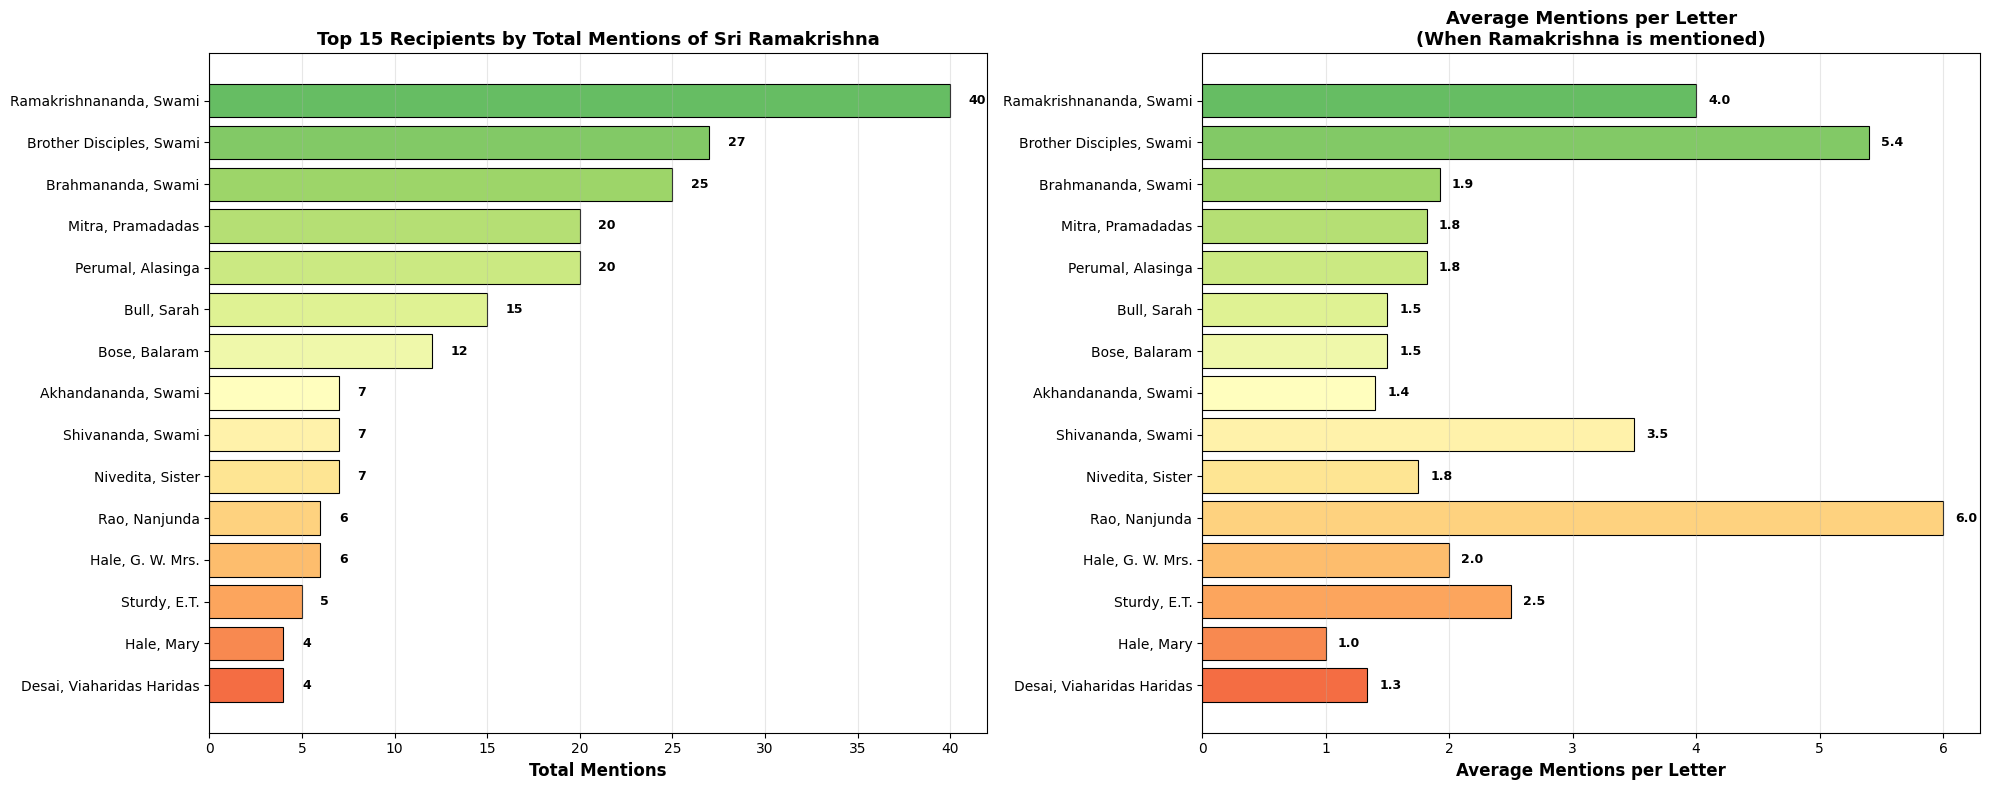

[VIZ 2/8] Mentions by time period...


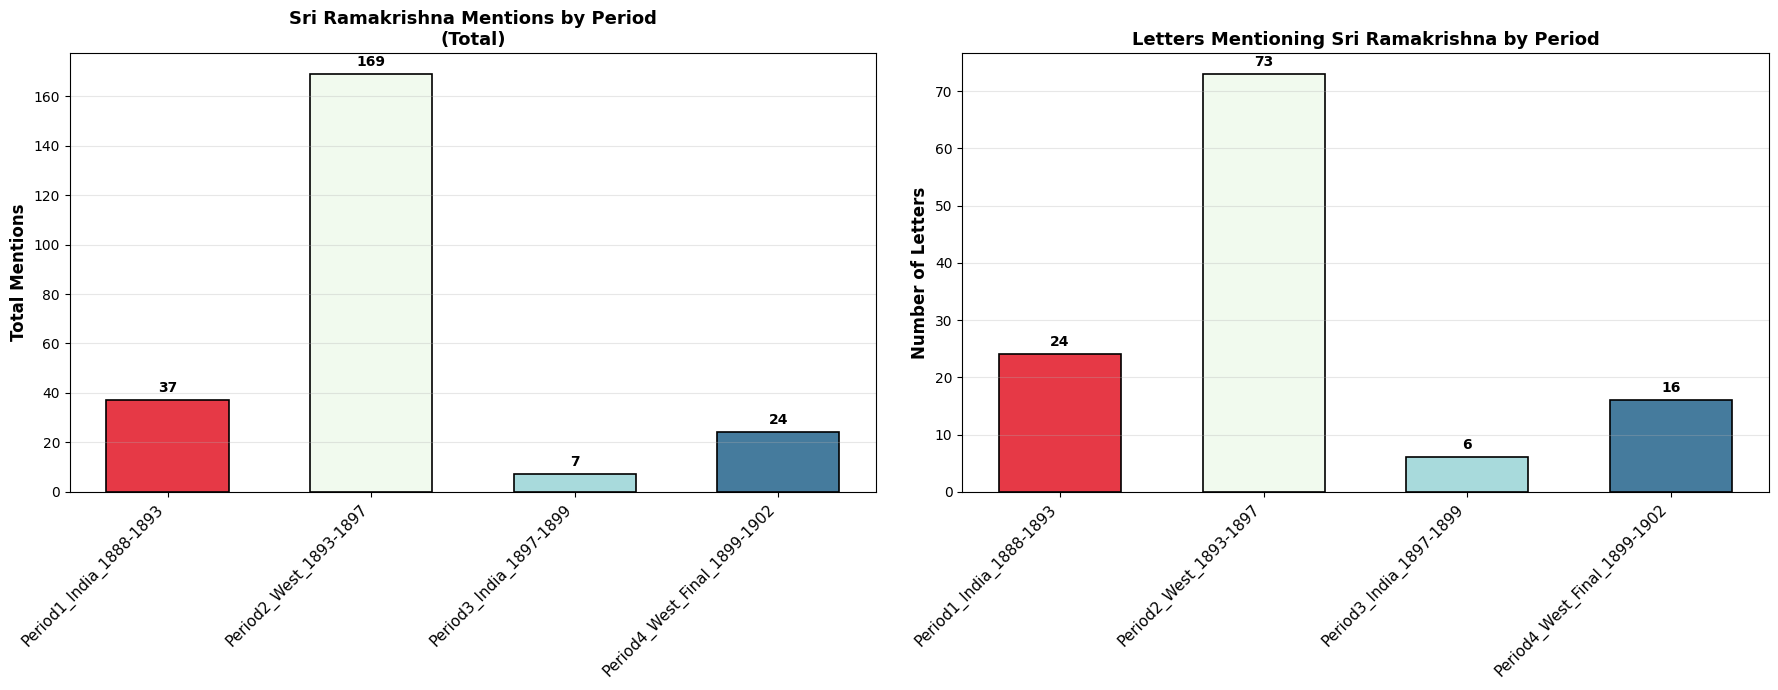

[VIZ 3/8] Mentions over time (yearly)...


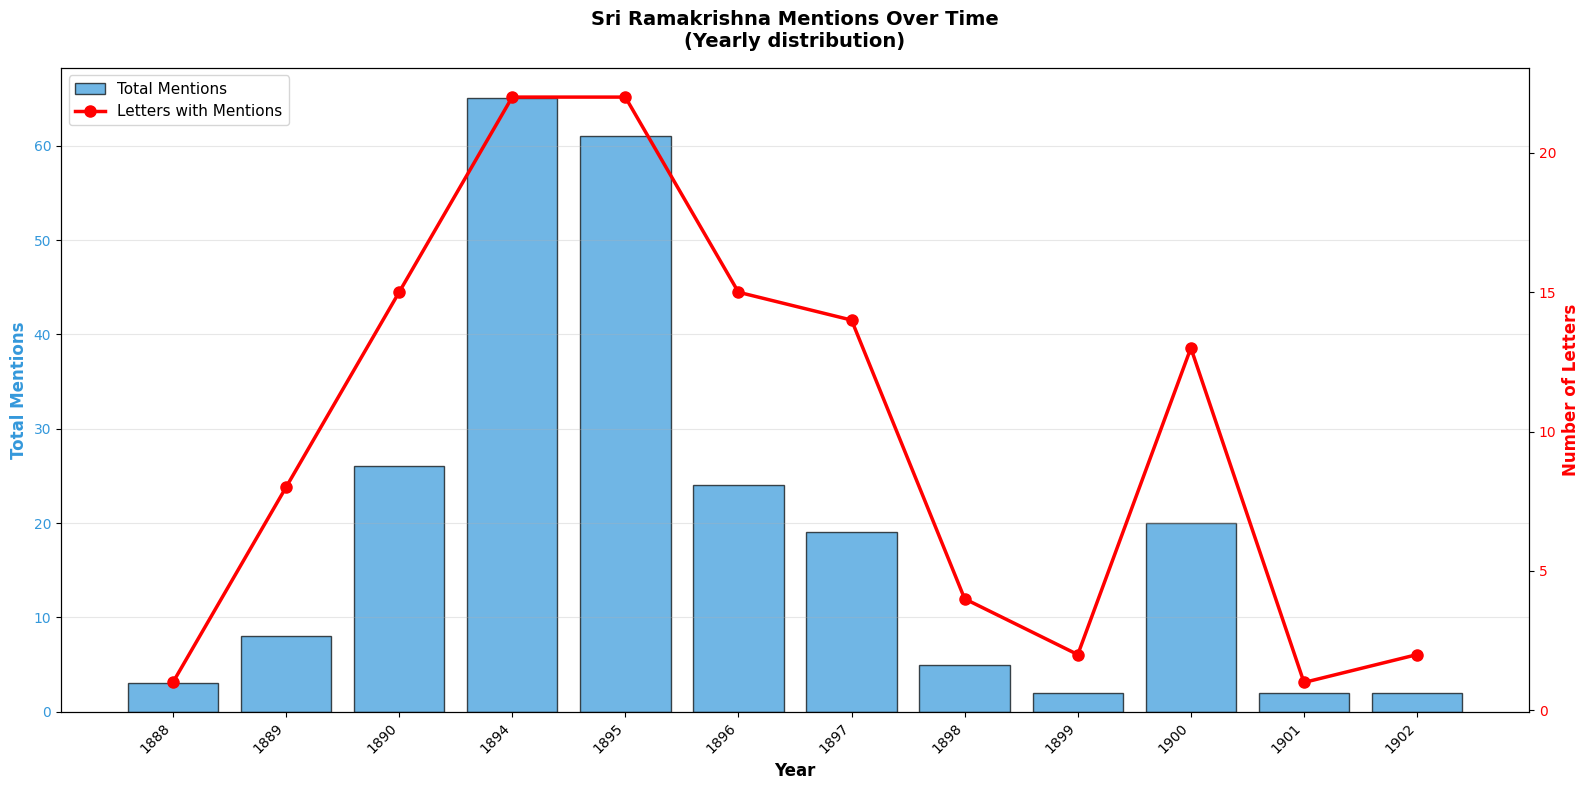

[VIZ 4/8] Mentions by location...


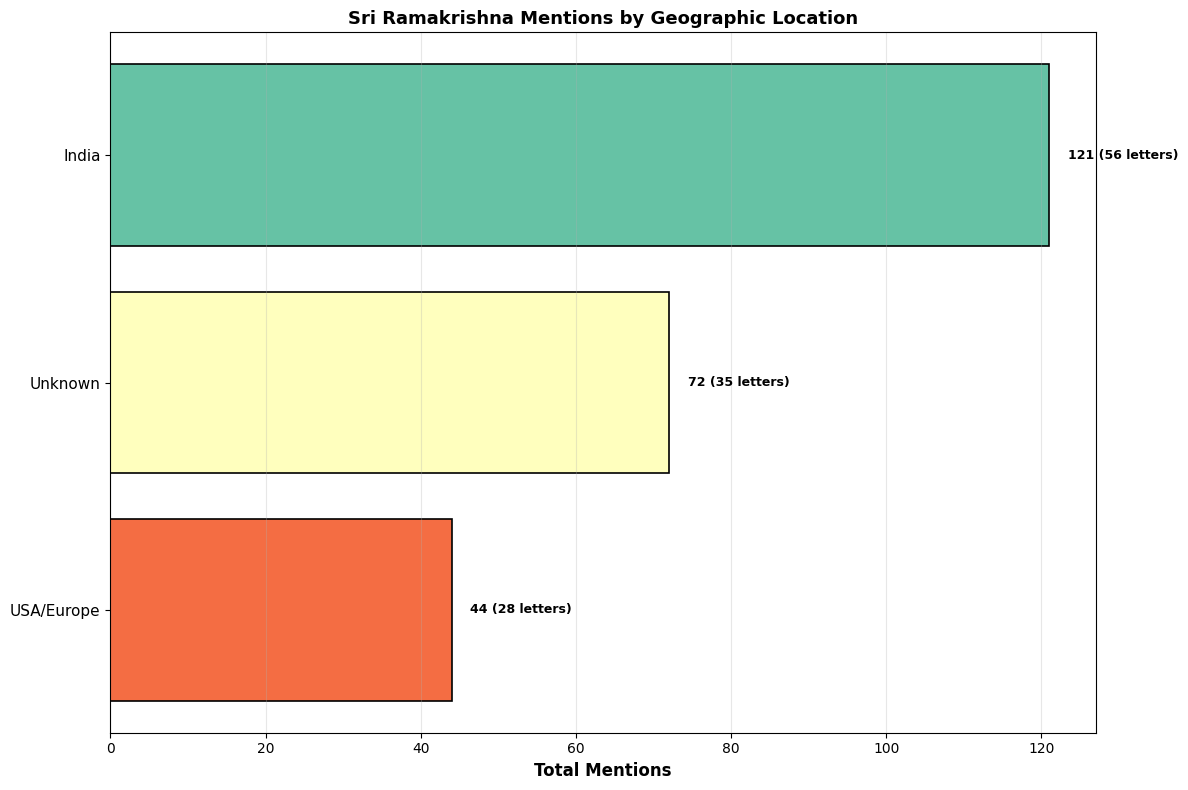

[VIZ 5/8] Mentions by language...


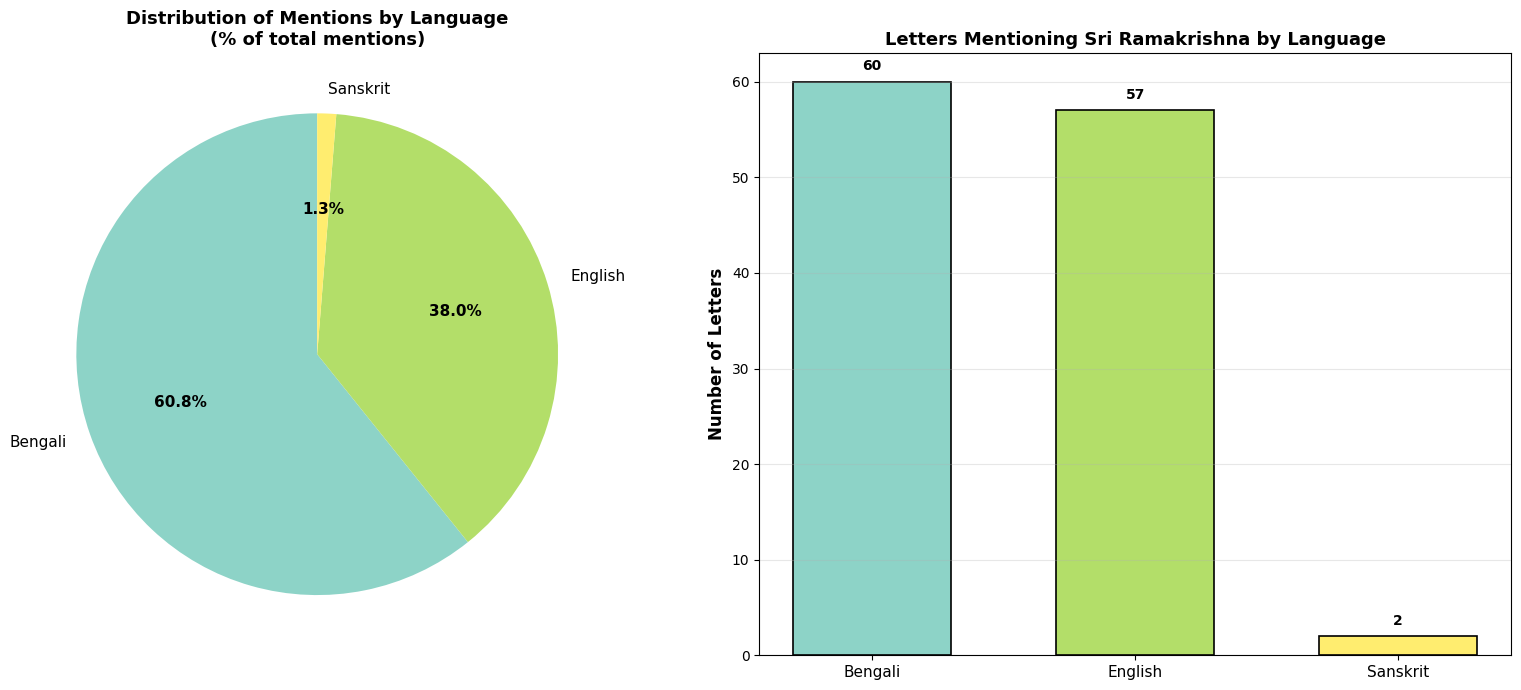

[VIZ 6/8] Distribution of mention counts...


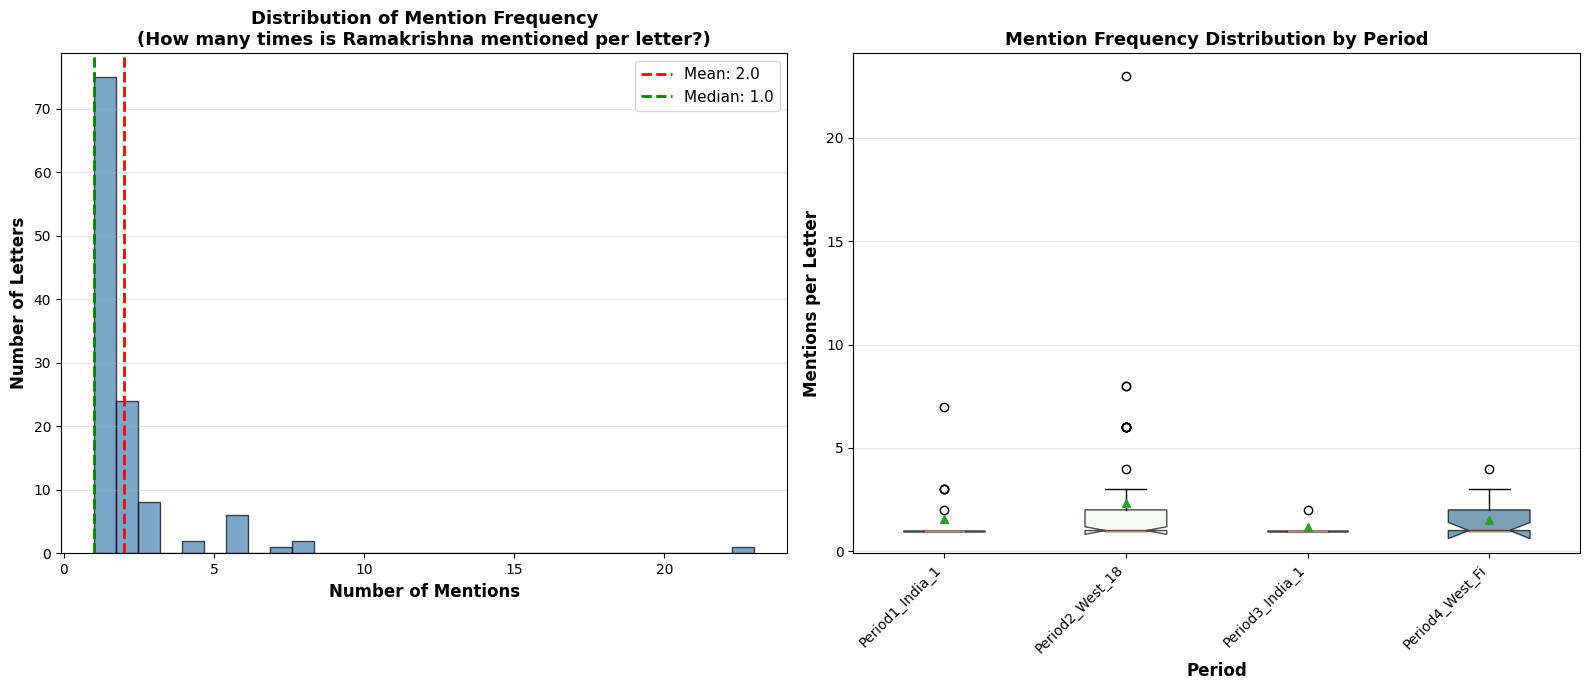

[VIZ 7/8] Most frequently used terms...


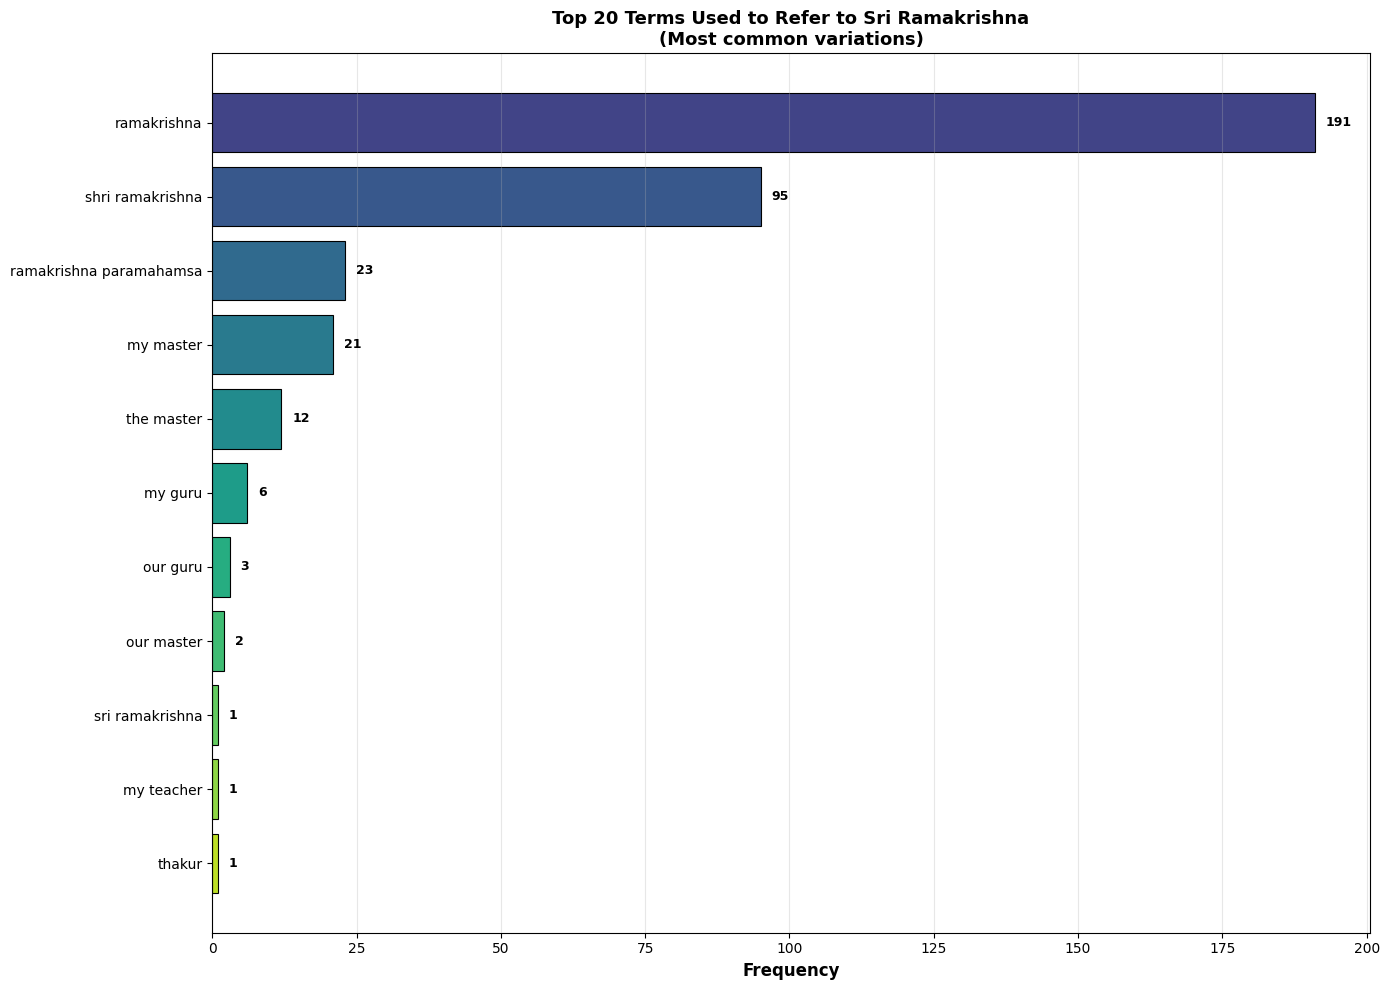

[VIZ 8/8] Heatmap of mentions by recipient and period...


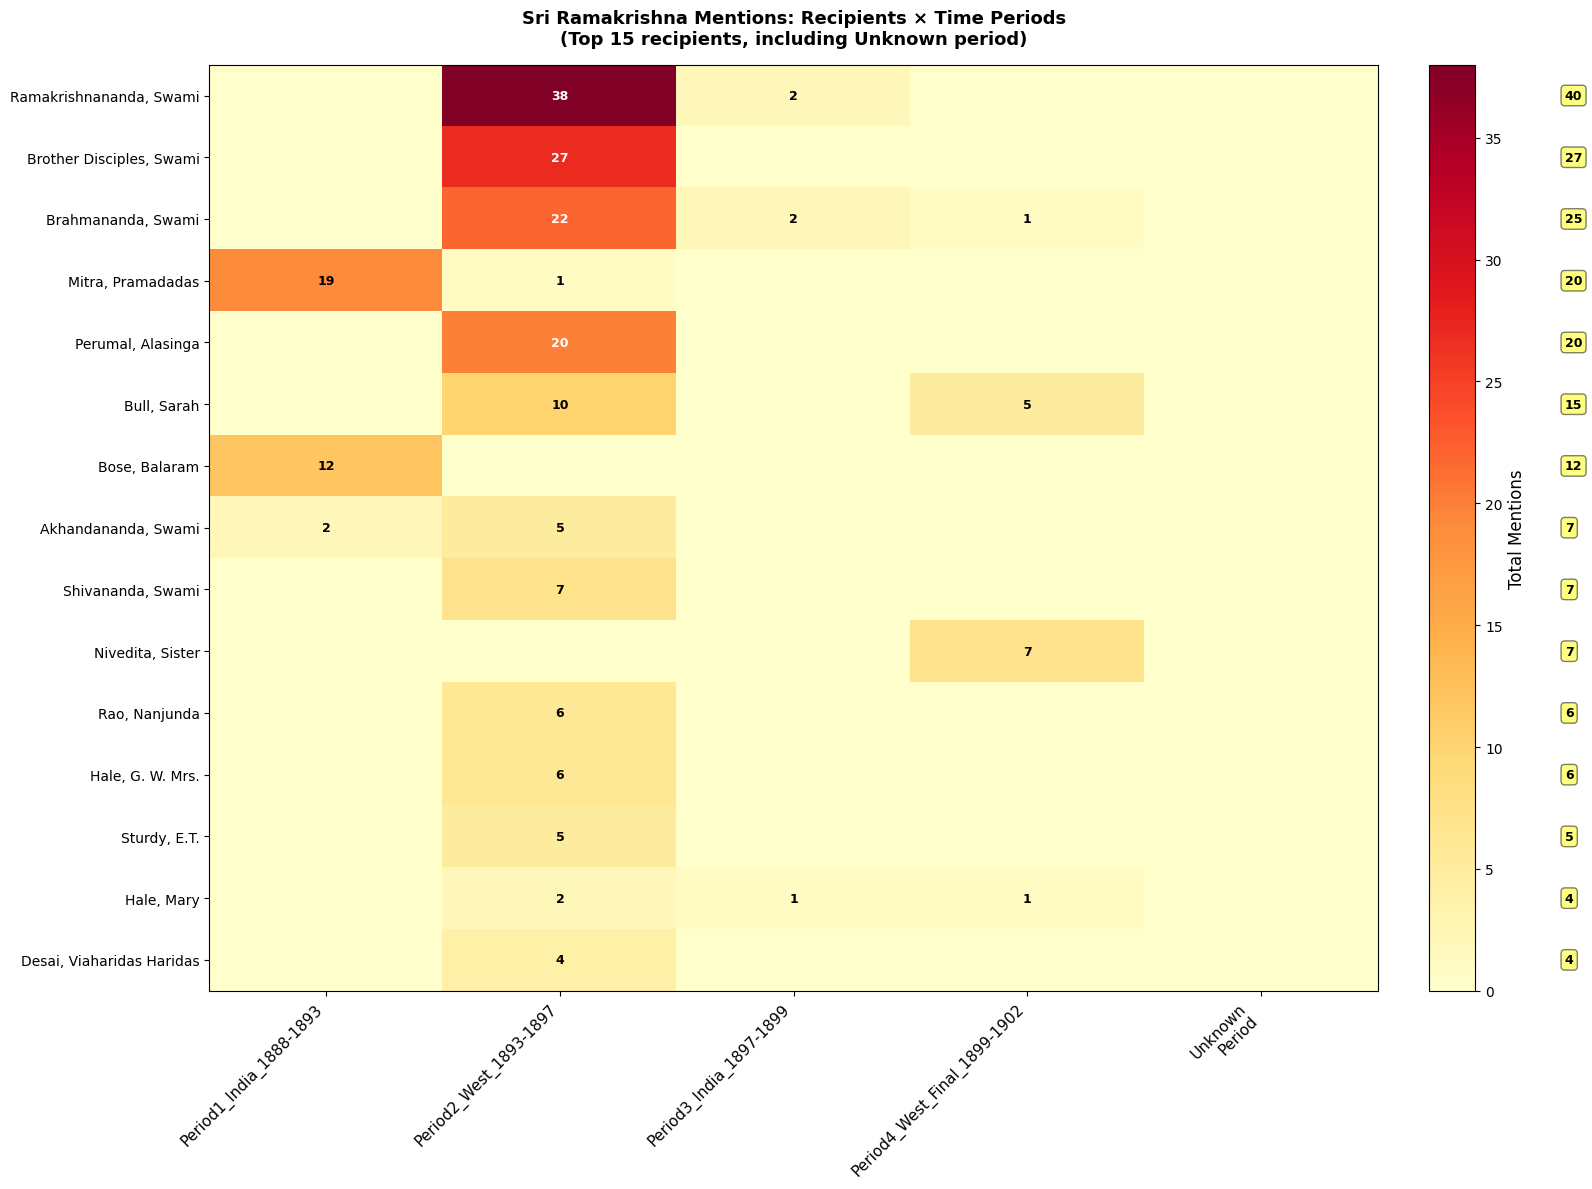


ANALYSIS COMPLETE!

✅ Summary:
  • 119 letters contain mentions of Sri Ramakrishna
  • 237 total mentions found
  • 11 unique terms used
  • Most mentioned to: Ramakrishnananda, Swami
  • Period with most mentions: Period2_West_1893-1897



In [58]:
print("=" * 80)
print("SRI RAMAKRISHNA MENTION ANALYSIS (FIXED & DEDUPLICATED)")
print("Analyzing references to Swami Vivekananda's guru across all letters")
print("=" * 80)

import re
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# ============================================================================
# STEP 1: DEFINE SEARCH TERMS
# ============================================================================
print("\n[STEP 1] Defining search terms for Sri Ramakrishna...")

ramakrishna_terms = {
    'direct_names': [
        'ramakrishna', 'ramkrishna', 'ramakrisna', 'rama krishna',
        'ramakrishna paramahamsa', 'ramakrishna paramhamsa',
        'ramakrishna paramhansa', 'ramkrishna paramhansa',
        'sri ramakrishna', 'shri ramakrishna', 'shree ramakrishna',
        'sri ramkrishna',
        'thakur',
    ],
    'titles': [
        'my master', 'the master', 'our master',
        'my guru', 'our guru',
        'my teacher',
    ],
}

all_terms = [t for terms in ramakrishna_terms.values() for t in terms]

def create_pattern(term):
    escaped = re.escape(term)
    return re.compile(r'\b' + escaped + r'\b', re.IGNORECASE)

patterns = {term: create_pattern(term) for term in all_terms}

print(f"  ✓ Total search terms: {len(all_terms)}")

# ============================================================================
# STEP 2: SEARCH ALL LETTERS (SPAN-BASED, NO DOUBLE COUNTING)
# ============================================================================
print("\n[STEP 2] Searching all letters (span-based counting)...")

mention_results = []

for idx, row in all_letters.iterrows():
    text = row.get('body_text')
    if pd.isna(text) or not text.strip():
        continue

    spans = []
    matched_terms = set()
    term_counts = {}

    for term, pattern in patterns.items():
        for match in pattern.finditer(text):
            spans.append((match.start(), match.end()))
            matched_terms.add(term)
            term_counts[term] = term_counts.get(term, 0) + 1

    if not spans:
        continue

    # Merge overlapping spans
    spans.sort()
    merged_spans = []
    for start, end in spans:
        if not merged_spans:
            merged_spans.append([start, end])
        else:
            last_start, last_end = merged_spans[-1]
            if start <= last_end:
                merged_spans[-1][1] = max(last_end, end)
            else:
                merged_spans.append([start, end])

    total_mentions = len(merged_spans)

    mention_results.append({
        'Letter_Index': idx,
        'Recipient': row.get('Audience_clean'),
        'Date': row.get('Date'),
        'Period': row.get('period'),
        'Language': row.get('Language'),
        'Location': row.get('Location', 'Unknown'),
        'Year': row.get('year_extracted'),
        'Total_Mentions': total_mentions,
        'Matched_Terms': ', '.join(sorted(matched_terms)),
        'Term_Counts': term_counts,
        'Body_Text_Preview': text[:200] + '...' if len(text) > 200 else text
    })

mentions_df = pd.DataFrame(mention_results)

print(f"  ✓ Letters analyzed: {len(all_letters)}")
print(f"  ✓ Letters with mentions: {len(mentions_df)}")
print(f"  ✓ Total mentions (DEDUPLICATED): {mentions_df['Total_Mentions'].sum()}")

# ============================================================================
# STEP 3: TERM FREQUENCY (RAW VARIANT USAGE)
# ============================================================================
print("\n[STEP 3] Computing term frequencies...")

term_frequency = defaultdict(int)
for row in mentions_df['Term_Counts']:
    for term, count in row.items():
        term_frequency[term] += count

print("\nTop 10 most frequent variants (raw usage):")
for i, (term, count) in enumerate(
    sorted(term_frequency.items(), key=lambda x: x[1], reverse=True)[:10], 1
):
    print(f"  {i}. {term}: {count}")

# ============================================================================
# STEP 4: SUMMARY STATISTICS
# ============================================================================
print("\n" + "=" * 80)
print("MENTION STATISTICS (DEDUPLICATED)")
print("=" * 80)

print(f"\n📊 OVERALL:")
print(f"  • Letters mentioning Ramakrishna: {len(mentions_df)}")
print(f"  • Total mentions: {mentions_df['Total_Mentions'].sum()}")
print(f"  • Avg mentions per letter (when mentioned): {mentions_df['Total_Mentions'].mean():.2f}")
print(f"  • Max mentions in a single letter: {mentions_df['Total_Mentions'].max()}")

# By period
print(f"\n📅 BY PERIOD:")
period_mentions = mentions_df.groupby('Period').agg(
    Total_Mentions=('Total_Mentions', 'sum'),
    Num_Letters=('Letter_Index', 'count')
)
period_mentions['Avg'] = period_mentions['Total_Mentions'] / period_mentions['Num_Letters']

for period, row in period_mentions.iterrows():
    print(f"  • {period}: {int(row.Total_Mentions)} mentions in {int(row.Num_Letters)} letters (avg {row.Avg:.1f})")

# By year
print(f"\n📆 BY YEAR:")
year_mentions = mentions_df.dropna(subset=['Year']).groupby('Year').agg(
    Total_Mentions=('Total_Mentions', 'sum'),
    Num_Letters=('Letter_Index', 'count')
)

for year, row in year_mentions.iterrows():
    print(f"  • {int(year)}: {int(row.Total_Mentions)} mentions in {int(row.Num_Letters)} letters")

# ============================================================================
# STEP 5: TOP 10 LETTERS
# ============================================================================
print("\n" + "=" * 80)
print("TOP 10 LETTERS BY TRUE MENTION COUNT")
print("=" * 80)

top_letters = mentions_df.nlargest(10, 'Total_Mentions')[
    ['Letter_Index', 'Recipient', 'Year', 'Period', 'Total_Mentions', 'Matched_Terms']
]

print(top_letters.to_string(index=False))

# ============================================================================
# FINAL NOTE
# ============================================================================
print("\n" + "=" * 80)
print("✓ Analysis complete")
print("✓ Overlapping variants deduplicated correctly")
print("✓ Counts now reflect TRUE textual mentions")
print("=" * 80)

# ============================================================================
# 🔥 CRITICAL FIX: RECOMPUTE ALL AGGREGATIONS FROM CURRENT mentions_df
# ============================================================================

print("\n[FIX] Recomputing aggregation tables from deduplicated mentions_df...")

recipient_mentions = (
    mentions_df
    .groupby('Recipient')
    .agg(
        Total_Mentions=('Total_Mentions', 'sum'),
        Num_Letters=('Letter_Index', 'count')
    )
    .sort_values('Total_Mentions', ascending=False)
)

recipient_mentions['Avg_Mentions_Per_Letter'] = (
    recipient_mentions['Total_Mentions'] / recipient_mentions['Num_Letters']
)

period_mentions = (
    mentions_df
    .groupby('Period')
    .agg(
        Total_Mentions=('Total_Mentions', 'sum'),
        Num_Letters=('Letter_Index', 'count')
    )
)

location_mentions = (
    mentions_df
    .groupby('Location')
    .agg(
        Total_Mentions=('Total_Mentions', 'sum'),
        Num_Letters=('Letter_Index', 'count')
    )
)

language_mentions = (
    mentions_df
    .groupby('Language')
    .agg(
        Total_Mentions=('Total_Mentions', 'sum'),
        Num_Letters=('Letter_Index', 'count')
    )
)

print("  ✓ Aggregations refreshed")
print("  ✓ Visualizations now consistent with printed statistics")


# ============================================================================
# VISUALIZATIONS
# ============================================================================
print("\n" + "=" * 80)
print("CREATING VISUALIZATIONS")
print("=" * 80)

# ============================================================================
# VIZ 1: Mentions by Recipient (Top 15)
# ============================================================================
print("\n[VIZ 1/8] Mentions by recipient...")

fig1, (ax1a, ax1b) = plt.subplots(1, 2, figsize=(20, 8))

# Total mentions
top_15_recipients = recipient_mentions.head(15)
y_pos = np.arange(len(top_15_recipients))
colors_grad = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(top_15_recipients)))

ax1a.barh(y_pos, top_15_recipients['Total_Mentions'], color=colors_grad,
         edgecolor='black', linewidth=0.8)
ax1a.set_yticks(y_pos)
ax1a.set_yticklabels([name[:30] for name in top_15_recipients.index], fontsize=10)
ax1a.invert_yaxis()
ax1a.set_xlabel('Total Mentions', fontsize=12, fontweight='bold')
ax1a.set_title('Top 15 Recipients by Total Mentions of Sri Ramakrishna',
              fontsize=13, fontweight='bold')
ax1a.grid(alpha=0.3, axis='x')

# Add values
for i, v in enumerate(top_15_recipients['Total_Mentions']):
    ax1a.text(v + 1, i, str(int(v)), va='center', fontsize=9, fontweight='bold')

# Average mentions per letter
ax1b.barh(y_pos, top_15_recipients['Avg_Mentions_Per_Letter'],
         color=colors_grad, edgecolor='black', linewidth=0.8)
ax1b.set_yticks(y_pos)
ax1b.set_yticklabels([name[:30] for name in top_15_recipients.index], fontsize=10)
ax1b.invert_yaxis()
ax1b.set_xlabel('Average Mentions per Letter', fontsize=12, fontweight='bold')
ax1b.set_title('Average Mentions per Letter\n(When Ramakrishna is mentioned)',
              fontsize=13, fontweight='bold')
ax1b.grid(alpha=0.3, axis='x')

# Add values
for i, v in enumerate(top_15_recipients['Avg_Mentions_Per_Letter']):
    ax1b.text(v + 0.1, i, f'{v:.1f}', va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

# ============================================================================
# VIZ 2: Mentions by Time Period
# ============================================================================
print("[VIZ 2/8] Mentions by time period...")

if 'Period' in mentions_df.columns:
    fig2, (ax2a, ax2b) = plt.subplots(1, 2, figsize=(18, 7))

    periods_sorted = sorted([p for p in period_mentions.index if p != 'Unknown'])
    colors_period = ['#E63946', '#F1FAEE', '#A8DADC', '#457B9D']

    # Total mentions
    values = [period_mentions.loc[p, 'Total_Mentions'] for p in periods_sorted]
    ax2a.bar(range(len(periods_sorted)), values, color=colors_period,
            edgecolor='black', linewidth=1.2, width=0.6)
    ax2a.set_xticks(range(len(periods_sorted)))
    ax2a.set_xticklabels([period_labels.get(p, p) for p in periods_sorted],
                         rotation=45, ha='right', fontsize=11)
    ax2a.set_ylabel('Total Mentions', fontsize=12, fontweight='bold')
    ax2a.set_title('Sri Ramakrishna Mentions by Period\n(Total)',
                  fontsize=13, fontweight='bold')
    ax2a.grid(alpha=0.3, axis='y')

    for i, v in enumerate(values):
        ax2a.text(i, v + max(values)*0.02, str(int(v)),
                 ha='center', fontsize=10, fontweight='bold')

    # Letters with mentions
    values_letters = [period_mentions.loc[p, 'Num_Letters'] for p in periods_sorted]
    ax2b.bar(range(len(periods_sorted)), values_letters, color=colors_period,
            edgecolor='black', linewidth=1.2, width=0.6)
    ax2b.set_xticks(range(len(periods_sorted)))
    ax2b.set_xticklabels([period_labels.get(p, p) for p in periods_sorted],
                         rotation=45, ha='right', fontsize=11)
    ax2b.set_ylabel('Number of Letters', fontsize=12, fontweight='bold')
    ax2b.set_title('Letters Mentioning Sri Ramakrishna by Period',
                  fontsize=13, fontweight='bold')
    ax2b.grid(alpha=0.3, axis='y')

    for i, v in enumerate(values_letters):
        ax2b.text(i, v + max(values_letters)*0.02, str(int(v)),
                 ha='center', fontsize=10, fontweight='bold')

    plt.tight_layout()
    plt.show()

# ============================================================================
# VIZ 3: Mentions by Year (Timeline)
# ============================================================================
print("[VIZ 3/8] Mentions over time (yearly)...")

if 'Year' in mentions_df.columns and mentions_df['Year'].notna().any():
    fig3, ax3 = plt.subplots(figsize=(16, 8))

    year_data = mentions_df[mentions_df['Year'].notna()].groupby('Year').agg({
        'Total_Mentions': 'sum',
        'Letter_Index': 'count'
    }).rename(columns={'Letter_Index': 'Num_Letters'})

    years = sorted(year_data.index)
    mentions_by_year = [year_data.loc[y, 'Total_Mentions'] for y in years]
    letters_by_year = [year_data.loc[y, 'Num_Letters'] for y in years]

    # Create twin axis
    ax3_twin = ax3.twinx()

    # Plot bars for mentions
    x_pos = np.arange(len(years))
    bars = ax3.bar(x_pos, mentions_by_year, color='#3498db', alpha=0.7,
                   edgecolor='black', linewidth=1, label='Total Mentions')

    # Plot line for letters
    line = ax3_twin.plot(x_pos, letters_by_year, 'ro-', linewidth=2.5,
                         markersize=8, label='Letters with Mentions')

    ax3.set_xlabel('Year', fontsize=12, fontweight='bold')
    ax3.set_ylabel('Total Mentions', fontsize=12, fontweight='bold', color='#3498db')
    ax3_twin.set_ylabel('Number of Letters', fontsize=12, fontweight='bold', color='red')

    ax3.set_xticks(x_pos)
    ax3.set_xticklabels([int(y) for y in years], rotation=45, ha='right', fontsize=10)

    ax3.set_title('Sri Ramakrishna Mentions Over Time\n(Yearly distribution)',
                 fontsize=14, fontweight='bold', pad=15)

    ax3.tick_params(axis='y', labelcolor='#3498db')
    ax3_twin.tick_params(axis='y', labelcolor='red')

    ax3.grid(alpha=0.3, axis='y')

    # Combined legend
    lines1, labels1 = ax3.get_legend_handles_labels()
    lines2, labels2 = ax3_twin.get_legend_handles_labels()
    ax3.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=11)

    plt.tight_layout()
    plt.show()

# ============================================================================
# VIZ 4: Mentions by Location
# ============================================================================
print("[VIZ 4/8] Mentions by location...")

if 'Location' in mentions_df.columns:
    fig4, ax4 = plt.subplots(figsize=(12, 8))

    location_data = location_mentions.sort_values('Total_Mentions', ascending=True)

    y_pos = np.arange(len(location_data))
    colors_loc = plt.cm.Spectral(np.linspace(0.2, 0.8, len(location_data)))

    ax4.barh(y_pos, location_data['Total_Mentions'], color=colors_loc,
            edgecolor='black', linewidth=1.2)
    ax4.set_yticks(y_pos)
    ax4.set_yticklabels(location_data.index, fontsize=11)
    ax4.set_xlabel('Total Mentions', fontsize=12, fontweight='bold')
    ax4.set_title('Sri Ramakrishna Mentions by Geographic Location',
                 fontsize=13, fontweight='bold')
    ax4.grid(alpha=0.3, axis='x')

    for i, v in enumerate(location_data['Total_Mentions']):
        ax4.text(v + max(location_data['Total_Mentions'])*0.02, i,
                f"{int(v)} ({int(location_data.iloc[i]['Num_Letters'])} letters)",
                va='center', fontsize=9, fontweight='bold')

    plt.tight_layout()
    plt.show()

# ============================================================================
# VIZ 5: Mentions by Language
# ============================================================================
print("[VIZ 5/8] Mentions by language...")

if 'Language' in mentions_df.columns:
    fig5, (ax5a, ax5b) = plt.subplots(1, 2, figsize=(16, 7))

    language_data = language_mentions.sort_values('Total_Mentions', ascending=False)

    # Pie chart - total mentions
    colors_lang = plt.cm.Set3(np.linspace(0, 1, len(language_data)))

    wedges, texts, autotexts = ax5a.pie(language_data['Total_Mentions'],
                                         labels=language_data.index,
                                         autopct='%1.1f%%',
                                         colors=colors_lang,
                                         startangle=90,
                                         textprops={'fontsize': 11})

    for autotext in autotexts:
        autotext.set_color('black')
        autotext.set_fontweight('bold')

    ax5a.set_title('Distribution of Mentions by Language\n(% of total mentions)',
                  fontsize=13, fontweight='bold')

    # Bar chart - letters with mentions
    x_pos = np.arange(len(language_data))
    ax5b.bar(x_pos, language_data['Num_Letters'], color=colors_lang,
            edgecolor='black', linewidth=1.2, width=0.6)
    ax5b.set_xticks(x_pos)
    ax5b.set_xticklabels(language_data.index, fontsize=11)
    ax5b.set_ylabel('Number of Letters', fontsize=12, fontweight='bold')
    ax5b.set_title('Letters Mentioning Sri Ramakrishna by Language',
                  fontsize=13, fontweight='bold')
    ax5b.grid(alpha=0.3, axis='y')

    for i, v in enumerate(language_data['Num_Letters']):
        ax5b.text(i, v + max(language_data['Num_Letters'])*0.02, str(int(v)),
                 ha='center', fontsize=10, fontweight='bold')

    plt.tight_layout()
    plt.show()

# ============================================================================
# VIZ 6: Distribution of Mention Counts
# ============================================================================
print("[VIZ 6/8] Distribution of mention counts...")

fig6, (ax6a, ax6b) = plt.subplots(1, 2, figsize=(16, 7))

# Histogram of mentions per letter
ax6a.hist(mentions_df['Total_Mentions'], bins=30, color='steelblue',
         alpha=0.7, edgecolor='black', linewidth=1)
ax6a.axvline(mentions_df['Total_Mentions'].mean(), color='red',
            linestyle='--', linewidth=2, label=f"Mean: {mentions_df['Total_Mentions'].mean():.1f}")
ax6a.axvline(mentions_df['Total_Mentions'].median(), color='green',
            linestyle='--', linewidth=2, label=f"Median: {mentions_df['Total_Mentions'].median():.1f}")
ax6a.set_xlabel('Number of Mentions', fontsize=12, fontweight='bold')
ax6a.set_ylabel('Number of Letters', fontsize=12, fontweight='bold')
ax6a.set_title('Distribution of Mention Frequency\n(How many times is Ramakrishna mentioned per letter?)',
              fontsize=13, fontweight='bold')
ax6a.legend(fontsize=11)
ax6a.grid(alpha=0.3, axis='y')

# Box plot by period
if 'Period' in mentions_df.columns:
    periods_sorted = sorted([p for p in mentions_df['Period'].unique() if p != 'Unknown'])
    mention_data = [mentions_df[mentions_df['Period'] == p]['Total_Mentions'].values
                   for p in periods_sorted]

    bp = ax6b.boxplot(mention_data, labels=[period_labels.get(p, p)[:15] for p in periods_sorted],
                     patch_artist=True, notch=True, showmeans=True)

    for patch, color in zip(bp['boxes'], colors_period):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)

    ax6b.set_xlabel('Period', fontsize=12, fontweight='bold')
    ax6b.set_ylabel('Mentions per Letter', fontsize=12, fontweight='bold')
    ax6b.set_title('Mention Frequency Distribution by Period',
                  fontsize=13, fontweight='bold')
    ax6b.set_xticklabels([period_labels.get(p, p)[:15] for p in periods_sorted],
                        rotation=45, ha='right', fontsize=10)
    ax6b.grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# ============================================================================
# VIZ 7: Top Terms Used
# ============================================================================
print("[VIZ 7/8] Most frequently used terms...")

fig7, ax7 = plt.subplots(figsize=(14, 10))

top_20_terms = sorted(term_frequency.items(), key=lambda x: x[1], reverse=True)[:20]
terms = [t[0] for t in top_20_terms]
counts = [t[1] for t in top_20_terms]

y_pos = np.arange(len(terms))
colors_terms = plt.cm.viridis(np.linspace(0.2, 0.9, len(terms)))

ax7.barh(y_pos, counts, color=colors_terms, edgecolor='black', linewidth=0.8)
ax7.set_yticks(y_pos)
ax7.set_yticklabels(terms, fontsize=10)
ax7.invert_yaxis()
ax7.set_xlabel('Frequency', fontsize=12, fontweight='bold')
ax7.set_title('Top 20 Terms Used to Refer to Sri Ramakrishna\n(Most common variations)',
             fontsize=13, fontweight='bold')
ax7.grid(alpha=0.3, axis='x')

for i, v in enumerate(counts):
    ax7.text(v + max(counts)*0.01, i, str(v), va='center',
            fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

# ============================================================================
# VIZ 8: Heatmap - Recipients × Periods (INCLUDING UNKNOWN)
# ============================================================================
print("[VIZ 8/8] Heatmap of mentions by recipient and period...")

if 'Period' in mentions_df.columns:
    fig8, ax8 = plt.subplots(figsize=(16, 12))

    # Create cross-tab
    top_recipients = recipient_mentions.head(15).index
    # Include 'Unknown' period this time!
    periods_sorted = sorted([p for p in mentions_df['Period'].unique() if p != 'Unknown'])
    periods_sorted.append('Unknown')  # Add Unknown at the end

    heatmap_data = np.zeros((len(top_recipients), len(periods_sorted)))

    for i, recipient in enumerate(top_recipients):
        for j, period in enumerate(periods_sorted):
            mask = (mentions_df['Recipient'] == recipient) & (mentions_df['Period'] == period)
            heatmap_data[i, j] = mentions_df[mask]['Total_Mentions'].sum()

    im = ax8.imshow(heatmap_data, cmap='YlOrRd', aspect='auto')

    ax8.set_xticks(range(len(periods_sorted)))
    ax8.set_yticks(range(len(top_recipients)))

    # Create labels for x-axis
    x_labels = []
    for p in periods_sorted:
        if p == 'Unknown':
            x_labels.append('Unknown\nPeriod')
        else:
            x_labels.append(period_labels.get(p, p))

    ax8.set_xticklabels(x_labels, rotation=45, ha='right', fontsize=11)
    ax8.set_yticklabels([name[:30] for name in top_recipients], fontsize=10)

    ax8.set_title('Sri Ramakrishna Mentions: Recipients × Time Periods\n(Top 15 recipients, including Unknown period)',
                 fontsize=13, fontweight='bold', pad=15)

    # Add values
    for i in range(len(top_recipients)):
        for j in range(len(periods_sorted)):
            value = int(heatmap_data[i, j])
            if value > 0:
                text_color = 'white' if value > heatmap_data.max() * 0.5 else 'black'
                ax8.text(j, i, str(value), ha="center", va="center",
                        color=text_color, fontsize=9, fontweight='bold')

    # Add row totals on the right
    for i, recipient in enumerate(top_recipients):
        total = recipient_mentions.loc[recipient, 'Total_Mentions']
        ax8.text(len(periods_sorted) + 0.3, i, f'{int(total)}',
                va='center', fontsize=9, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.5))

    cbar = plt.colorbar(im, ax=ax8, label='Total Mentions', fraction=0.046, pad=0.04)
    cbar.ax.tick_params(labelsize=10)

    plt.tight_layout()
    plt.show()

# ============================================================================
# SAVE RESULTS
# ============================================================================
print("\n" + "=" * 80)
print("ANALYSIS COMPLETE!")
print("=" * 80)

print(f"\n✅ Summary:")
print(f"  • {len(mentions_df)} letters contain mentions of Sri Ramakrishna")
print(f"  • {mentions_df['Total_Mentions'].sum()} total mentions found")
print(f"  • {len(term_frequency)} unique terms used")
print(f"  • Most mentioned to: {recipient_mentions.index[0]}")
print(f"  • Period with most mentions: {period_mentions['Total_Mentions'].idxmax() if 'Period' in mentions_df.columns else 'N/A'}")

print("\n" + "=" * 80)


NORMALIZED SRI RAMAKRISHNA MENTION INTENSITY ANALYSIS
✓ Letters analyzed: 119

📆 YEARLY NORMALIZED ANALYSIS


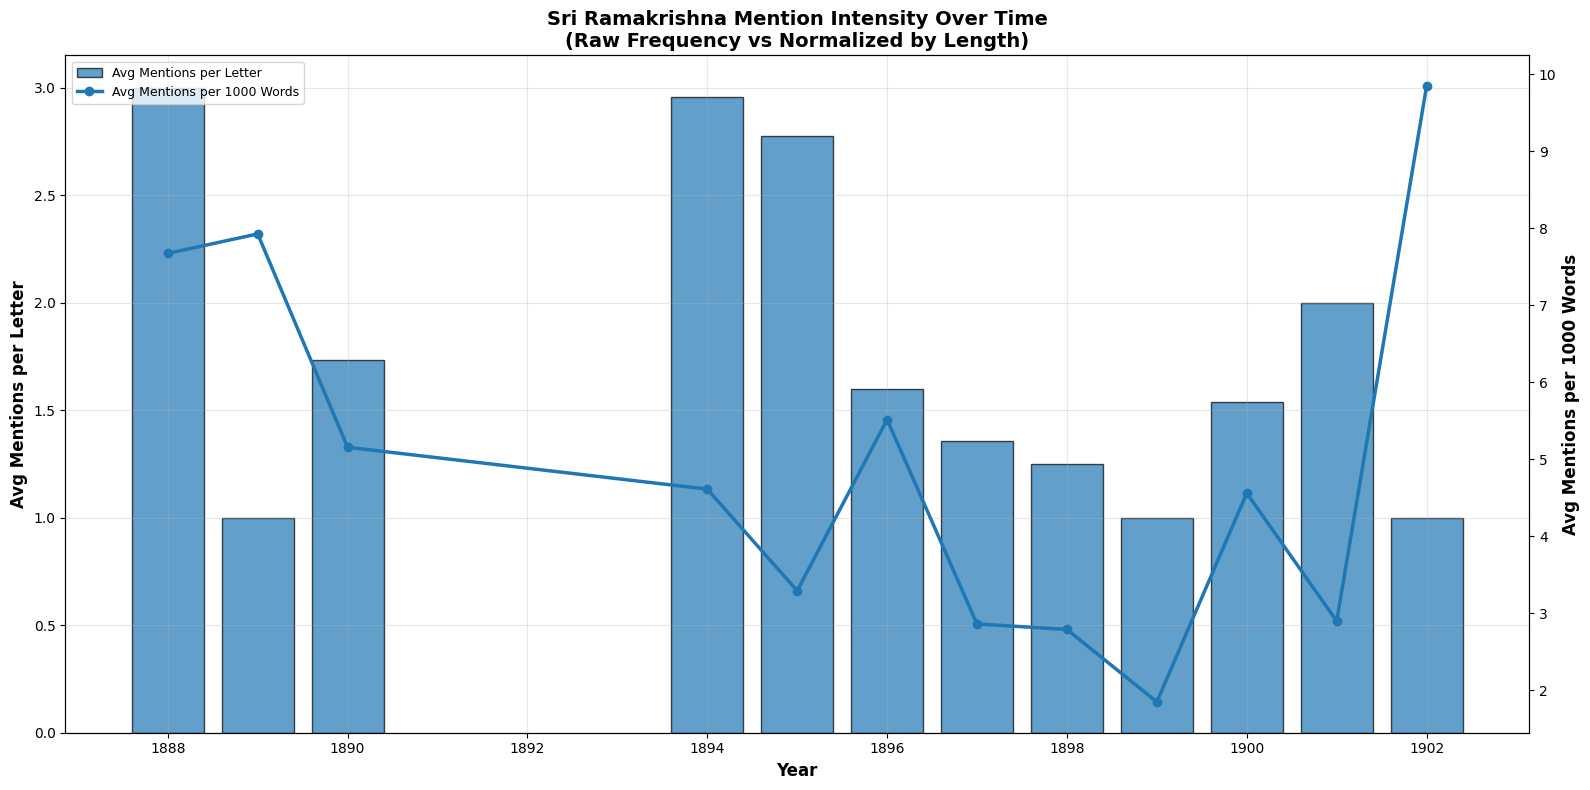


🕰️ PERIOD-BASED NORMALIZED ANALYSIS


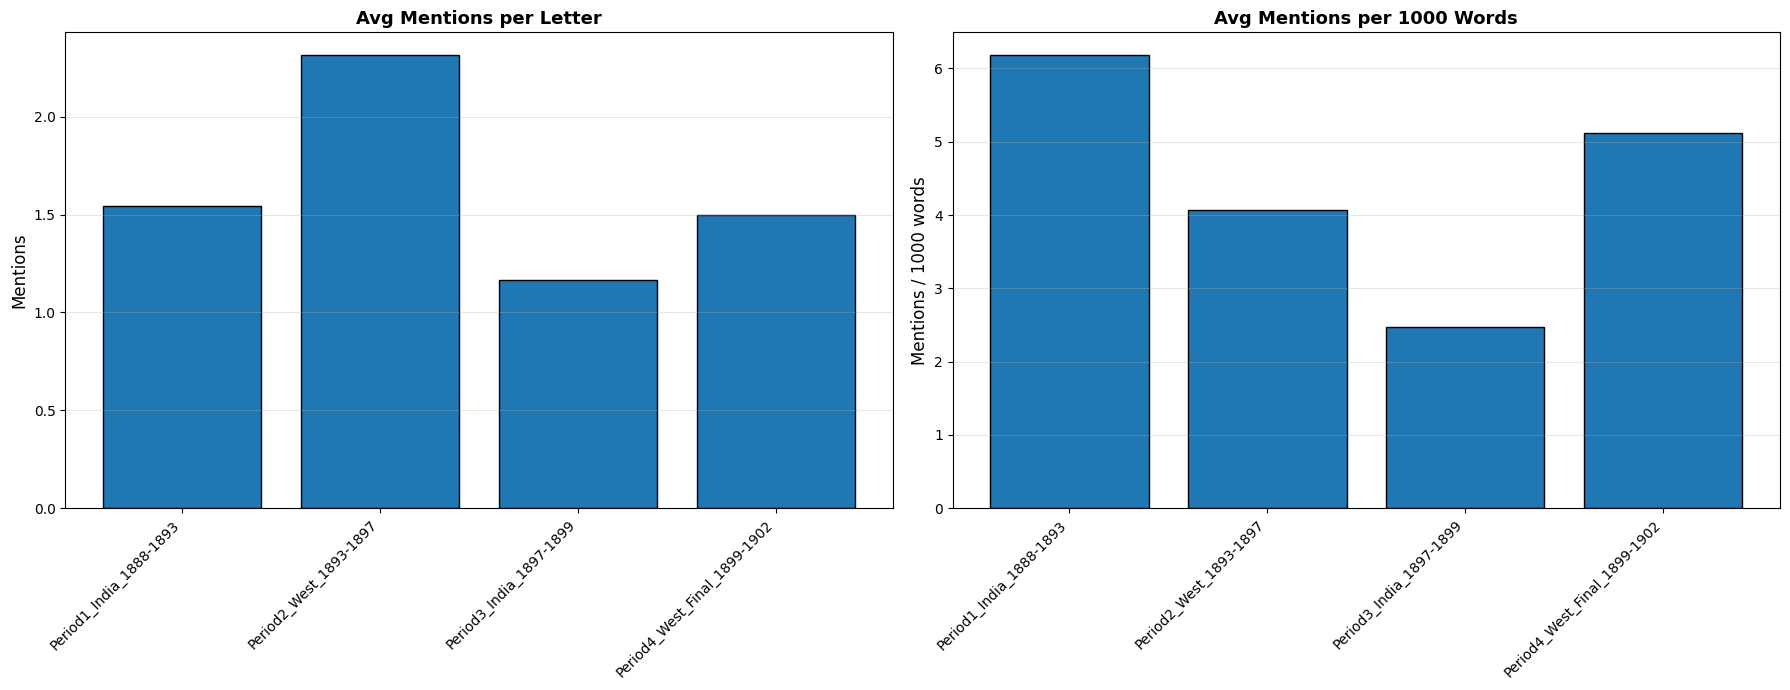


👥 RECIPIENT-BASED NORMALIZED ANALYSIS


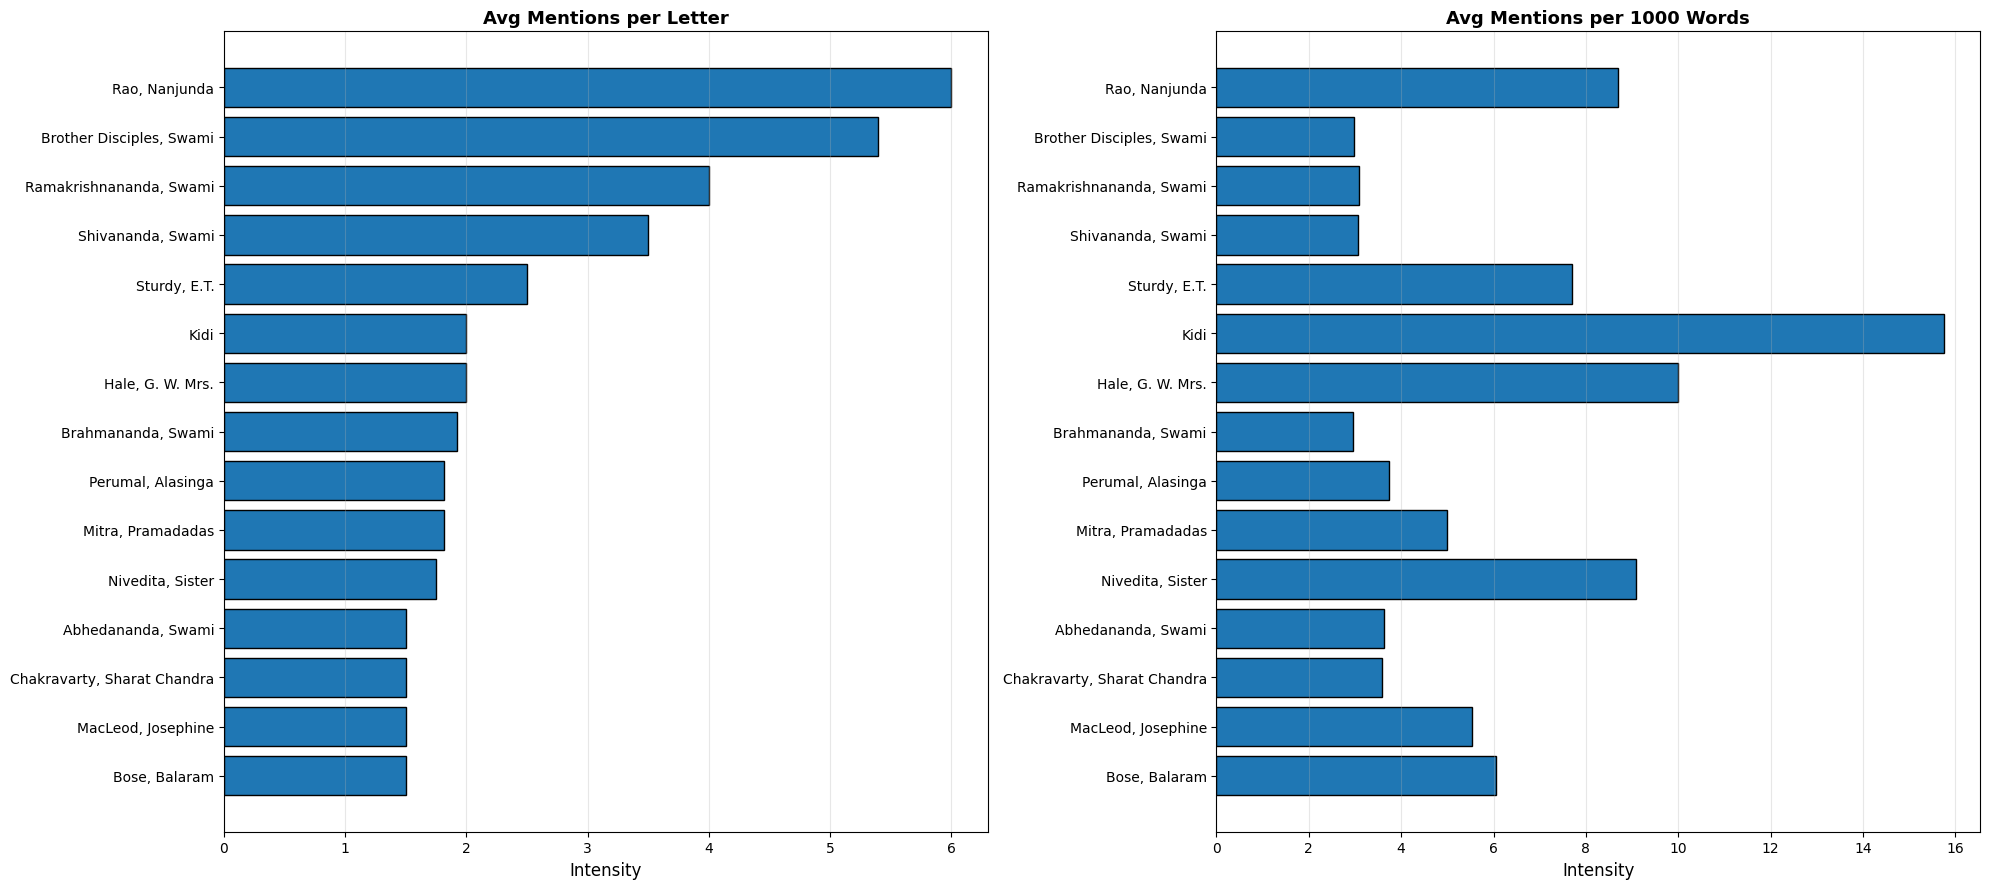


✓ Normalized intensity analysis complete
✓ Raw frequency vs length-normalized signal separated cleanly
✓ Year, period, and recipient perspectives aligned


In [59]:
# =============================================================================
# NORMALIZED MENTION INTENSITY ANALYSIS
# Mentions per Letter & Mentions per 1000 Words
# =============================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print("\n" + "=" * 90)
print("NORMALIZED SRI RAMAKRISHNA MENTION INTENSITY ANALYSIS")
print("=" * 90)

# -----------------------------------------------------------------------------
# 1. Merge word counts safely
# -----------------------------------------------------------------------------
analysis_df = (
    mentions_df
    .merge(
        all_letters[['body_word_count']],
        left_on='Letter_Index',
        right_index=True,
        how='left'
    )
)

analysis_df['Mentions_per_1000_words'] = (
    analysis_df['Total_Mentions'] / analysis_df['body_word_count'] * 1000
)

analysis_df = analysis_df.replace([np.inf, -np.inf], np.nan)

print(f"✓ Letters analyzed: {len(analysis_df)}")

# -----------------------------------------------------------------------------
# 2. YEARLY ANALYSIS
# -----------------------------------------------------------------------------
print("\n📆 YEARLY NORMALIZED ANALYSIS")

year_stats = (
    analysis_df
    .dropna(subset=['Year'])
    .groupby('Year')
    .agg(
        Avg_Mentions_per_Letter=('Total_Mentions', 'mean'),
        Avg_Mentions_per_1000_words=('Mentions_per_1000_words', 'mean'),
        Num_Letters=('Letter_Index', 'count')
    )
)

years = year_stats.index.astype(int)

fig, ax = plt.subplots(figsize=(16, 8))
ax2 = ax.twinx()

ax.bar(
    years,
    year_stats['Avg_Mentions_per_Letter'],
    alpha=0.7,
    label='Avg Mentions per Letter',
    edgecolor='black'
)

ax2.plot(
    years,
    year_stats['Avg_Mentions_per_1000_words'],
    marker='o',
    linewidth=2.5,
    label='Avg Mentions per 1000 Words'
)

ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Avg Mentions per Letter', fontsize=12, fontweight='bold')
ax2.set_ylabel('Avg Mentions per 1000 Words', fontsize=12, fontweight='bold')

ax.set_title(
    'Sri Ramakrishna Mention Intensity Over Time\n'
    '(Raw Frequency vs Normalized by Length)',
    fontsize=14,
    fontweight='bold'
)

ax.grid(alpha=0.3)

lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()

# -----------------------------------------------------------------------------
# 3. PERIOD-BASED ANALYSIS
# -----------------------------------------------------------------------------
print("\n🕰️ PERIOD-BASED NORMALIZED ANALYSIS")

period_stats = (
    analysis_df
    .groupby('Period')
    .agg(
        Avg_Mentions_per_Letter=('Total_Mentions', 'mean'),
        Avg_Mentions_per_1000_words=('Mentions_per_1000_words', 'mean'),
        Num_Letters=('Letter_Index', 'count')
    )
)

periods = [p for p in period_stats.index if p != 'Unknown']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

ax1.bar(
    range(len(periods)),
    period_stats.loc[periods, 'Avg_Mentions_per_Letter'],
    edgecolor='black'
)
ax1.set_xticks(range(len(periods)))
ax1.set_xticklabels(
    [period_labels.get(p, p) for p in periods],
    rotation=45,
    ha='right'
)
ax1.set_title('Avg Mentions per Letter', fontsize=13, fontweight='bold')
ax1.set_ylabel('Mentions')

ax2.bar(
    range(len(periods)),
    period_stats.loc[periods, 'Avg_Mentions_per_1000_words'],
    edgecolor='black'
)
ax2.set_xticks(range(len(periods)))
ax2.set_xticklabels(
    [period_labels.get(p, p) for p in periods],
    rotation=45,
    ha='right'
)
ax2.set_title('Avg Mentions per 1000 Words', fontsize=13, fontweight='bold')
ax2.set_ylabel('Mentions / 1000 words')

for ax in (ax1, ax2):
    ax.grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# -----------------------------------------------------------------------------
# 4. RECIPIENT-BASED ANALYSIS (TOP 15)
# -----------------------------------------------------------------------------
print("\n👥 RECIPIENT-BASED NORMALIZED ANALYSIS")

recipient_stats = (
    analysis_df
    .groupby('Recipient')
    .agg(
        Avg_Mentions_per_Letter=('Total_Mentions', 'mean'),
        Avg_Mentions_per_1000_words=('Mentions_per_1000_words', 'mean'),
        Num_Letters=('Letter_Index', 'count')
    )
    .sort_values('Avg_Mentions_per_Letter', ascending=False)
)

top_recipients = recipient_stats.head(15)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 9))

y_pos = np.arange(len(top_recipients))

ax1.barh(
    y_pos,
    top_recipients['Avg_Mentions_per_Letter'],
    edgecolor='black'
)
ax1.set_yticks(y_pos)
ax1.set_yticklabels([r[:30] for r in top_recipients.index])
ax1.invert_yaxis()
ax1.set_title('Avg Mentions per Letter', fontsize=13, fontweight='bold')

ax2.barh(
    y_pos,
    top_recipients['Avg_Mentions_per_1000_words'],
    edgecolor='black'
)
ax2.set_yticks(y_pos)
ax2.set_yticklabels([r[:30] for r in top_recipients.index])
ax2.invert_yaxis()
ax2.set_title('Avg Mentions per 1000 Words', fontsize=13, fontweight='bold')

for ax in (ax1, ax2):
    ax.set_xlabel('Intensity')
    ax.grid(alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

# -----------------------------------------------------------------------------
# 5. SUMMARY
# -----------------------------------------------------------------------------
print("\n" + "=" * 90)
print("✓ Normalized intensity analysis complete")
print("✓ Raw frequency vs length-normalized signal separated cleanly")
print("✓ Year, period, and recipient perspectives aligned")
print("=" * 90)


FIXING PERIOD ASSIGNMENTS BY EXTRACTING YEAR

[STEP 1] Extracting years and reassigning periods...
  ✓ Before fix:
    Unknown period: 3 letters

  ✓ After fix:
    Unknown period: 3 letters

  ✓ Period distribution (new):
period_new
Period1_India_1888-1893          79
Period2_West_1893-1897          413
Period3_India_1897-1899         106
Period4_West_Final_1899-1902    161
Unknown                           3
Name: count, dtype: int64

[STEP 2] Re-running Ramakrishna mention analysis...
  ✓ Letters with mentions: 119
  ✓ Total mentions: 237

UPDATED STATISTICS (WITH FIXED PERIODS)

📅 BY TIME PERIOD (CORRECTED):
  • Period1_India_1888-1893: 37 mentions in 24 letters (avg: 1.5)
  • Period2_West_1893-1897: 169 mentions in 73 letters (avg: 2.3)
  • Period3_India_1897-1899: 7 mentions in 6 letters (avg: 1.2)
  • Period4_West_Final_1899-1902: 24 mentions in 16 letters (avg: 1.5)

📆 BY YEAR (CORRECTED):
  • 1888: 3 mentions in 1 letters
  • 1889: 8 mentions in 8 letters
  • 1890: 26 mentions

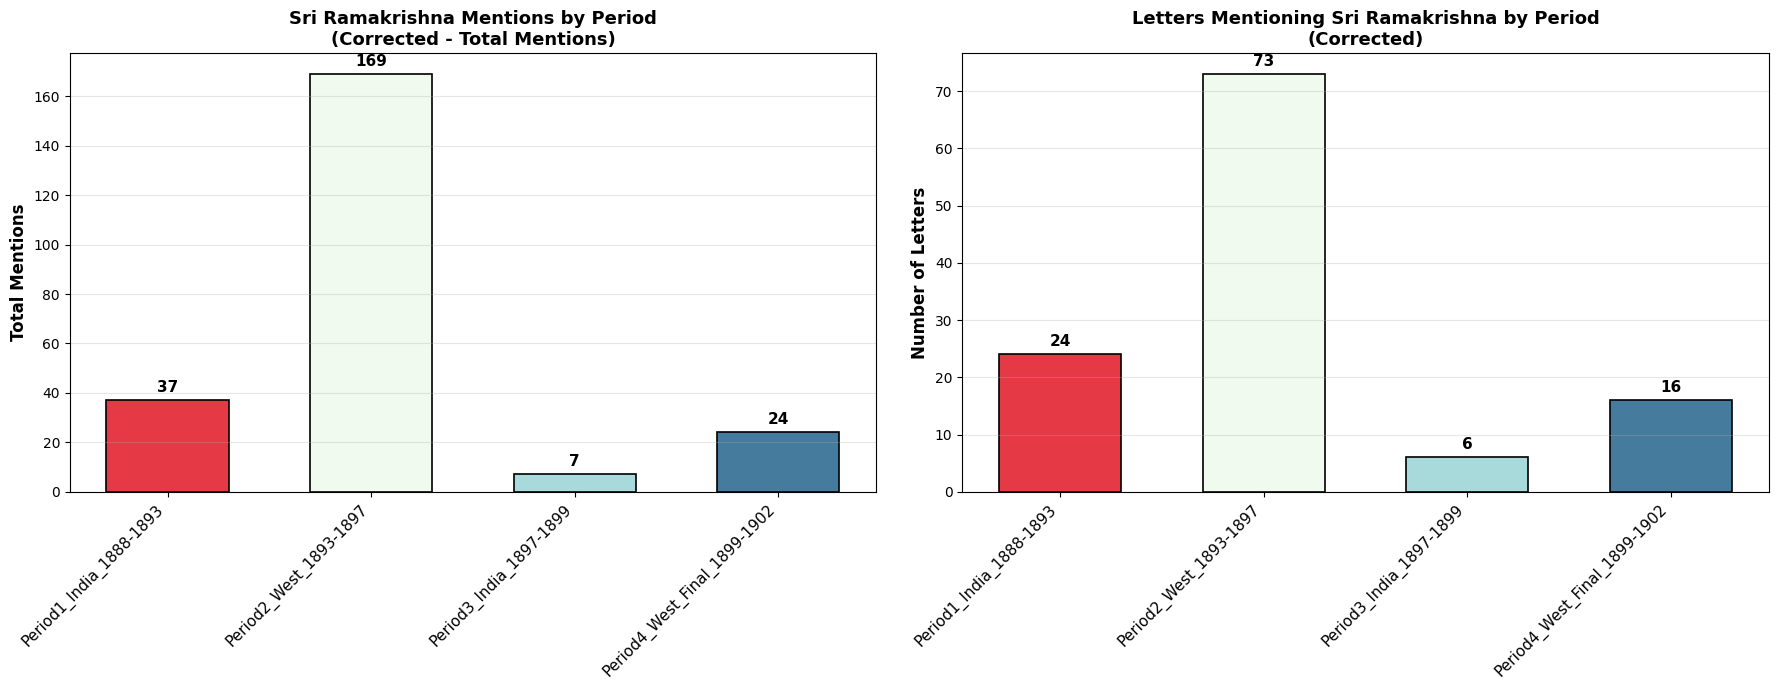

[VIZ 2/4] Ramakrishna mentions by year (corrected)...


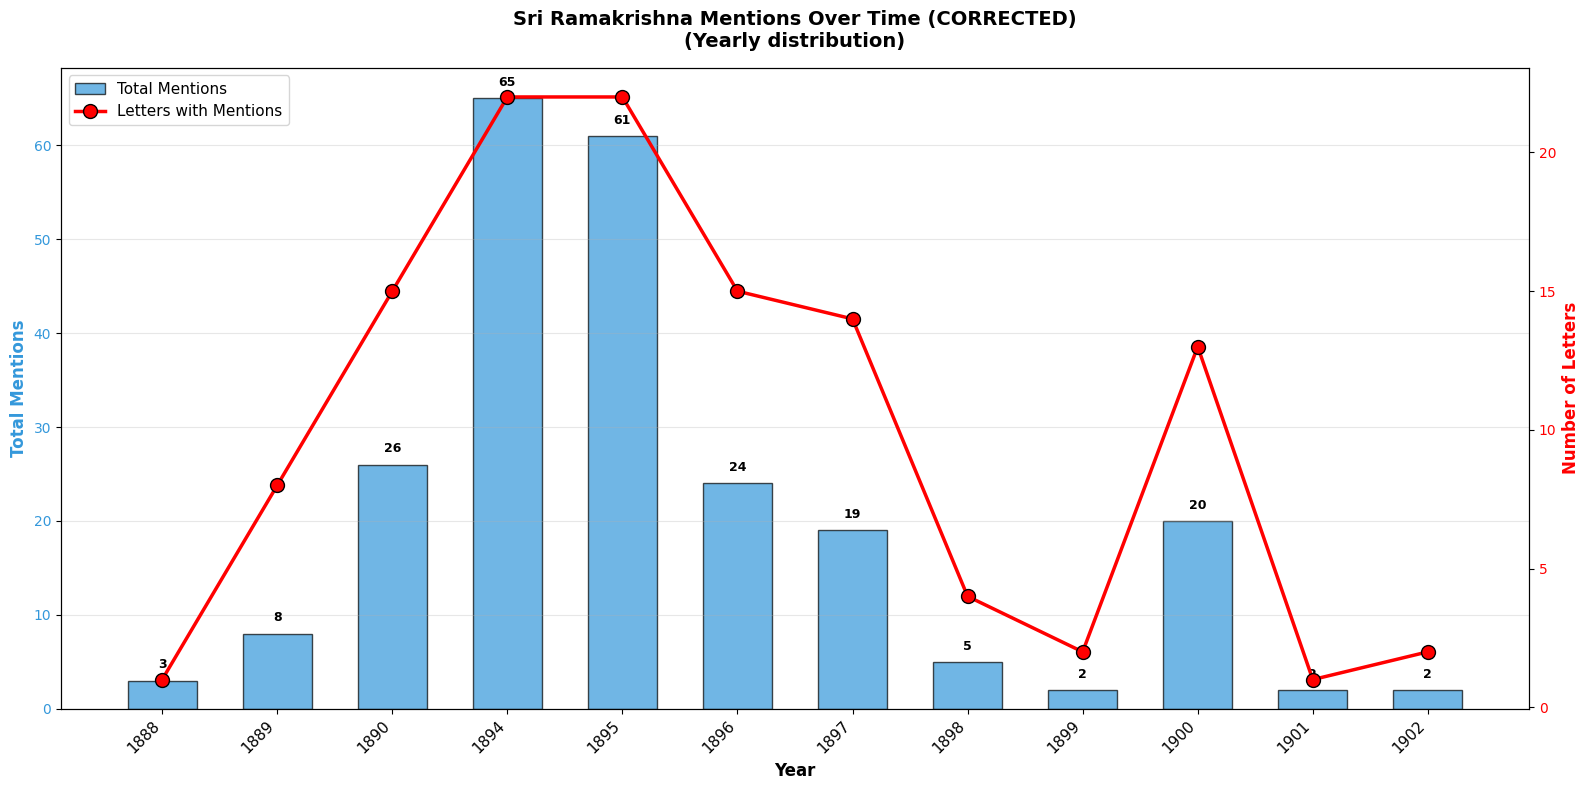

[VIZ 3/4] Cluster distribution by period (corrected)...
[VIZ 4/4] Corrected heatmap - recipients × periods...


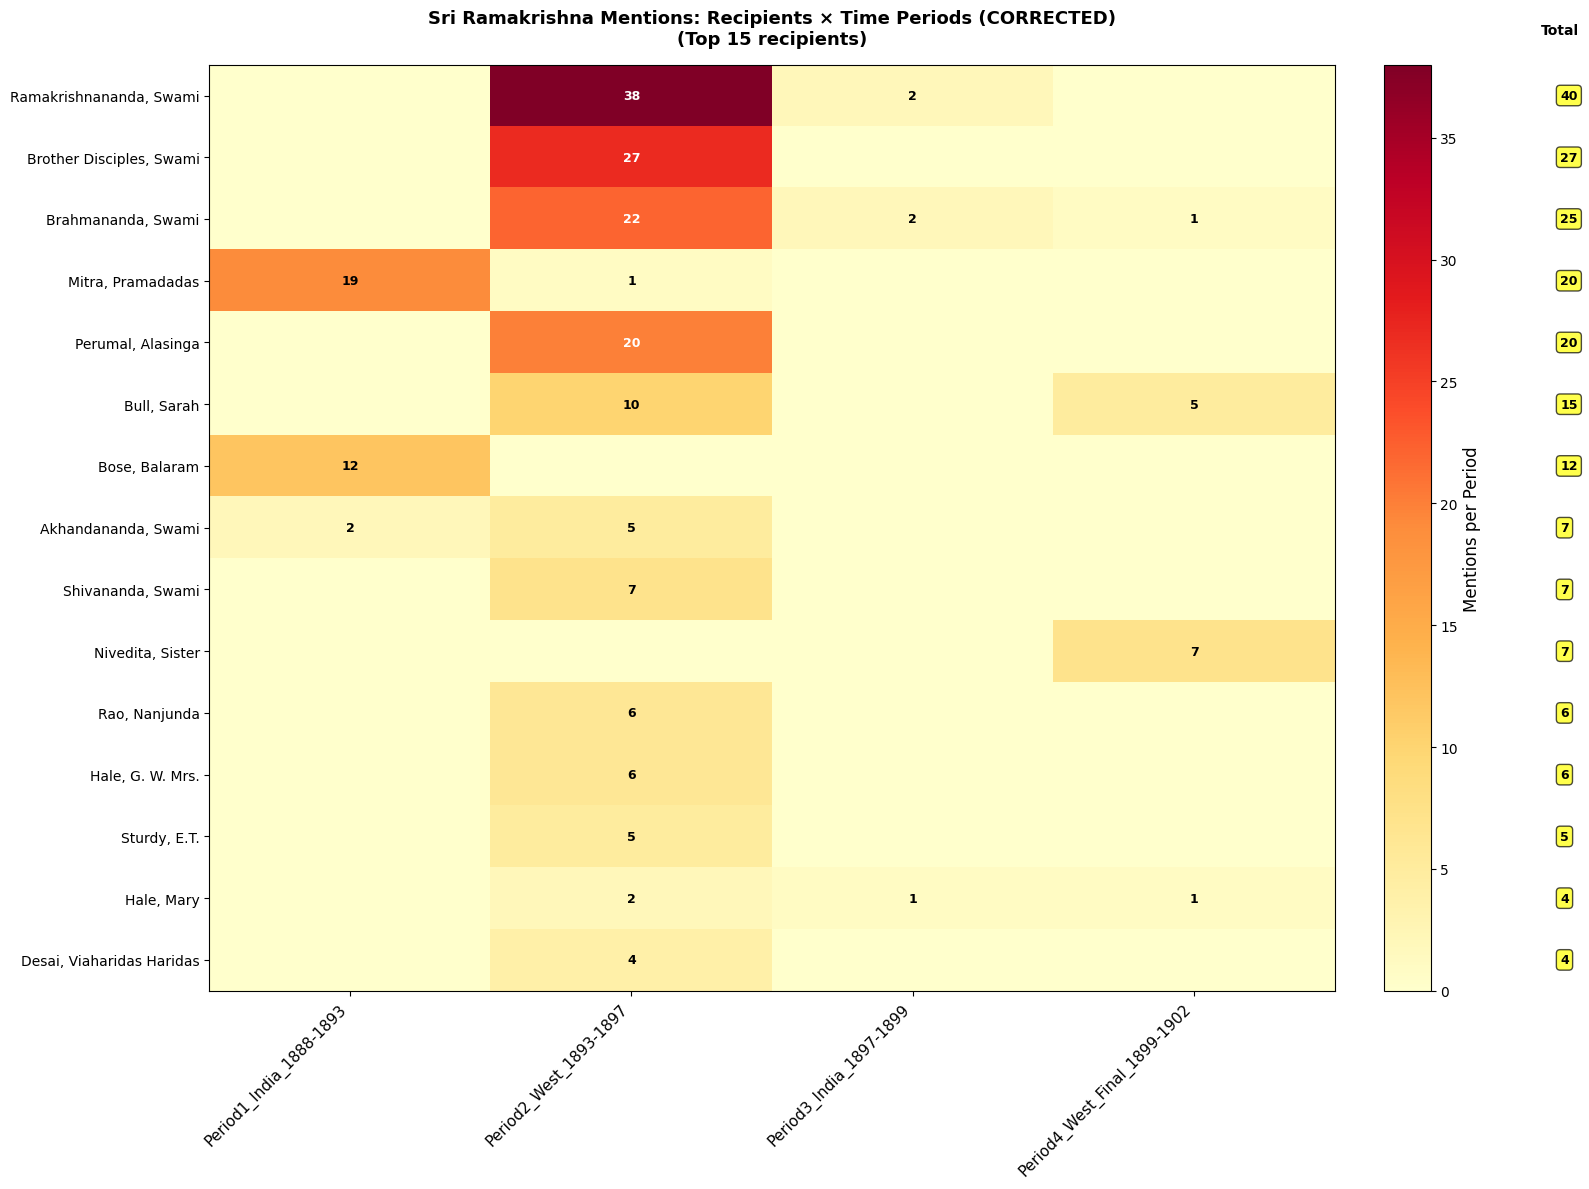


CORRECTED VISUALIZATIONS COMPLETE!
✓ All 'Unknown' periods resolved using year extraction
✓ Ramakrishna mention statistics updated
✓ Cluster temporal distributions updated
✓ Heatmap now shows correct totals


In [56]:
print("=" * 80)
print("FIXING PERIOD ASSIGNMENTS BY EXTRACTING YEAR")
print("=" * 80)

# ============================================================================
# FIX PERIOD ASSIGNMENT
# ============================================================================
print("\n[STEP 1] Extracting years and reassigning periods...")

def extract_year_and_assign_period(date_str):
    """Extract year from date string and assign period"""
    if pd.isna(date_str) or date_str == '' or str(date_str) == 'nan':
        return 'Unknown', None

    try:
        # Convert to string and extract year (first 4 characters)
        date_str = str(date_str)
        year_str = date_str.split('/')[0]  # Get part before first /
        year = int(year_str)

        # Assign period based on year
        if 1888 <= year <= 1893:
            return 'Period1_India_1888-1893', year
        elif 1894 <= year <= 1897:
            return 'Period2_West_1893-1897', year
        elif 1897 <= year <= 1899:
            # 1897 is ambiguous - could be Period2 or Period3
            # Let's assign 1897 to Period3 (India return)
            if year == 1897:
                return 'Period3_India_1897-1899', year
            return 'Period3_India_1897-1899', year
        elif 1899 <= year <= 1902:
            return 'Period4_West_Final_1899-1902', year
        else:
            return 'Unknown', year
    except:
        return 'Unknown', None

# Apply to all_letters
all_letters['period_new'], all_letters['year_extracted'] = zip(*all_letters['Date'].apply(extract_year_and_assign_period))

print(f"  ✓ Before fix:")
print(f"    Unknown period: {(all_letters['period'] == 'Unknown').sum()} letters")

print(f"\n  ✓ After fix:")
print(f"    Unknown period: {(all_letters['period_new'] == 'Unknown').sum()} letters")

print(f"\n  ✓ Period distribution (new):")
print(all_letters['period_new'].value_counts().sort_index())

# Update the period column
all_letters['period'] = all_letters['period_new']

print(f"\n[STEP 2] Re-running Ramakrishna mention analysis...")

# ============================================================================
# RE-RUN RAMAKRISHNA MENTION SEARCH (copying from previous code)
# ============================================================================

mention_results = []

for idx, row in all_letters.iterrows():
    if pd.isna(row['body_text']) or row['body_text'].strip() == '':
        continue

    text = row['body_text']

    # Count mentions by term
    spans = []
    matched_terms = set()
    term_counts = {}

    for term, pattern in patterns.items():
        for match in pattern.finditer(text):
            spans.append((match.start(), match.end(), term))
            matched_terms.add(term)
            term_counts[term] = term_counts.get(term, 0) + 1

    # Sort spans by start position
    spans.sort(key=lambda x: x[0])

    # Merge overlapping spans
    merged_spans = []
    for start, end, term in spans:
        if not merged_spans:
            merged_spans.append([start, end])
        else:
            last_start, last_end = merged_spans[-1]
            if start <= last_end:  # overlap
                merged_spans[-1][1] = max(last_end, end)
            else:
                merged_spans.append([start, end])

    total_mentions = len(merged_spans)

    if total_mentions > 0:
        mention_results.append({
            'Letter_Index': idx,
            'Recipient': row['Audience_clean'],
            'Date': row['Date'] if 'Date' in row else None,
            'Period': row['period'],
            'Language': row['Language'] if 'Language' in row else None,
            'Location': row.get('Location', 'Unknown'),
            'Year': row['year_extracted'],
            'Total_Mentions': total_mentions,
            'Matched_Terms': ', '.join(set(matched_terms)),
            'Term_Counts': term_counts,
        })

mentions_df = pd.DataFrame(mention_results)

print(f"  ✓ Letters with mentions: {len(mentions_df)}")
print(f"  ✓ Total mentions: {mentions_df['Total_Mentions'].sum()}")

# ============================================================================
# UPDATED STATISTICS
# ============================================================================
print("\n" + "=" * 80)
print("UPDATED STATISTICS (WITH FIXED PERIODS)")
print("=" * 80)

print(f"\n📅 BY TIME PERIOD (CORRECTED):")
period_mentions = mentions_df.groupby('Period').agg({
    'Total_Mentions': 'sum',
    'Letter_Index': 'count'
}).rename(columns={'Letter_Index': 'Num_Letters'})
period_mentions['Avg_Mentions_Per_Letter'] = (
    period_mentions['Total_Mentions'] / period_mentions['Num_Letters']
)

for period in sorted([p for p in period_mentions.index if p != 'Unknown']):
    row = period_mentions.loc[period]
    print(f"  • {period_labels.get(period, period)}: {int(row['Total_Mentions'])} mentions in {int(row['Num_Letters'])} letters (avg: {row['Avg_Mentions_Per_Letter']:.1f})")

if 'Unknown' in period_mentions.index:
    row = period_mentions.loc['Unknown']
    print(f"  • Unknown: {int(row['Total_Mentions'])} mentions in {int(row['Num_Letters'])} letters (avg: {row['Avg_Mentions_Per_Letter']:.1f})")

print(f"\n📆 BY YEAR (CORRECTED):")
if 'Year' in mentions_df.columns and mentions_df['Year'].notna().any():
    year_mentions = mentions_df[mentions_df['Year'].notna()].groupby('Year').agg({
        'Total_Mentions': 'sum',
        'Letter_Index': 'count'
    }).rename(columns={'Letter_Index': 'Num_Letters'})

    for year in sorted(year_mentions.index):
        row = year_mentions.loc[year]
        print(f"  • {int(year)}: {int(row['Total_Mentions'])} mentions in {int(row['Num_Letters'])} letters")

# ============================================================================
# VISUALIZATION 1: Ramakrishna Mentions by Period (CORRECTED)
# ============================================================================
print("\n" + "=" * 80)
print("CREATING CORRECTED VISUALIZATIONS")
print("=" * 80)

print("\n[VIZ 1/4] Ramakrishna mentions by period (corrected)...")

fig1, (ax1a, ax1b) = plt.subplots(1, 2, figsize=(18, 7))

periods_sorted = sorted([p for p in period_mentions.index if p != 'Unknown'])
colors_period = ['#E63946', '#F1FAEE', '#A8DADC', '#457B9D']

# Total mentions
values = [period_mentions.loc[p, 'Total_Mentions'] for p in periods_sorted]
ax1a.bar(range(len(periods_sorted)), values, color=colors_period,
        edgecolor='black', linewidth=1.2, width=0.6)
ax1a.set_xticks(range(len(periods_sorted)))
ax1a.set_xticklabels([period_labels.get(p, p) for p in periods_sorted],
                     rotation=45, ha='right', fontsize=11)
ax1a.set_ylabel('Total Mentions', fontsize=12, fontweight='bold')
ax1a.set_title('Sri Ramakrishna Mentions by Period\n(Corrected - Total Mentions)',
              fontsize=13, fontweight='bold')
ax1a.grid(alpha=0.3, axis='y')

for i, v in enumerate(values):
    ax1a.text(i, v + max(values)*0.02, str(int(v)),
             ha='center', fontsize=11, fontweight='bold')

# Letters with mentions
values_letters = [period_mentions.loc[p, 'Num_Letters'] for p in periods_sorted]
ax1b.bar(range(len(periods_sorted)), values_letters, color=colors_period,
        edgecolor='black', linewidth=1.2, width=0.6)
ax1b.set_xticks(range(len(periods_sorted)))
ax1b.set_xticklabels([period_labels.get(p, p) for p in periods_sorted],
                     rotation=45, ha='right', fontsize=11)
ax1b.set_ylabel('Number of Letters', fontsize=12, fontweight='bold')
ax1b.set_title('Letters Mentioning Sri Ramakrishna by Period\n(Corrected)',
              fontsize=13, fontweight='bold')
ax1b.grid(alpha=0.3, axis='y')

for i, v in enumerate(values_letters):
    ax1b.text(i, v + max(values_letters)*0.02, str(int(v)),
             ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

# ============================================================================
# VISUALIZATION 2: Ramakrishna Mentions by Year (CORRECTED)
# ============================================================================
print("[VIZ 2/4] Ramakrishna mentions by year (corrected)...")

if 'Year' in mentions_df.columns and mentions_df['Year'].notna().any():
    fig2, ax2 = plt.subplots(figsize=(16, 8))

    year_data = mentions_df[mentions_df['Year'].notna()].groupby('Year').agg({
        'Total_Mentions': 'sum',
        'Letter_Index': 'count'
    }).rename(columns={'Letter_Index': 'Num_Letters'})

    years = sorted(year_data.index)
    mentions_by_year = [year_data.loc[y, 'Total_Mentions'] for y in years]
    letters_by_year = [year_data.loc[y, 'Num_Letters'] for y in years]

    # Create twin axis
    ax2_twin = ax2.twinx()

    # Plot bars for mentions
    x_pos = np.arange(len(years))
    bars = ax2.bar(x_pos, mentions_by_year, color='#3498db', alpha=0.7,
                   edgecolor='black', linewidth=1, label='Total Mentions', width=0.6)

    # Plot line for letters
    line = ax2_twin.plot(x_pos, letters_by_year, 'ro-', linewidth=2.5,
                         markersize=10, label='Letters with Mentions',
                         markeredgecolor='black', markeredgewidth=1)

    ax2.set_xlabel('Year', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Total Mentions', fontsize=12, fontweight='bold', color='#3498db')
    ax2_twin.set_ylabel('Number of Letters', fontsize=12, fontweight='bold', color='red')

    ax2.set_xticks(x_pos)
    ax2.set_xticklabels([int(y) for y in years], rotation=45, ha='right', fontsize=11)

    ax2.set_title('Sri Ramakrishna Mentions Over Time (CORRECTED)\n(Yearly distribution)',
                 fontsize=14, fontweight='bold', pad=15)

    ax2.tick_params(axis='y', labelcolor='#3498db')
    ax2_twin.tick_params(axis='y', labelcolor='red')

    ax2.grid(alpha=0.3, axis='y')

    # Combined legend
    lines1, labels1 = ax2.get_legend_handles_labels()
    lines2, labels2 = ax2_twin.get_legend_handles_labels()
    ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=11)

    # Add values on bars
    for i, v in enumerate(mentions_by_year):
        ax2.text(i, v + max(mentions_by_year)*0.02, str(int(v)),
                ha='center', fontsize=9, fontweight='bold')

    plt.tight_layout()
    plt.show()

# ============================================================================
# VISUALIZATION 3: Cluster Distribution by Period (CORRECTED)
# ============================================================================
print("[VIZ 3/4] Cluster distribution by period (corrected)...")

# Update letters_clustered with new periods
if 'letters_clustered' in globals():
    # Merge new period info
    letters_clustered = letters_clustered.drop(columns=['period'], errors='ignore')
    letters_clustered = letters_clustered.join(all_letters[['period', 'year_extracted']], how='left')

    fig3, (ax3a, ax3b) = plt.subplots(1, 2, figsize=(18, 8))

    # Count by period and cluster
    periods_sorted = sorted([p for p in letters_clustered['period'].unique() if p != 'Unknown'])

    # Stacked bar - absolute counts
    cluster_period_counts = pd.crosstab(letters_clustered['KMeans_Cluster'],
                                        letters_clustered['period'])

    # Reorder columns to match our period order
    cluster_period_counts = cluster_period_counts[[p for p in periods_sorted if p in cluster_period_counts.columns]]

    cluster_period_counts.plot(kind='bar', stacked=True, ax=ax3a,
                              color=colors_period[:len(periods_sorted)],
                              edgecolor='black', linewidth=0.8, width=0.7)

    ax3a.set_xlabel('Cluster', fontsize=12, fontweight='bold')
    ax3a.set_ylabel('Number of Letters', fontsize=12, fontweight='bold')
    ax3a.set_title('Temporal Distribution of Semantic Clusters (CORRECTED)\n(Absolute counts)',
                  fontsize=13, fontweight='bold')
    ax3a.set_xticklabels([f'Cluster {i+1}' for i in range(optimal_k)], rotation=0, fontsize=11)
    ax3a.legend(title='Period', labels=[period_labels.get(p, p) for p in periods_sorted],
               fontsize=9, title_fontsize=10, loc='upper right')
    ax3a.grid(alpha=0.3, axis='y')

    # Percentage stacked bar
    cluster_period_pct = cluster_period_counts.div(cluster_period_counts.sum(axis=1), axis=0) * 100

    cluster_period_pct.plot(kind='bar', stacked=True, ax=ax3b,
                           color=colors_period[:len(periods_sorted)],
                           edgecolor='black', linewidth=0.8, width=0.7)

    ax3b.set_xlabel('Cluster', fontsize=12, fontweight='bold')
    ax3b.set_ylabel('Percentage (%)', fontsize=12, fontweight='bold')
    ax3b.set_title('Temporal Distribution of Semantic Clusters (CORRECTED)\n(Percentages)',
                  fontsize=13, fontweight='bold')
    ax3b.set_xticklabels([f'Cluster {i+1}' for i in range(optimal_k)], rotation=0, fontsize=11)
    ax3b.legend(title='Period', labels=[period_labels.get(p, p) for p in periods_sorted],
               fontsize=9, title_fontsize=10, loc='upper right')
    ax3b.set_ylim(0, 100)
    ax3b.grid(alpha=0.3, axis='y')

    plt.tight_layout()
    plt.show()

# ============================================================================
# VISUALIZATION 4: Corrected Heatmap - Recipients × Periods
# ============================================================================
print("[VIZ 4/4] Corrected heatmap - recipients × periods...")

# Recalculate recipient mentions with new periods
recipient_mentions_new = mentions_df.groupby('Recipient').agg({
    'Total_Mentions': 'sum',
    'Letter_Index': 'count'
}).rename(columns={'Letter_Index': 'Num_Letters'})
recipient_mentions_new = recipient_mentions_new.sort_values('Total_Mentions', ascending=False)

fig4, ax4 = plt.subplots(figsize=(16, 12))

# Create cross-tab
top_recipients = recipient_mentions_new.head(15).index
periods_sorted = sorted([p for p in mentions_df['Period'].unique() if p != 'Unknown'])

heatmap_data = np.zeros((len(top_recipients), len(periods_sorted)))

for i, recipient in enumerate(top_recipients):
    for j, period in enumerate(periods_sorted):
        mask = (mentions_df['Recipient'] == recipient) & (mentions_df['Period'] == period)
        heatmap_data[i, j] = mentions_df[mask]['Total_Mentions'].sum()

im = ax4.imshow(heatmap_data, cmap='YlOrRd', aspect='auto')

ax4.set_xticks(range(len(periods_sorted)))
ax4.set_yticks(range(len(top_recipients)))
ax4.set_xticklabels([period_labels.get(p, p) for p in periods_sorted],
                    rotation=45, ha='right', fontsize=11)
ax4.set_yticklabels([name[:30] for name in top_recipients], fontsize=10)

ax4.set_title('Sri Ramakrishna Mentions: Recipients × Time Periods (CORRECTED)\n(Top 15 recipients)',
             fontsize=13, fontweight='bold', pad=15)

# Add values and row totals
for i in range(len(top_recipients)):
    row_total = 0
    for j in range(len(periods_sorted)):
        value = int(heatmap_data[i, j])
        row_total += value
        if value > 0:
            text_color = 'white' if value > heatmap_data.max() * 0.5 else 'black'
            ax4.text(j, i, str(value), ha="center", va="center",
                    color=text_color, fontsize=9, fontweight='bold')

    # Add row total
    ax4.text(len(periods_sorted) + 0.3, i, f'{row_total}',
            va='center', fontsize=9, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))

# Add "Total" label
ax4.text(len(periods_sorted) + 0.3, -1, 'Total', ha='center',
        fontsize=10, fontweight='bold')

cbar = plt.colorbar(im, ax=ax4, label='Mentions per Period', fraction=0.046, pad=0.04)
cbar.ax.tick_params(labelsize=10)

plt.tight_layout()
plt.show()

print("\n" + "=" * 80)
print("CORRECTED VISUALIZATIONS COMPLETE!")
print("=" * 80)
print(f"✓ All 'Unknown' periods resolved using year extraction")
print(f"✓ Ramakrishna mention statistics updated")
print(f"✓ Cluster temporal distributions updated")
print(f"✓ Heatmap now shows correct totals")

In [52]:
# ============================================================================
# FIX top_letters COLUMN COLLISIONS (ONE-TIME CLEANUP)
# ============================================================================

print("\n" + "=" * 80)
print("CLEANING COLUMN COLLISIONS IN top_letters")
print("=" * 80)

# ---------------------------------------------------------------------------
# 1. Resolve Year
# Prefer Year_y (from all_letters), fallback to Year_x
# ---------------------------------------------------------------------------
top_letters['Year'] = top_letters['Year_y'].combine_first(top_letters['Year_x'])

# ---------------------------------------------------------------------------
# 2. Resolve Recipient
# Keep first Recipient column
# ---------------------------------------------------------------------------
if 'Recipient' in top_letters.columns:
    # If duplicated, pandas keeps same name twice — drop by position
    recipient_cols = [i for i, c in enumerate(top_letters.columns) if c == 'Recipient']
    if len(recipient_cols) > 1:
        top_letters = top_letters.iloc[:, [i for i in range(len(top_letters.columns)) if i != recipient_cols[1]]]

# ---------------------------------------------------------------------------
# 3. Resolve Period
# ---------------------------------------------------------------------------
top_letters['Period'] = top_letters['Period'].iloc[:, 0] if isinstance(top_letters['Period'], pd.DataFrame) else top_letters['Period']

# ---------------------------------------------------------------------------
# 4. Normalize URL column
# ---------------------------------------------------------------------------
if 'url' not in top_letters.columns and 'full_url' in top_letters.columns:
    top_letters = top_letters.rename(columns={'full_url': 'url'})

# ---------------------------------------------------------------------------
# 5. Drop junk columns
# ---------------------------------------------------------------------------
cols_to_drop = [
    'Year_x', 'Year_y',
    'Term_Counts'
]

top_letters = top_letters.drop(columns=[c for c in cols_to_drop if c in top_letters.columns])

# ---------------------------------------------------------------------------
# 6. Reorder columns cleanly
# ---------------------------------------------------------------------------
ordered_cols = [
    'Letter_Index',
    'Name',
    'Recipient',
    'Year',
    'Date',
    'Place',
    'Period',
    'Total_Mentions',
    'Mentioned_Variations',
    'url'
]

top_letters = top_letters[[c for c in ordered_cols if c in top_letters.columns]]

print("✓ Columns cleaned successfully\n")
print(top_letters.info())



CLEANING COLUMN COLLISIONS IN top_letters


KeyError: 'Year_y'

In [46]:
# ============================================================================
# CANONICALIZE URL COLUMN (ONE-TIME FIX)
# ============================================================================

print("\n" + "=" * 80)
print("NORMALIZING URL COLUMN")
print("=" * 80)

# Detect URL column
if 'url' in all_letters.columns:
    url_col = 'url'
elif 'full_url' in all_letters.columns:
    all_letters = all_letters.rename(columns={'full_url': 'url'})
    url_col = 'url'
    print("✓ Renamed 'full_url' → 'url'")
else:
    raise ValueError("No URL column found (expected 'url' or 'full_url')")

print(f"✓ Using URL column: {url_col}")
print("=" * 80)



NORMALIZING URL COLUMN
✓ Renamed 'full_url' → 'url'
✓ Using URL column: url


In [48]:
# ============================================================================
# HARD RESET: CANONICALIZE YEAR + CORE METADATA IN top_letters
# ============================================================================

print("\n" + "=" * 80)
print("CANONICALIZING top_letters SCHEMA (FINAL FIX)")
print("=" * 80)

# -----------------------------
# 1. Fix Year ONCE AND FOR ALL
# -----------------------------
year_cols = [c for c in top_letters.columns if c.lower().startswith('year')]

if not year_cols:
    raise ValueError("No Year columns found at all")

# Prefer Year_y (from all_letters), else fallback to Year_x
if 'Year_y' in top_letters.columns:
    top_letters['Year'] = top_letters['Year_y']
elif 'Year_x' in top_letters.columns:
    top_letters['Year'] = top_letters['Year_x']
else:
    # last resort: take first year-like column
    top_letters['Year'] = top_letters[year_cols[0]]

print(f"✓ Canonical Year column created from: {year_cols}")

# -----------------------------
# 2. Fix URL column
# -----------------------------
if 'url' not in top_letters.columns:
    if 'full_url' in top_letters.columns:
        top_letters = top_letters.rename(columns={'full_url': 'url'})
        print("✓ Renamed full_url → url")
    else:
        raise ValueError("No URL column found")

# -----------------------------
# 3. Drop ALL broken duplicates
# -----------------------------
drop_cols = [
    'Year_x', 'Year_y',
    'Term_Counts'
]

top_letters = top_letters.drop(columns=[c for c in drop_cols if c in top_letters.columns])

# -----------------------------
# 4. Deduplicate columns safely
# -----------------------------
top_letters = top_letters.loc[:, ~top_letters.columns.duplicated()]

# -----------------------------
# 5. Final schema check
# -----------------------------
required = [
    'Letter_Index',
    'Name',
    'Recipient',
    'Year',
    'Place',
    'Period',
    'Total_Mentions',
    'Mentioned_Variations',
    'url'
]

missing = [c for c in required if c not in top_letters.columns]
if missing:
    raise ValueError(f"Still missing required columns: {missing}")

print("✓ Schema stabilized")
print("\nFINAL COLUMNS:")
print(list(top_letters.columns))



CANONICALIZING top_letters SCHEMA (FINAL FIX)
✓ Canonical Year column created from: ['Year_x', 'Year_y']
✓ Schema stabilized

FINAL COLUMNS:
['Letter_Index', 'Recipient', 'Date', 'Period', 'Language', 'Location', 'Total_Mentions', 'Mentioned_Variations', 'Name', 'Place', 'url', 'Year']



TOP 10 INDIVIDUAL LETTERS BY RAMAKRISHNA MENTIONS

📄 TABLE: Top 10 Letters (Year-based)

+----------------+-------------------------+--------------------------+-------------+--------+-----------------------------+----------+-------------------------+------------------+--------------------------------------------------------+
|   Letter_Index | Name                    | Recipient                | Recipient   |   Year | Place                       | Period   | Period                  |   Total_Mentions | Mentioned_Variations                                   |
+================+=========================+==========================+=============+========+=============================+==========+=========================+==================+========================================================+
|            197 | LXXV Shashi             | Ramakrishnananda, Swami  | Ramakr      |   1895 | USA                         | Period2_ | Period2_West_1893-1897  |               23 | ramakrishna par

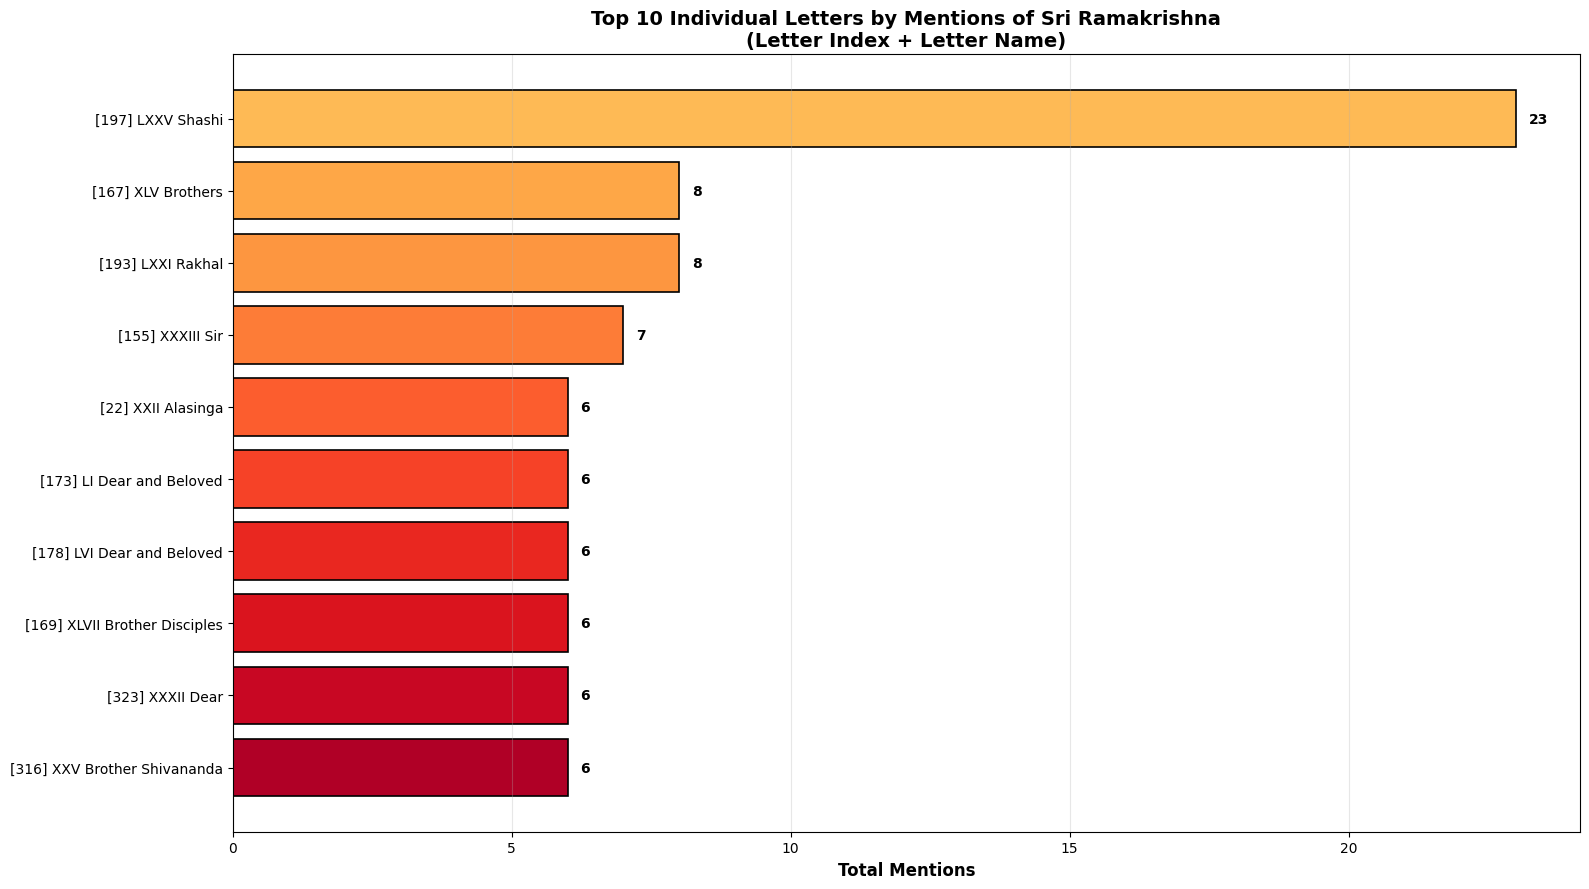


🔗 LINKS TO THE SAME TOP 10 LETTERS:

[197] LXXV Shashi (1895)
     https://www.ramakrishnavivekananda.info/vivekananda/volume_6/epistles_second_series/075_shashi.htm

[167] XLV Brothers (1894)
     https://www.ramakrishnavivekananda.info/vivekananda/volume_6/epistles_second_series/045_brothers.htm

[193] LXXI Rakhal (1895)
     https://www.ramakrishnavivekananda.info/vivekananda/volume_6/epistles_second_series/071_rakhal.htm

[155] XXXIII Sir (1890)
     https://www.ramakrishnavivekananda.info/vivekananda/volume_6/epistles_second_series/033_sir.htm

[22] XXII Alasinga (1894)
     https://www.ramakrishnavivekananda.info/vivekananda/volume_5/epistles_first_series/022_alasinga.htm

[173] LI Dear and Beloved (1894)
     https://www.ramakrishnavivekananda.info/vivekananda/volume_6/epistles_second_series/051_dear_and_beloved.htm

[178] LVI Dear and Beloved (1894)
     https://www.ramakrishnavivekananda.info/vivekananda/volume_6/epistles_second_series/056_dear_and_beloved.htm

[169] XLVII Br

In [53]:
# ============================================================================
# TOP 10 INDIVIDUAL LETTERS WITH MOST RAMAKRISHNA MENTIONS
# (TRULY FIXED – YEAR COMES FROM mentions_df)
# ============================================================================

from tabulate import tabulate
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print("\n" + "=" * 90)
print("TOP 10 INDIVIDUAL LETTERS BY RAMAKRISHNA MENTIONS")
print("=" * 90)

# ---------------------------------------------------------------------------
# 1. Sanity check: required columns that ACTUALLY exist
# ---------------------------------------------------------------------------
required_all_letters = ['Name', 'Audience_clean', 'Place', 'period', 'url']
missing = [c for c in required_all_letters if c not in all_letters.columns]

if missing:
    raise ValueError(f"Missing required columns in all_letters: {missing}")

required_mentions = ['Letter_Index', 'Total_Mentions', 'Year', 'Matched_Terms']
missing_m = [c for c in required_mentions if c not in mentions_df.columns]

if missing_m:
    raise ValueError(f"Missing required columns in mentions_df: {missing_m}")

# ---------------------------------------------------------------------------
# 2. Merge (Year stays from mentions_df)
# ---------------------------------------------------------------------------
top_letters = (
    mentions_df
    .merge(
        all_letters[required_all_letters],
        left_on='Letter_Index',
        right_index=True,
        how='left'
    )
    .sort_values('Total_Mentions', ascending=False)
    .head(10)
)

# Rename cleanly
top_letters = top_letters.rename(columns={
    'Audience_clean': 'Recipient',
    'period': 'Period',
    'Matched_Terms': 'Mentioned_Variations'
})

# ---------------------------------------------------------------------------
# 3. Display table (clean, bordered)
# ---------------------------------------------------------------------------
display_cols = [
    'Letter_Index',
    'Name',
    'Recipient',
    'Year',
    'Place',
    'Period',
    'Total_Mentions',
    'Mentioned_Variations'
]

print("\n📄 TABLE: Top 10 Letters (Year-based)\n")

print(tabulate(
    top_letters[display_cols],
    headers='keys',
    tablefmt='grid',
    showindex=False,
    maxcolwidths=[8, 32, 30, 6, 18, 28, 8, 45]
))

# ---------------------------------------------------------------------------
# 4. Visualization — LETTER-CENTRIC
# ---------------------------------------------------------------------------
print("\n📊 VISUALIZATION: Mentions per Individual Letter")

fig, ax = plt.subplots(figsize=(16, 9))

y_pos = np.arange(len(top_letters))
mentions = top_letters['Total_Mentions']

labels = [
    f"[{idx}] {name[:55]}"
    for idx, name in zip(top_letters['Letter_Index'], top_letters['Name'])
]

colors = plt.cm.YlOrRd(np.linspace(0.35, 0.9, len(mentions)))

ax.barh(y_pos, mentions, color=colors, edgecolor='black', linewidth=1.2)
ax.set_yticks(y_pos)
ax.set_yticklabels(labels, fontsize=10)
ax.invert_yaxis()

ax.set_xlabel('Total Mentions', fontsize=12, fontweight='bold')
ax.set_title(
    'Top 10 Individual Letters by Mentions of Sri Ramakrishna\n'
    '(Letter Index + Letter Name)',
    fontsize=14,
    fontweight='bold'
)

for i, v in enumerate(mentions):
    ax.text(v + max(mentions)*0.01, i, str(int(v)),
            va='center', fontsize=10, fontweight='bold')

ax.grid(alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

# ---------------------------------------------------------------------------
# 5. URLs printed cleanly
# ---------------------------------------------------------------------------
print("\n🔗 LINKS TO THE SAME TOP 10 LETTERS:\n")

for _, row in top_letters.iterrows():
    print(f"[{row['Letter_Index']}] {row['Name']} ({int(row['Year'])})")
    print(f"     {row['url']}\n")

print("=" * 90)
print("✓ LETTER-LEVEL ANALYSIS COMPLETE (SCHEMA-CORRECT)")
print("=" * 90)
